### **ILPD (Indian Liver Patient Dataset) Data Set**

Copyright (c) 2023 Mansi Upadhyay

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

**ABOUT THE DATASET**

This is a medical dataset containing information about liver patients in India. It consists of 583 instances, with 10 attributes including age, gender, total bilirubin, direct bilirubin, alkaline phosphatase, alanine aminotransferase, aspartate aminotransferase, total proteins, albumin, and albumin-globulin ratio. The goal of this dataset is to predict whether a patient has liver disease or not based on the given attributes.

**Aim**:

In this assignment we aim to create a complete ML project with

Checking Data Quality



*   Checking Data Quality
*   Feature Selection
*   Modeling - Training Models, Selecting Best Model, Hyperparameter Tuning
*   Model Interpretibility
*   Reports and Visualizations




**Variable Description**

The data in the Indian Liver Patient Dataset (ILPD) contains both numeric and categorical variables.

The numeric variables are:

Age (numeric) Total bilirubin (numeric) Direct bilirubin (numeric) Alkaline phosphotase (numeric) Alamine aminotransferase (numeric) Aspartate aminotransferase (numeric) Total proteins (numeric) Albumin (numeric) Albumin and Globulin Ratio (numeric) The categorical variable is:

Gender (categorical)

## **Questions**

**What is the question?** 

My ML task is to predict if a patient has liver disease or not based on given features.

The dataset contains features such as age, total bilirubin, direct bilirubin, alkaline phosphotase, alamine aminotransferase, aspartate aminotransferase, total proteins, albumin, albumin and globulin ratio, and gender.

I will approach this problem as a binary classification task, where the output variable can be either 1 (indicating the presence of liver disease) or 0 (indicating the absence of liver disease).

My model will use the available features to predict the presence or absence of liver disease in a patient.

The categorical variable in the dataset is gender, which may need to be encoded for use in the model.

I will evaluate the performance of my model using appropriate metrics such as accuracy, precision, recall, and F1-score.
Once I have built the model, I will interpret its results to understand the factors that contribute to the presence or absence of liver disease in a patient.

Finally, I will present my findings and results through reports and visualizations.

### **Data Cleaning and Feature Selection**

In [1]:
##Installing all the required libraries for the Assignment
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install fitter

import csv
import json
import logging
import optparse
import os
import random
import sys
import time
from datetime import datetime
from distutils.util import strtobool

# Importing all the libararies required for the assignment
import h2o
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psutil
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
from matplotlib.pyplot import figure

sns.set(rc={"figure.figsize": (16, 8)})

# Data Imputation
!pip install fancyimpute
from fancyimpute import IterativeImputer as MICE

# Model Interpretation
!pip install shap
import shap
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.3-py2.py3-none-any.whl size=177694727 sha256=3f81bc9e433505b4b014bd4d9112d05b8b146f4ca7530f9dd35844115c0fd2ad
  Stored in directory: /root/.cache/pip/wheels/9a/54/b6/c9ab3e71309ef0000bbe39e715020dc151bbfc557784b7f4c9
Successfully built h2o
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

In [ ]:
#importing libraries
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

**What question are you trying to answer? How did you frame it as an ML task?**
Sure, here's how I would write it as a first person in bullet points:

- My ML task is to predict if a patient has liver disease or not based on given features.
- The dataset contains features such as age, total bilirubin, direct bilirubin, alkaline phosphotase, alamine aminotransferase, aspartate aminotransferase, total proteins, albumin, albumin and globulin ratio, and gender.
- I will approach this problem as a binary classification task, where the output variable can be either 1 (indicating the presence of liver disease) or 0 (indicating the absence of liver disease).
- My model will use the available features to predict the presence or absence of liver disease in a patient.
- The categorical variable in the dataset is gender, which may need to be encoded for use in the model.
- I will evaluate the performance of my model using appropriate metrics such as accuracy, precision, recall, and F1-score.
- Once I have built the model, I will interpret its results to understand the factors that contribute to the presence or absence of liver disease in a patient.
- Finally, I will present my findings and results through reports and visualizations.

**What is human-level performance on that task? What level of performance is needed?**

For the given dataset on predicting liver disease, human-level performance would depend on the domain knowledge and experience of medical professionals in diagnosing liver disease. In general, a human expert such as a doctor or medical practitioner can diagnose liver disease through physical examinations and medical tests such as blood work and imaging tests.
In terms of ML performance, the goal would be to achieve accuracy levels comparable to or better than human expert diagnosis. However, it's important to note that ML models can complement but not replace human expertise and judgment.
The level of performance needed for this ML task would depend on the specific use case and the potential consequences of false positives and false negatives. For example, if the model is being used to screen patients for liver disease, it would be important to minimize false negatives to ensure that patients with the disease are not missed. On the other hand, if the model is being used as a preliminary screening tool, it may be acceptable to have a higher false positive rate, as patients can be further evaluated through more thorough medical tests.



In [348]:
# Reading CSV file into Pandas DataFrame
df = pd.read_csv(
    "https://raw.githubusercontent.com/mansi0802/Indian-Liver-Patient-Dataset/main/Indian%20Liver%20Patient%20Dataset%202.csv")
df

65 Female   0.7  0.1  187  16   18  6.8  3.3   0.9  1
0    62   Male  10.9  5.5  699  64  100  7.5  3.2  0.74  1
1    62   Male   7.3  4.1  490  60   68  7.0  3.3  0.89  1
2    58   Male   1.0  0.4  182  14   20  6.8  3.4  1.00  1
3    72   Male   3.9  2.0  195  27   59  7.3  2.4  0.40  1
4    46   Male   1.8  0.7  208  19   14  7.6  4.4  1.30  1
..   ..    ...   ...  ...  ...  ..  ...  ...  ...   ... ..
577  60   Male   0.5  0.1  500  20   34  5.9  1.6  0.37  2
578  40   Male   0.6  0.1   98  35   31  6.0  3.2  1.10  1
579  52   Male   0.8  0.2  245  48   49  6.4  3.2  1.00  1
580  31   Male   1.3  0.5  184  29   32  6.8  3.4  1.00  1
581  38   Male   1.0  0.3  216  21   24  7.3  4.4  1.50  2

[582 rows x 11 columns]

In [349]:
# assigning names to the columns
names=['Age','Gender','TB','DB','Alkphos_Alkaline_Phosphate', 'SGPT','SGOT','Total_Protein','ALB','AG','Selector']
df.columns= names
df

Age Gender    TB   DB  Alkphos_Alkaline_Phosphate  SGPT  SGOT  \
0     62   Male  10.9  5.5                         699    64   100   
1     62   Male   7.3  4.1                         490    60    68   
2     58   Male   1.0  0.4                         182    14    20   
3     72   Male   3.9  2.0                         195    27    59   
4     46   Male   1.8  0.7                         208    19    14   
..   ...    ...   ...  ...                         ...   ...   ...   
577   60   Male   0.5  0.1                         500    20    34   
578   40   Male   0.6  0.1                          98    35    31   
579   52   Male   0.8  0.2                         245    48    49   
580   31   Male   1.3  0.5                         184    29    32   
581   38   Male   1.0  0.3                         216    21    24   

     Total_Protein  ALB    AG  Selector  
0              7.5  3.2  0.74         1  
1              7.0  3.3  0.89         1  
2              6.8  3.4  1.00         1  
3              7.3  2.4  0.40         1  
4              7.6  4.4  1.30         1  
..             ...  ...   ...       ...  
577            5.9  1.6  0.37         2  
578            6.0  3.2  1.10         1  
579            6.4  3.2  1.00         1  
580            6.8  3.4  1.00         1  
581            7.3  4.4  1.50         2  

[582 rows x 11 columns]

Exploratory Data Analysis

In [350]:
# Checking Data Type of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         582 non-null    int64  
 1   Gender                      582 non-null    object 
 2   TB                          582 non-null    float64
 3   DB                          582 non-null    float64
 4   Alkphos_Alkaline_Phosphate  582 non-null    int64  
 5   SGPT                        582 non-null    int64  
 6   SGOT                        582 non-null    int64  
 7   Total_Protein               582 non-null    float64
 8   ALB                         582 non-null    float64
 9   AG                          582 non-null    float64
 10  Selector                    582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


In [351]:
# Checking for any null values in the dataset, as we hav no null values - we are good to go.
df.isnull().sum()

Age                           0
Gender                        0
TB                            0
DB                            0
Alkphos_Alkaline_Phosphate    0
SGPT                          0
SGOT                          0
Total_Protein                 0
ALB                           0
AG                            0
Selector                      0
dtype: int64

In [352]:
columns = list(df.columns)
print(columns)  # Name of all predictors and result

['Age', 'Gender', 'TB', 'DB', 'Alkphos_Alkaline_Phosphate', 'SGPT', 'SGOT', 'Total_Protein', 'ALB', 'AG', 'Selector']


**Converting Categorical column Gender into 1 and 0, 1 being Male and 0 being Female**

In [353]:
dummy = pd.get_dummies(df['Gender'])

In [354]:
dummy.head()

Female  Male
0       0     1
1       0     1
2       0     1
3       0     1
4       0     1

In [355]:
df1 = pd.concat((df,dummy),axis = 1)

In [356]:
df1

Age Gender    TB   DB  Alkphos_Alkaline_Phosphate  SGPT  SGOT  \
0     62   Male  10.9  5.5                         699    64   100   
1     62   Male   7.3  4.1                         490    60    68   
2     58   Male   1.0  0.4                         182    14    20   
3     72   Male   3.9  2.0                         195    27    59   
4     46   Male   1.8  0.7                         208    19    14   
..   ...    ...   ...  ...                         ...   ...   ...   
577   60   Male   0.5  0.1                         500    20    34   
578   40   Male   0.6  0.1                          98    35    31   
579   52   Male   0.8  0.2                         245    48    49   
580   31   Male   1.3  0.5                         184    29    32   
581   38   Male   1.0  0.3                         216    21    24   

     Total_Protein  ALB    AG  Selector  Female  Male  
0              7.5  3.2  0.74         1       0     1  
1              7.0  3.3  0.89         1       0     1  
2              6.8  3.4  1.00         1       0     1  
3              7.3  2.4  0.40         1       0     1  
4              7.6  4.4  1.30         1       0     1  
..             ...  ...   ...       ...     ...   ...  
577            5.9  1.6  0.37         2       0     1  
578            6.0  3.2  1.10         1       0     1  
579            6.4  3.2  1.00         1       0     1  
580            6.8  3.4  1.00         1       0     1  
581            7.3  4.4  1.50         2       0     1  

[582 rows x 13 columns]

In [357]:
df1 = df1.drop(['Gender'], axis = 1)

In [358]:
df1 = df1.drop(['Female'], axis = 1)

In [359]:
df1 = df1.rename(columns = {'Male':'Gender'})

In [360]:
df1

Age    TB   DB  Alkphos_Alkaline_Phosphate  SGPT  SGOT  Total_Protein  \
0     62  10.9  5.5                         699    64   100            7.5   
1     62   7.3  4.1                         490    60    68            7.0   
2     58   1.0  0.4                         182    14    20            6.8   
3     72   3.9  2.0                         195    27    59            7.3   
4     46   1.8  0.7                         208    19    14            7.6   
..   ...   ...  ...                         ...   ...   ...            ...   
577   60   0.5  0.1                         500    20    34            5.9   
578   40   0.6  0.1                          98    35    31            6.0   
579   52   0.8  0.2                         245    48    49            6.4   
580   31   1.3  0.5                         184    29    32            6.8   
581   38   1.0  0.3                         216    21    24            7.3   

     ALB    AG  Selector  Gender  
0    3.2  0.74         1       1  
1    3.3  0.89         1       1  
2    3.4  1.00         1       1  
3    2.4  0.40         1       1  
4    4.4  1.30         1       1  
..   ...   ...       ...     ...  
577  1.6  0.37         2       1  
578  3.2  1.10         1       1  
579  3.2  1.00         1       1  
580  3.4  1.00         1       1  
581  4.4  1.50         2       1  

[582 rows x 11 columns]

In [361]:
columns = ['Age','Gender','TB','DB','Alkphos_Alkaline_Phosphate', 'SGPT','SGOT','Total_Protein','ALB','AG','Selector']

In [362]:
df1 = df1.reindex(columns = columns)

In [363]:
df1

Age  Gender    TB   DB  Alkphos_Alkaline_Phosphate  SGPT  SGOT  \
0     62       1  10.9  5.5                         699    64   100   
1     62       1   7.3  4.1                         490    60    68   
2     58       1   1.0  0.4                         182    14    20   
3     72       1   3.9  2.0                         195    27    59   
4     46       1   1.8  0.7                         208    19    14   
..   ...     ...   ...  ...                         ...   ...   ...   
577   60       1   0.5  0.1                         500    20    34   
578   40       1   0.6  0.1                          98    35    31   
579   52       1   0.8  0.2                         245    48    49   
580   31       1   1.3  0.5                         184    29    32   
581   38       1   1.0  0.3                         216    21    24   

     Total_Protein  ALB    AG  Selector  
0              7.5  3.2  0.74         1  
1              7.0  3.3  0.89         1  
2              6.8  3.4  1.00         1  
3              7.3  2.4  0.40         1  
4              7.6  4.4  1.30         1  
..             ...  ...   ...       ...  
577            5.9  1.6  0.37         2  
578            6.0  3.2  1.10         1  
579            6.4  3.2  1.00         1  
580            6.8  3.4  1.00         1  
581            7.3  4.4  1.50         2  

[582 rows x 11 columns]

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  7.78it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma            0.012968   983.622138 -6215.138976     inf      0.054644   
norm             0.012968   982.152359 -6221.480147     inf      0.054631   
lognorm          0.012973   983.727911 -6214.897296     inf      0.055717   
rayleigh         0.014244   940.332251 -6166.864310     inf      0.126600   
cauchy           0.014808  1008.378638 -6144.286225     inf      0.100643   

             ks_pvalue  
gamma     5.960814e-02  
norm      5.970830e-02  
lognorm   5.188563e-02  
rayleigh  1.367561e-08  
cauchy    1.385968e-05  


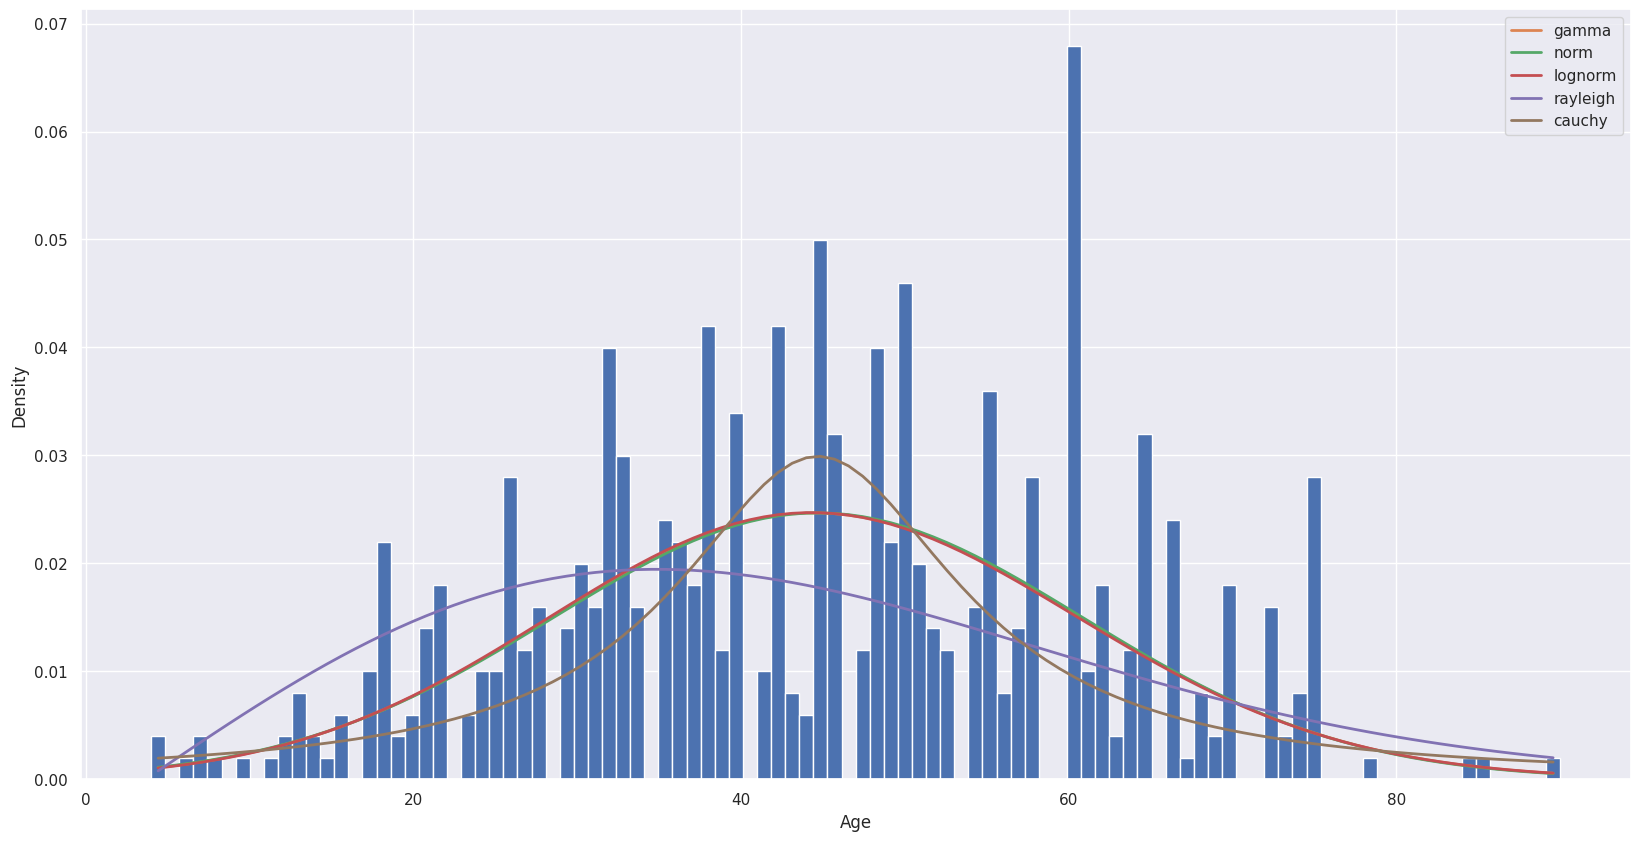

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  6.83it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
exponpow      6106.412357  168.270451  1387.162729     inf      0.526344   
chi2          6181.003414  101.783086  1394.228906     inf      0.513029   
uniform       6228.515251    4.000000  1392.319018     inf      0.757732   
norm          6249.304704   99.849136  1394.258375     inf      0.471846   
lognorm       6249.423789  101.779176  1400.635936     inf      0.472066   

              ks_pvalue  
exponpow  8.610127e-151  
chi2      1.038638e-142  
uniform    0.000000e+00  
norm      1.996168e-119  
lognorm   1.523285e-119  


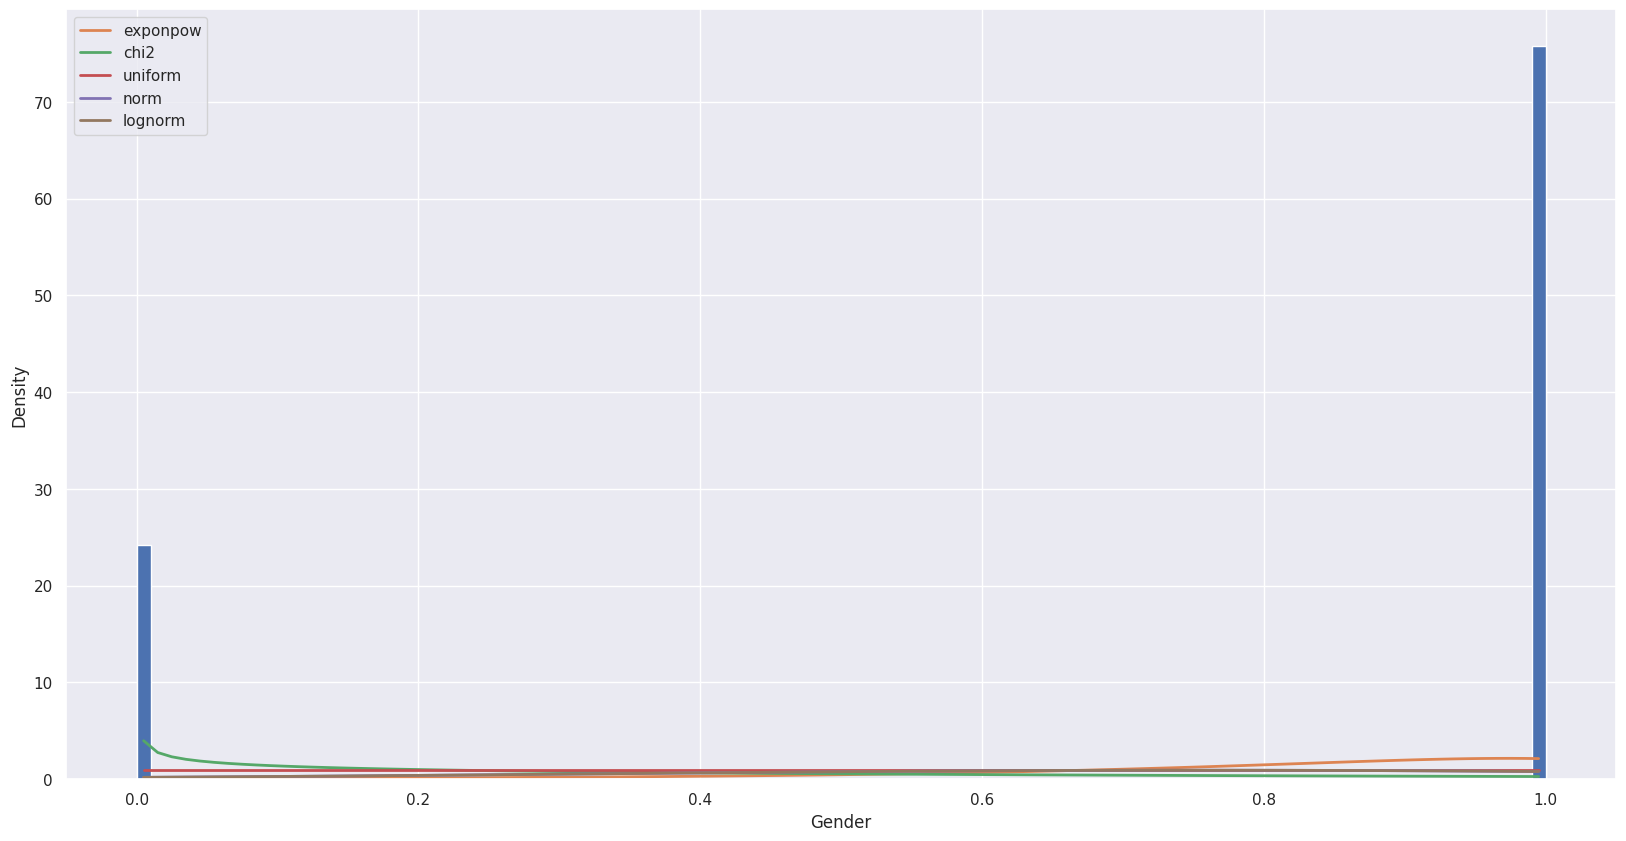

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 10.49it/s]


         sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm         0.030530  1591.330203 -5716.806247     inf      0.163988   
cauchy          0.035548  1772.868902 -5634.613936     inf      0.270750   
chi2            0.158970  1867.420585 -4756.506449     inf      0.193112   
expon           0.225080  2786.688383 -4560.488414     inf      0.340740   
gamma           0.229688  1971.396546 -4542.328596     inf      0.586895   

             ks_pvalue  
lognorm   3.814852e-14  
cauchy    3.545550e-38  
chi2      1.740091e-19  
expon     8.199421e-61  
gamma    2.945841e-191  


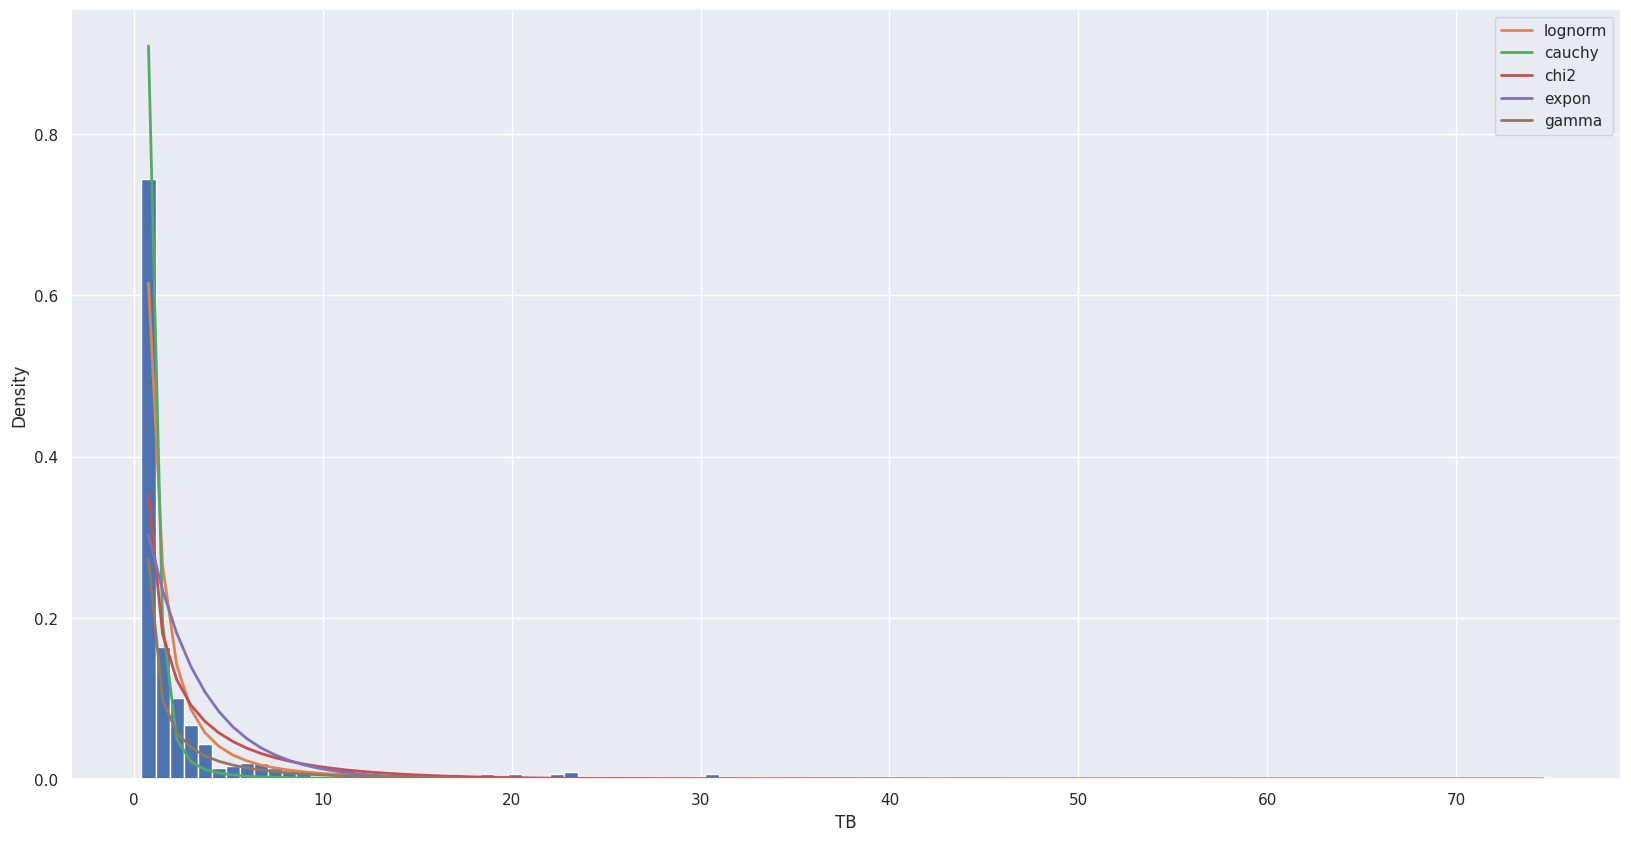

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  7.90it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
cauchy           0.378898  1376.581956 -4257.376666     inf      0.327408   
exponpow         1.466972   981.906509 -3463.163823     inf      0.203441   
chi2             1.789775   903.466746 -3347.410107     inf      0.225278   
gamma            2.122378   850.626543 -3248.209878     inf      0.273543   
powerlaw         2.731830   838.763117 -3101.292819     inf      0.402930   

             ks_pvalue  
cauchy    4.622641e-56  
exponpow  1.349677e-21  
chi2      1.959951e-26  
gamma     5.672309e-39  
powerlaw  7.755802e-86  


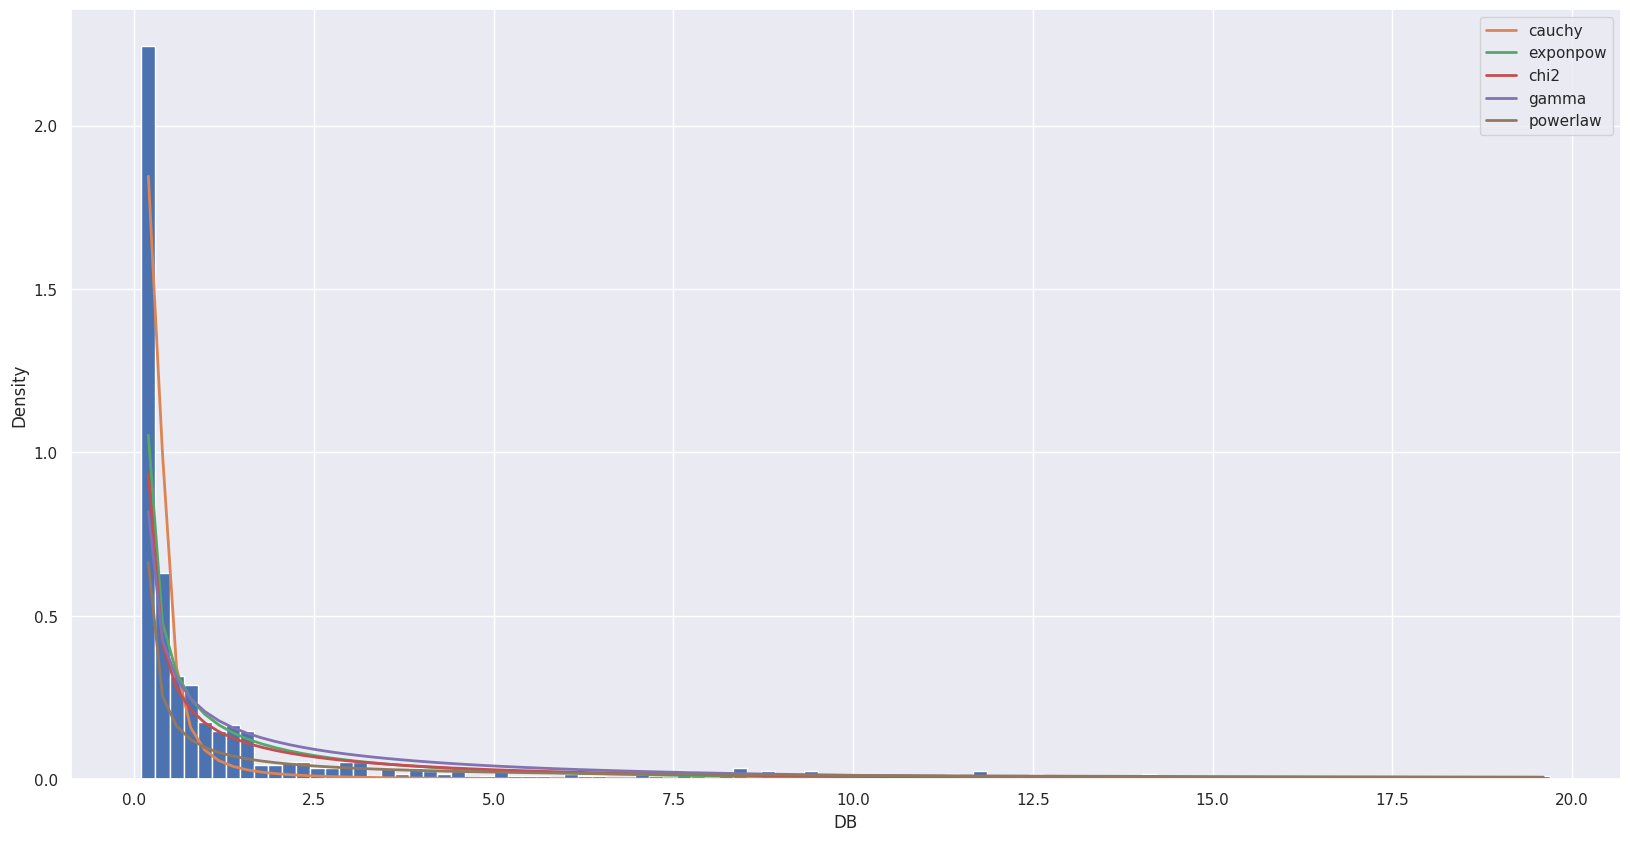

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  9.32it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
cauchy           0.000021  2052.578362 -9949.840642     inf      0.154017   
lognorm          0.000040  2100.567110 -9575.592512     inf      0.117224   
rayleigh         0.000096  2870.849262 -9078.966522     inf      0.276229   
expon            0.000101  1988.429063 -9048.967027     inf      0.231882   
norm             0.000111  2951.323932 -8989.873348     inf      0.254143   

             ks_pvalue  
cauchy    1.603773e-12  
lognorm   2.002995e-07  
rayleigh  9.549043e-40  
expon     5.342625e-28  
norm      1.266204e-33  


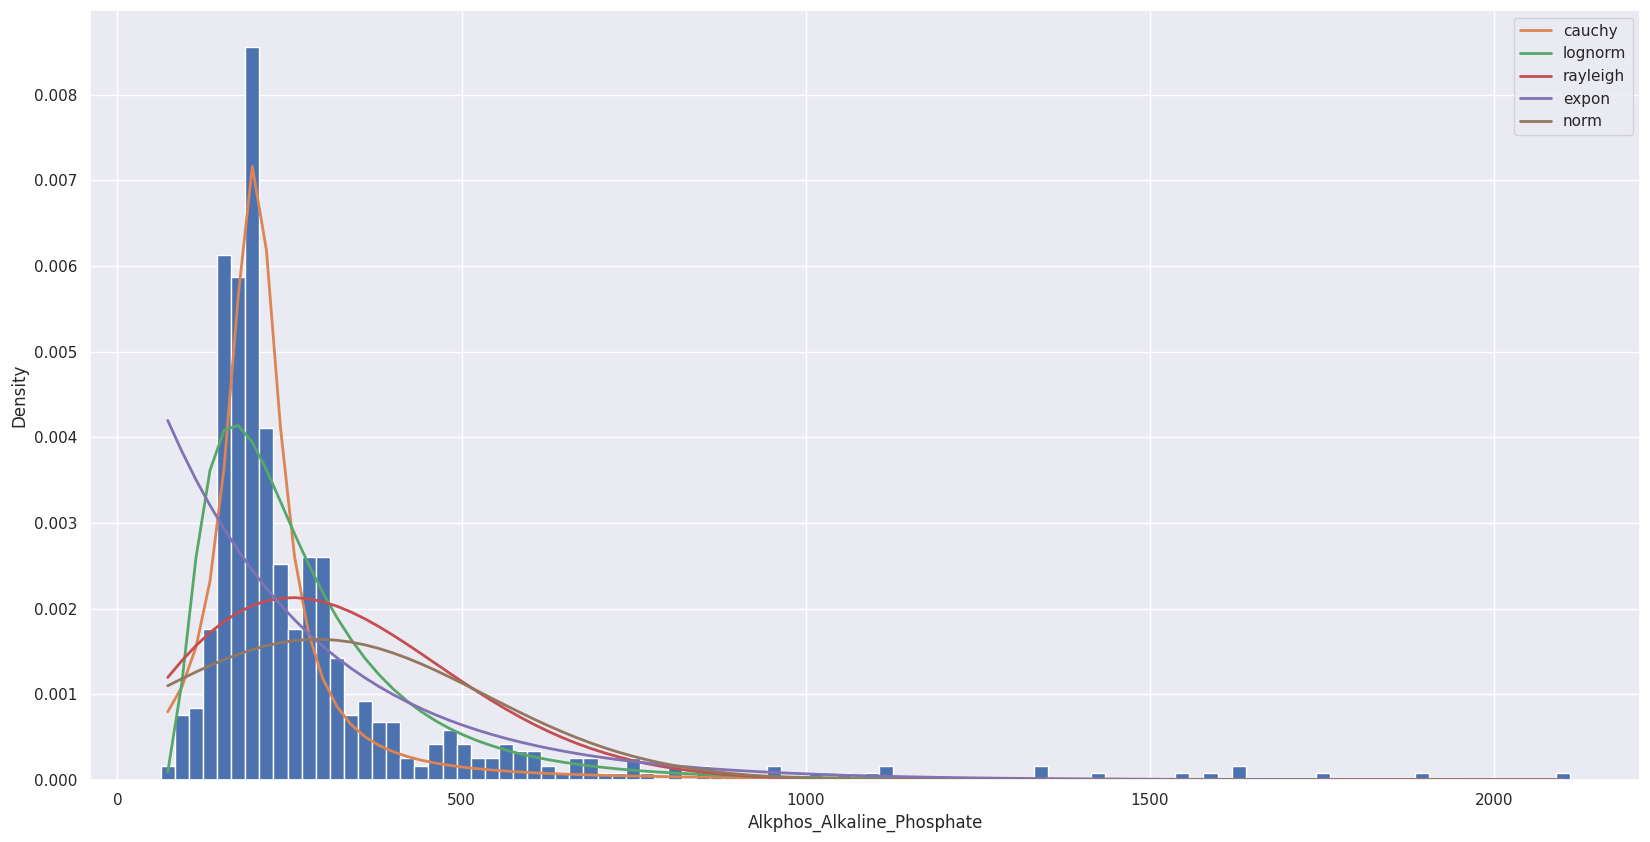

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  8.59it/s]


          sumsquare_error          aic           bic  kl_div  ks_statistic  \
lognorm          0.000012  2358.941628 -10268.287920     inf      0.068031   
cauchy           0.000044  2338.338362  -9525.070623     inf      0.188084   
chi2             0.000086  2858.767114  -9136.562412     inf      0.204734   
expon            0.000100  3665.794229  -9052.145300     inf      0.248901   
exponpow         0.000240  1755.444984  -8537.487967     inf      0.352829   

             ks_pvalue  
lognorm   8.712079e-03  
cauchy    1.684850e-18  
chi2      7.210872e-22  
expon     2.993872e-32  
exponpow  2.640612e-65  


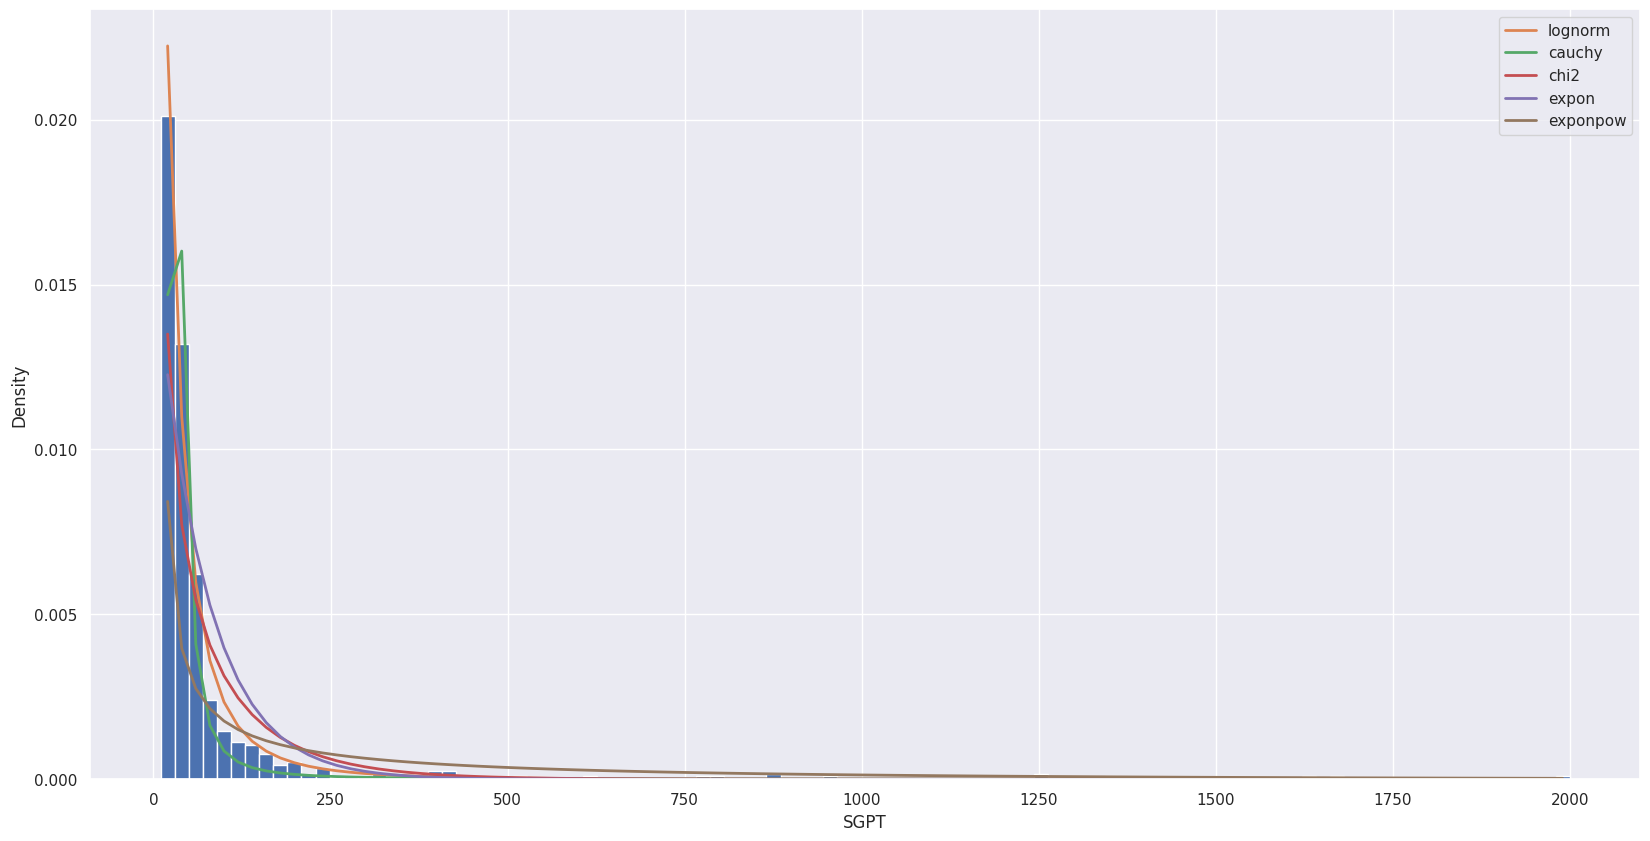

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  8.34it/s]


         sumsquare_error          aic           bic  kl_div  ks_statistic  \
lognorm         0.000002  2742.052103 -11393.372508     inf      0.058622   
cauchy          0.000019  2641.538926 -10029.259829     inf      0.210654   
expon           0.000036  5840.793013  -9644.834568     inf      0.262317   
gamma           0.000043  3585.483979  -9535.557501     inf      0.178734   
chi2            0.000066  2528.387515  -9285.849397     inf      0.240649   

            ks_pvalue  
lognorm  3.516881e-02  
cauchy   3.880110e-23  
expon    7.942775e-36  
gamma    9.753215e-17  
chi2     3.777824e-30  


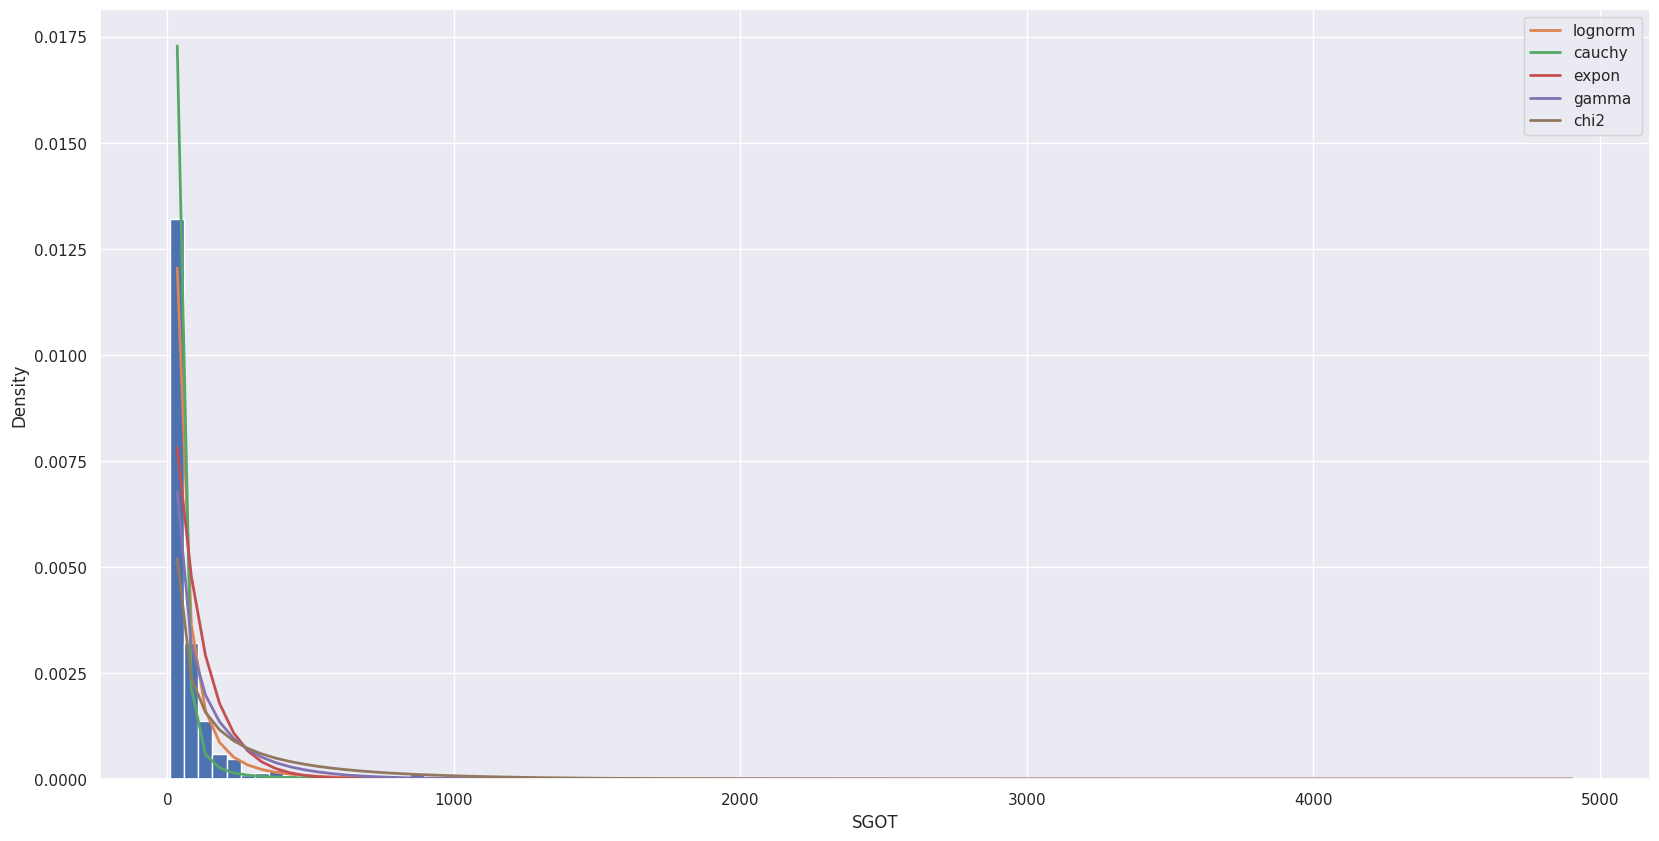

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  9.14it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
norm             2.311276  550.322100 -3204.953498     inf      0.063460   
lognorm          2.313717  555.611784 -3197.972579     inf      0.065777   
gamma            2.322417  555.436731 -3195.788311     inf      0.065855   
chi2             2.332233  559.199200 -3193.333457     inf      0.073534   
exponpow         2.384625  544.351754 -3180.404123     inf      0.068548   

          ks_pvalue  
norm       0.017611  
lognorm    0.012403  
gamma      0.012254  
chi2       0.003499  
exponpow   0.008021  


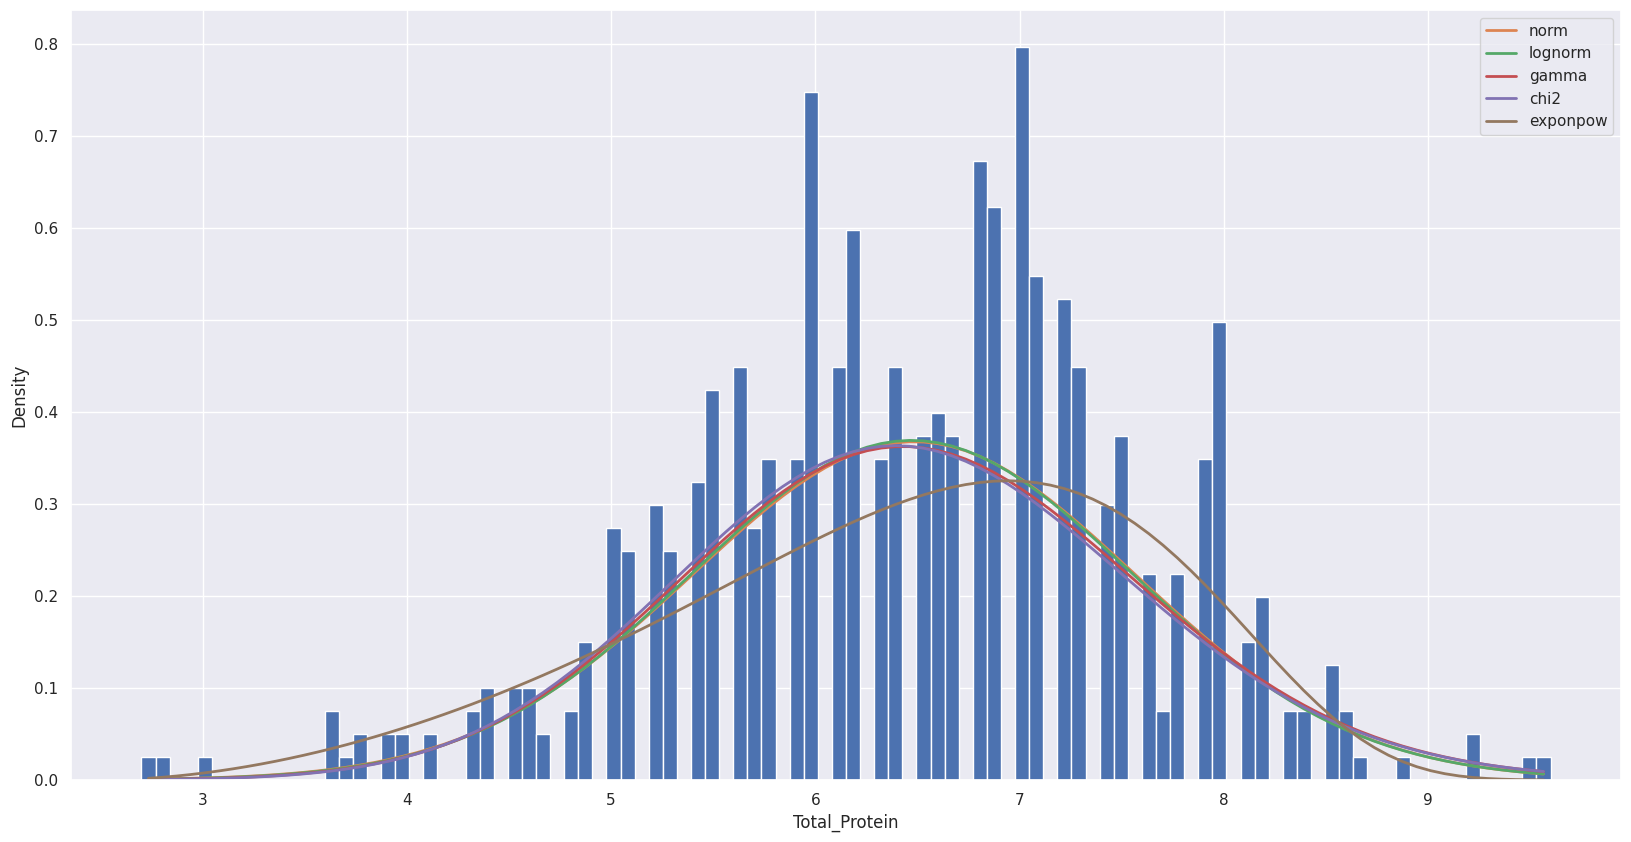

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  9.85it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
exponpow        10.513335  437.787701 -2316.947291     inf      0.062060   
norm            10.524093  421.192767 -2322.718557     inf      0.060046   
gamma           10.525081  422.440929 -2316.297418     inf      0.059814   
lognorm         10.525601  422.887820 -2316.268694     inf      0.060628   
chi2            10.539800  420.614350 -2315.484079     inf      0.059064   

          ks_pvalue  
exponpow   0.021634  
norm       0.028854  
gamma      0.029809  
lognorm    0.026575  
chi2       0.033088  


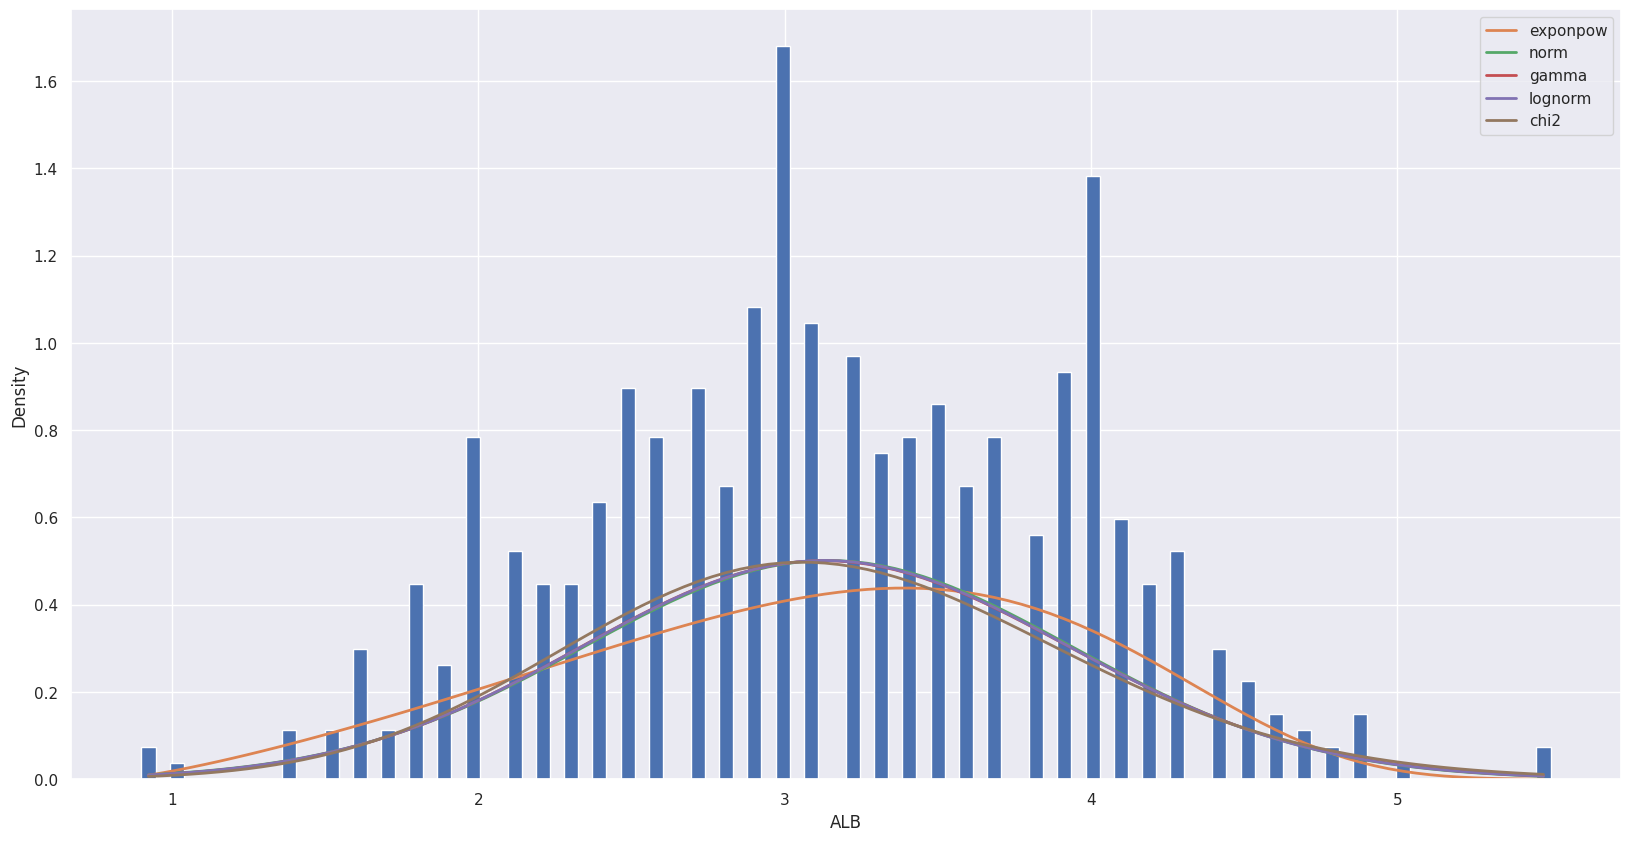

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 14.56it/s]


          sumsquare_error         aic         bic  kl_div  ks_statistic  \
norm           103.701633  829.624842 -991.189466     inf      0.128932   
lognorm        103.928698  537.326605 -983.550040     inf      0.100337   
gamma          103.959832  554.992504 -983.375713     inf      0.098044   
chi2           103.959835  554.992044 -983.375701     inf      0.098044   
rayleigh       105.151156  535.434438 -983.110703     inf      0.114940   

             ks_pvalue  
norm      6.790716e-09  
lognorm   1.489808e-05  
gamma     2.538564e-05  
chi2      2.538548e-05  
rayleigh  3.732003e-07  


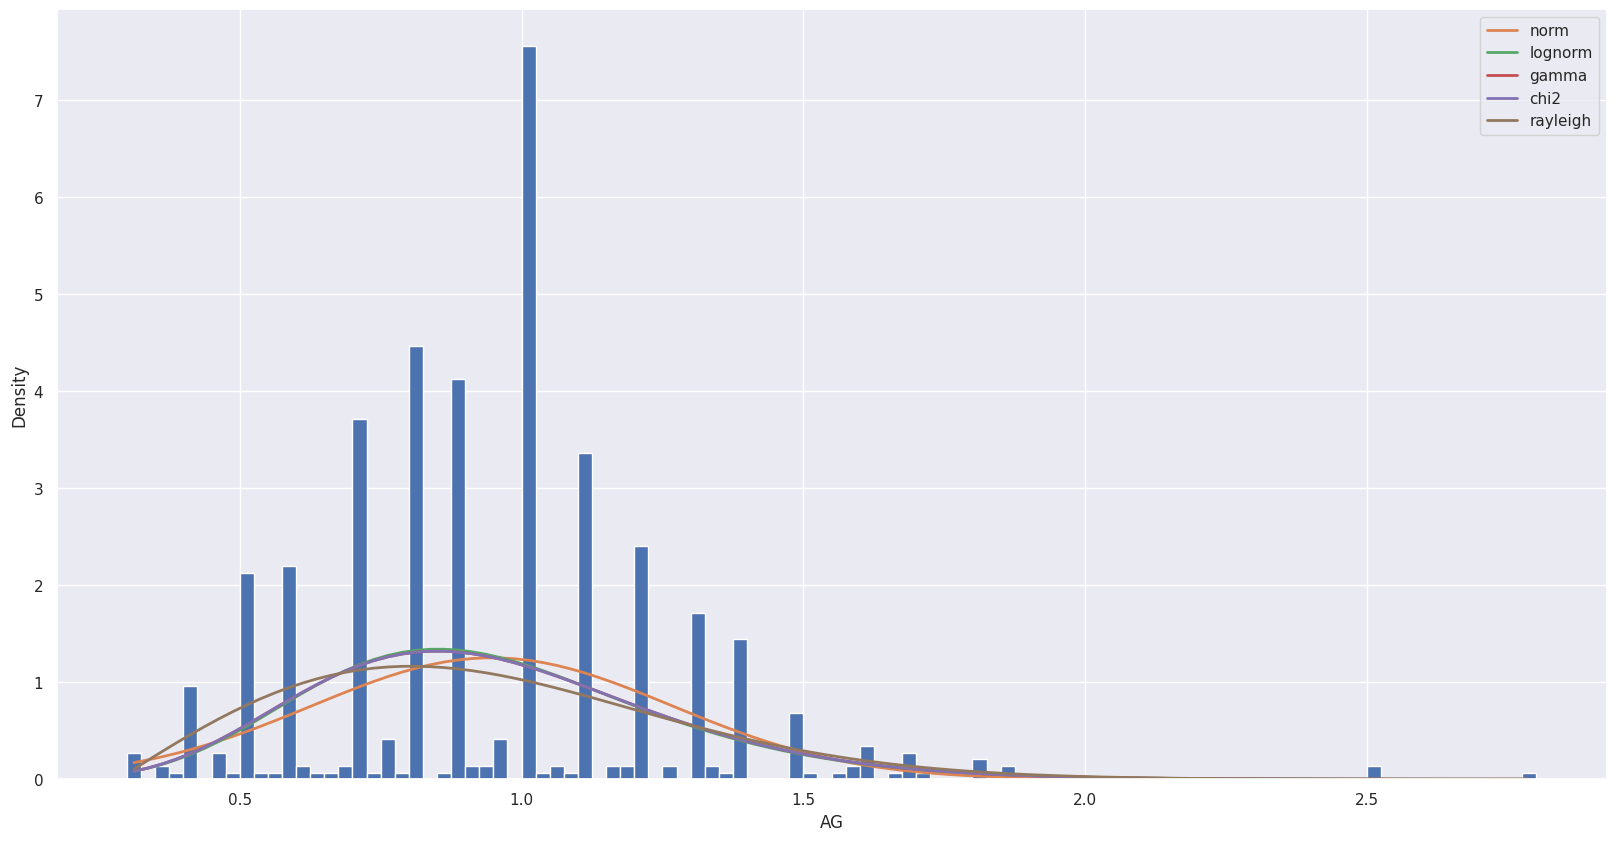

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 10.88it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
gamma         3591.435757  426.316712  1078.244479     inf      0.713002   
exponpow      4239.894024  266.336680  1174.848459     inf      0.712428   
chi2          4742.395996  132.119882  1240.034914     inf      0.713058   
powerlaw      5065.425306  467.418202  1278.386160     inf      0.467055   
expon         5587.271404  102.807667  1329.086502     inf      0.713058   

              ks_pvalue  
gamma     2.492589e-299  
exponpow  9.540521e-299  
chi2      2.184030e-299  
powerlaw  7.036271e-117  
expon     2.183956e-299  


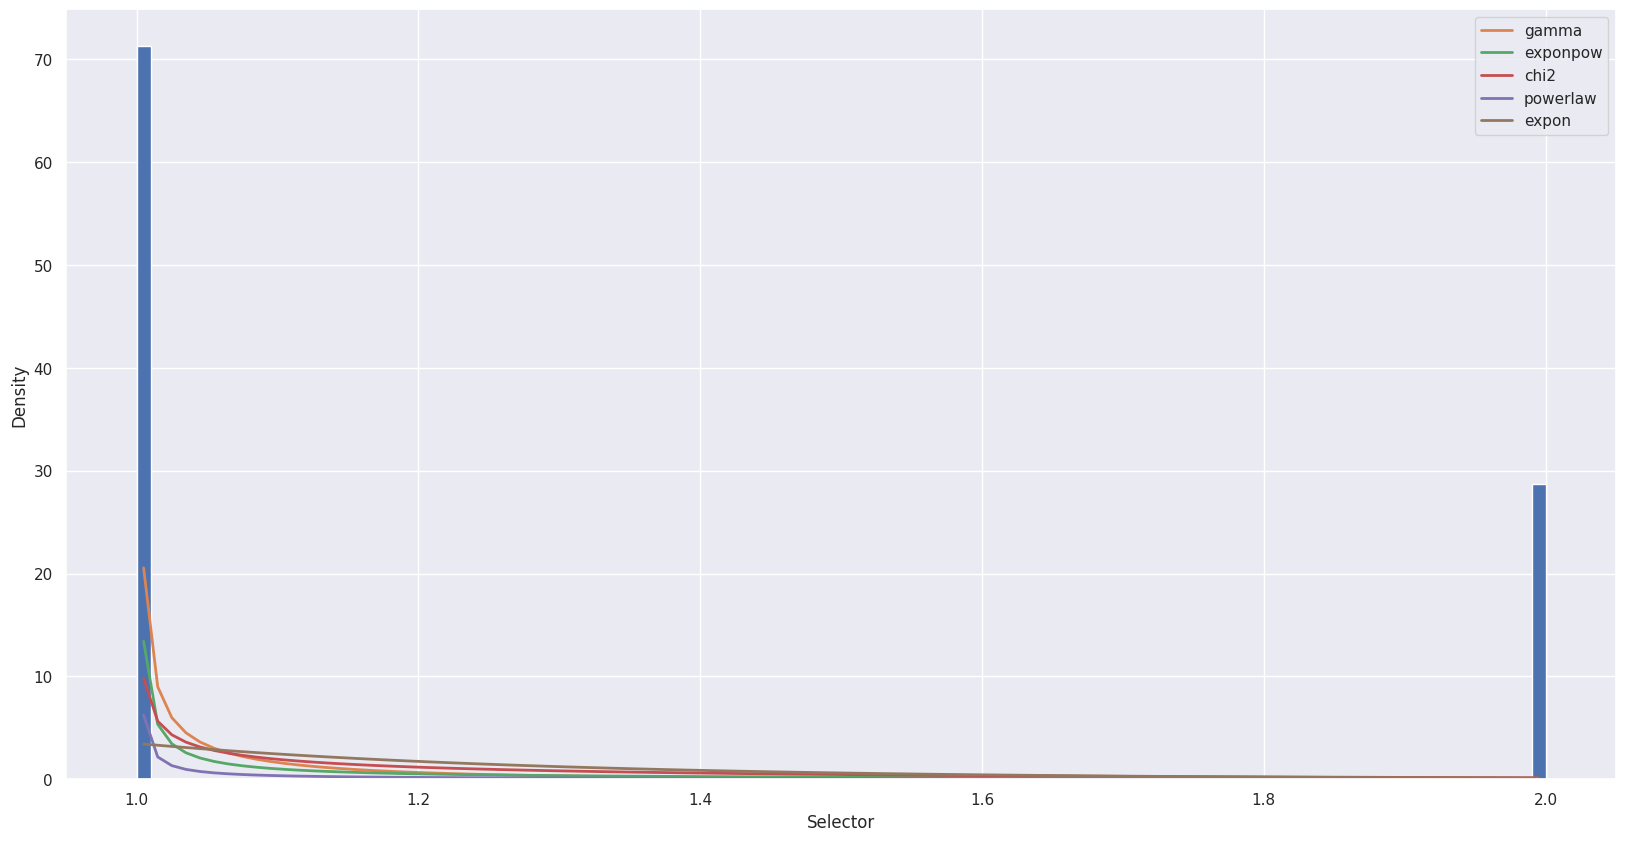

In [364]:
plt.rcParams["figure.figsize"] = (20, 10)
for i in df1.columns:
    values = df1[i].values
    f = Fitter(values, distributions=get_common_distributions())
    f.fit()
    print(f.summary())
    plt.ylabel("Density")
    plt.xlabel(i)
    plt.show()

<Axes: >

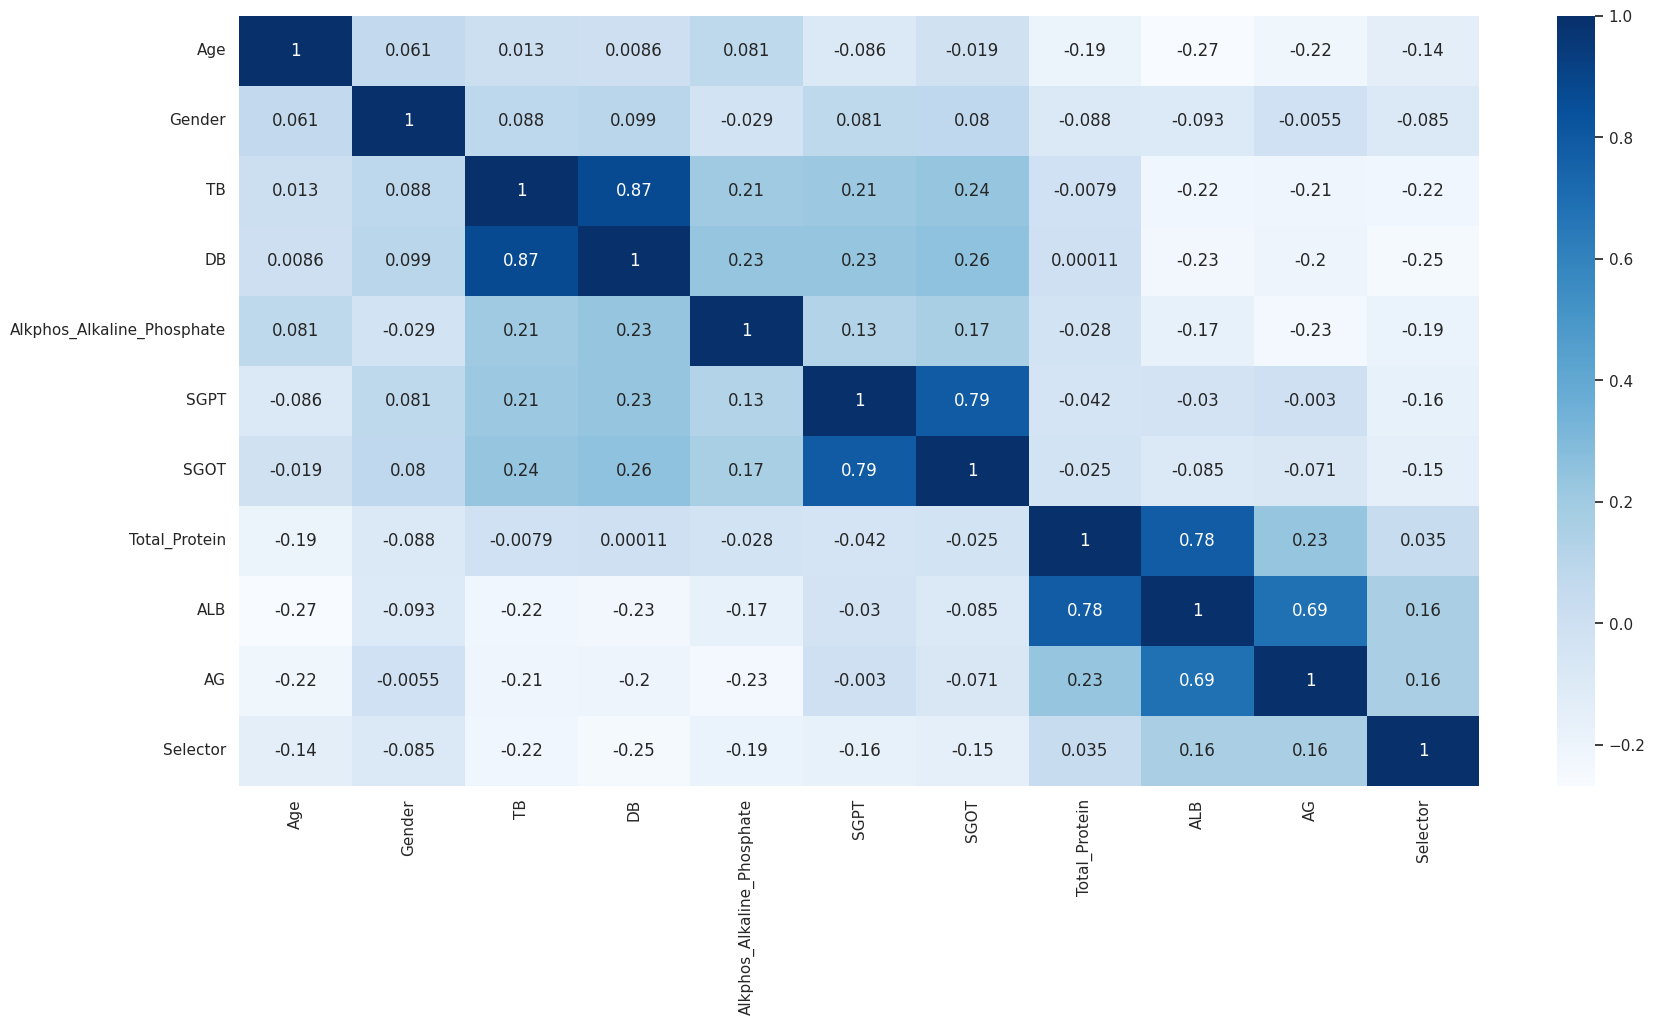

In [365]:
plt.rcParams["figure.figsize"] = (20, 10)
sns.heatmap(
    df1.corr(), annot=True, cmap="Blues"
)  # Heatmap showing correlation between the attributes.

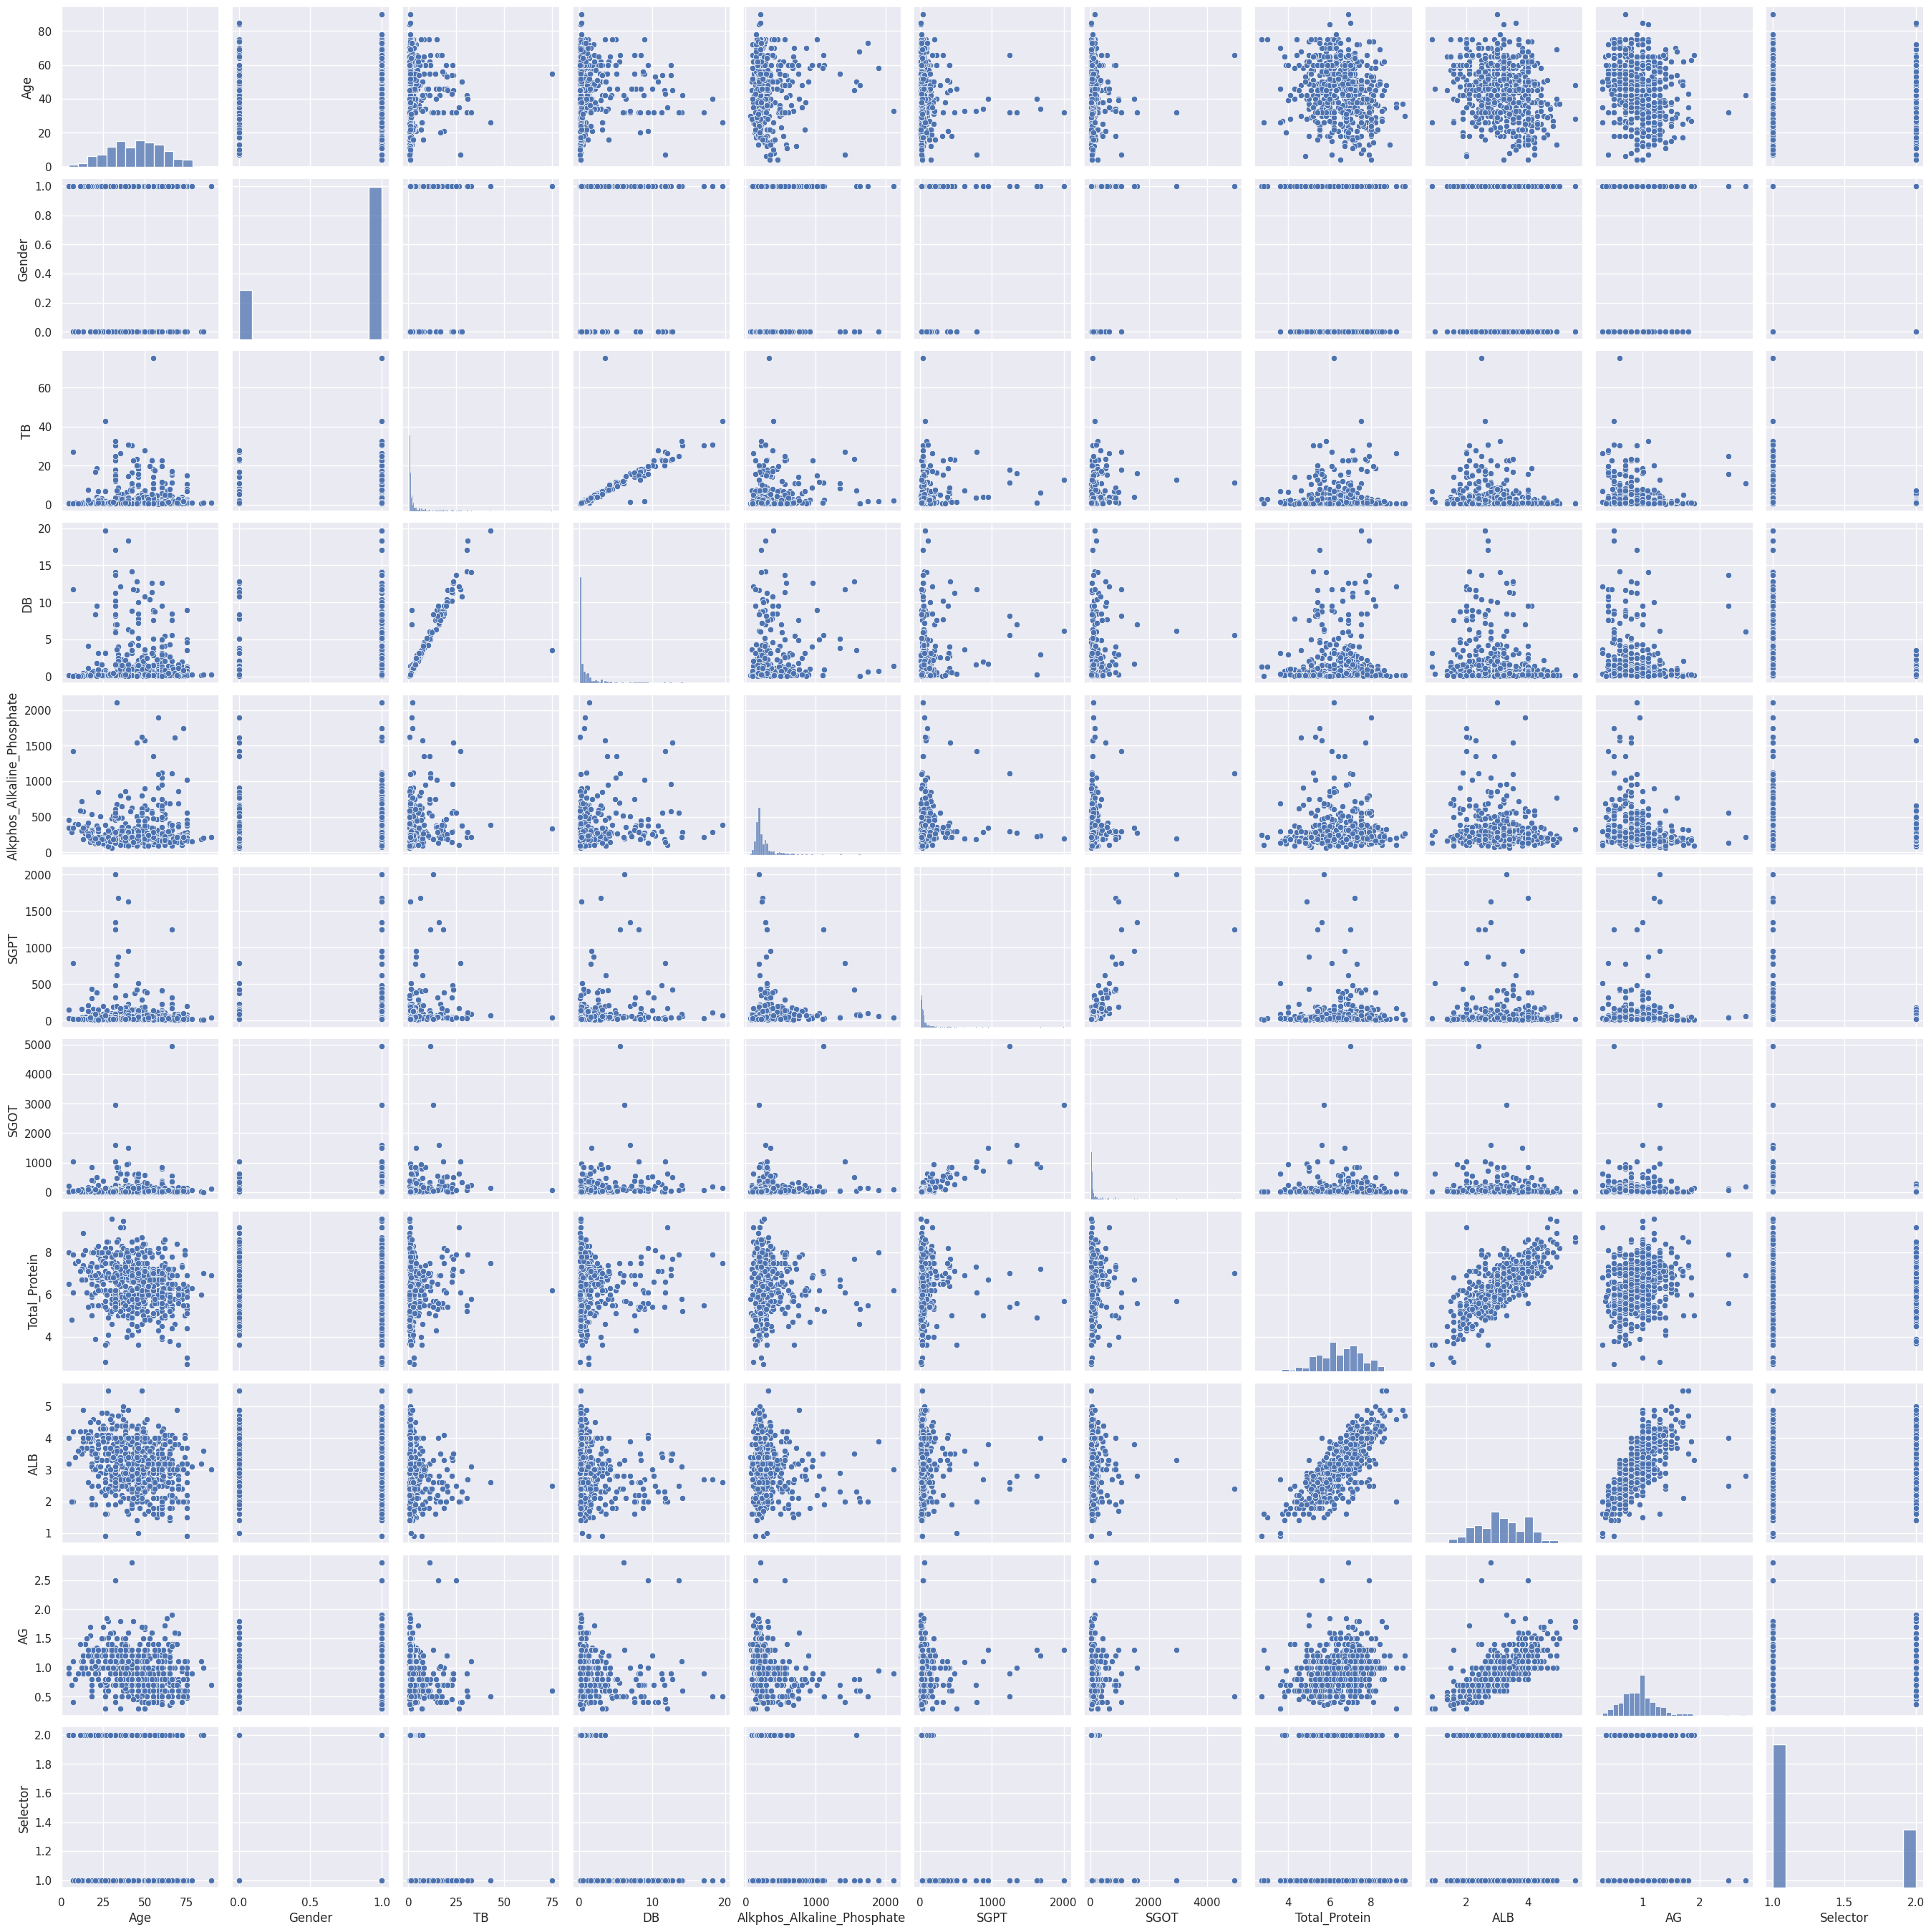

In [366]:
# All attributes are plotted against each other to see the pattern of distribution
sns.pairplot(df1)

<Figure size 500x300 with 0 Axes>

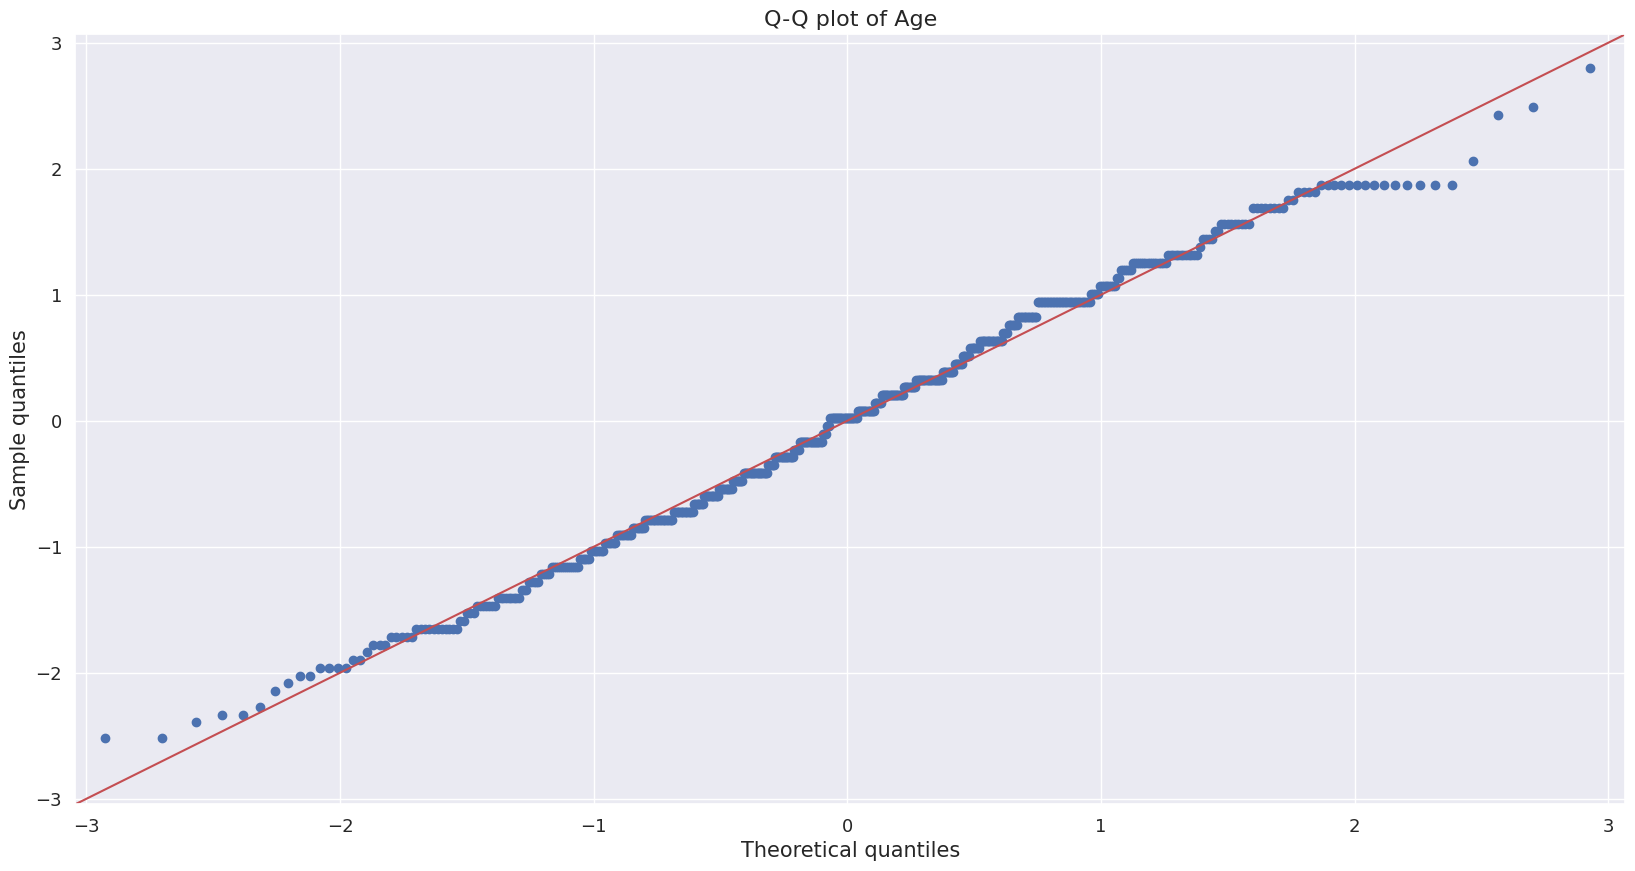

<Figure size 500x300 with 0 Axes>

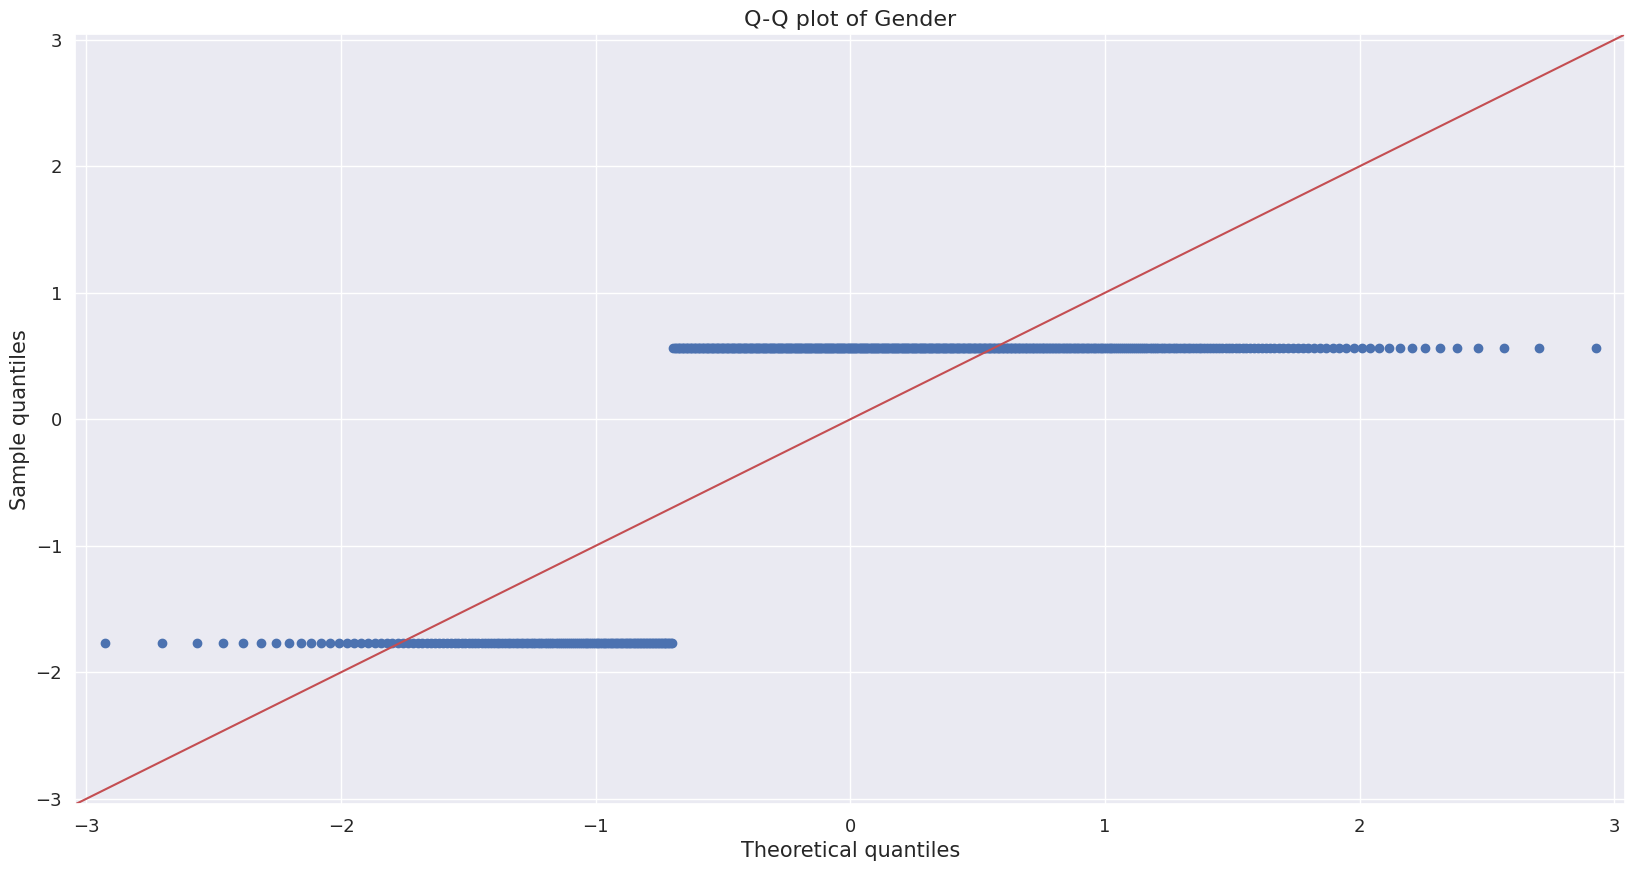

<Figure size 500x300 with 0 Axes>

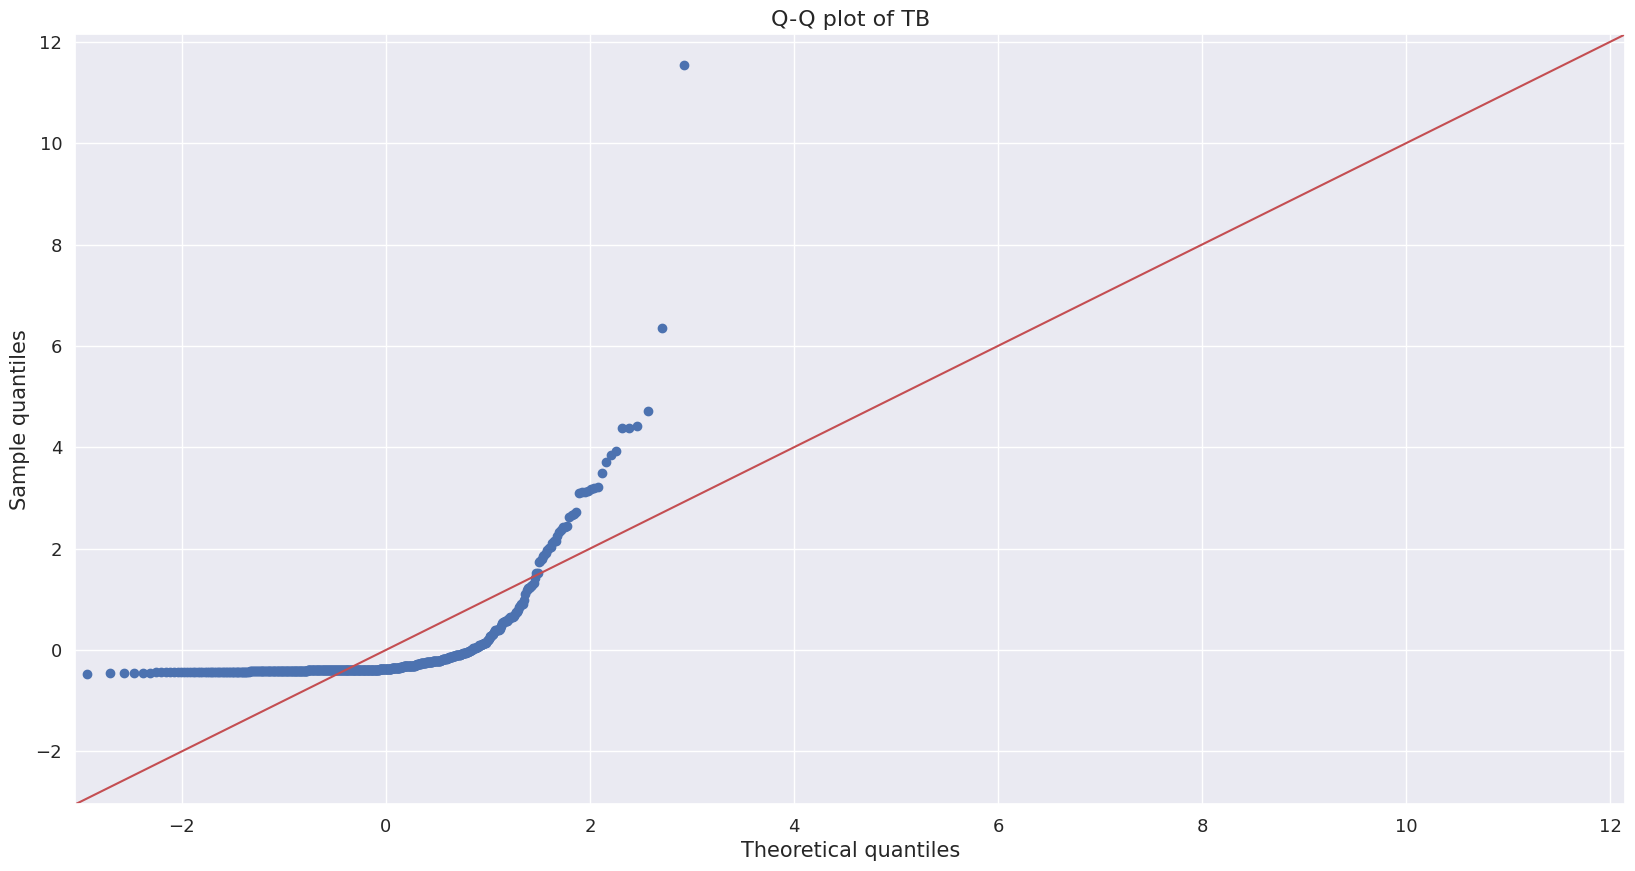

<Figure size 500x300 with 0 Axes>

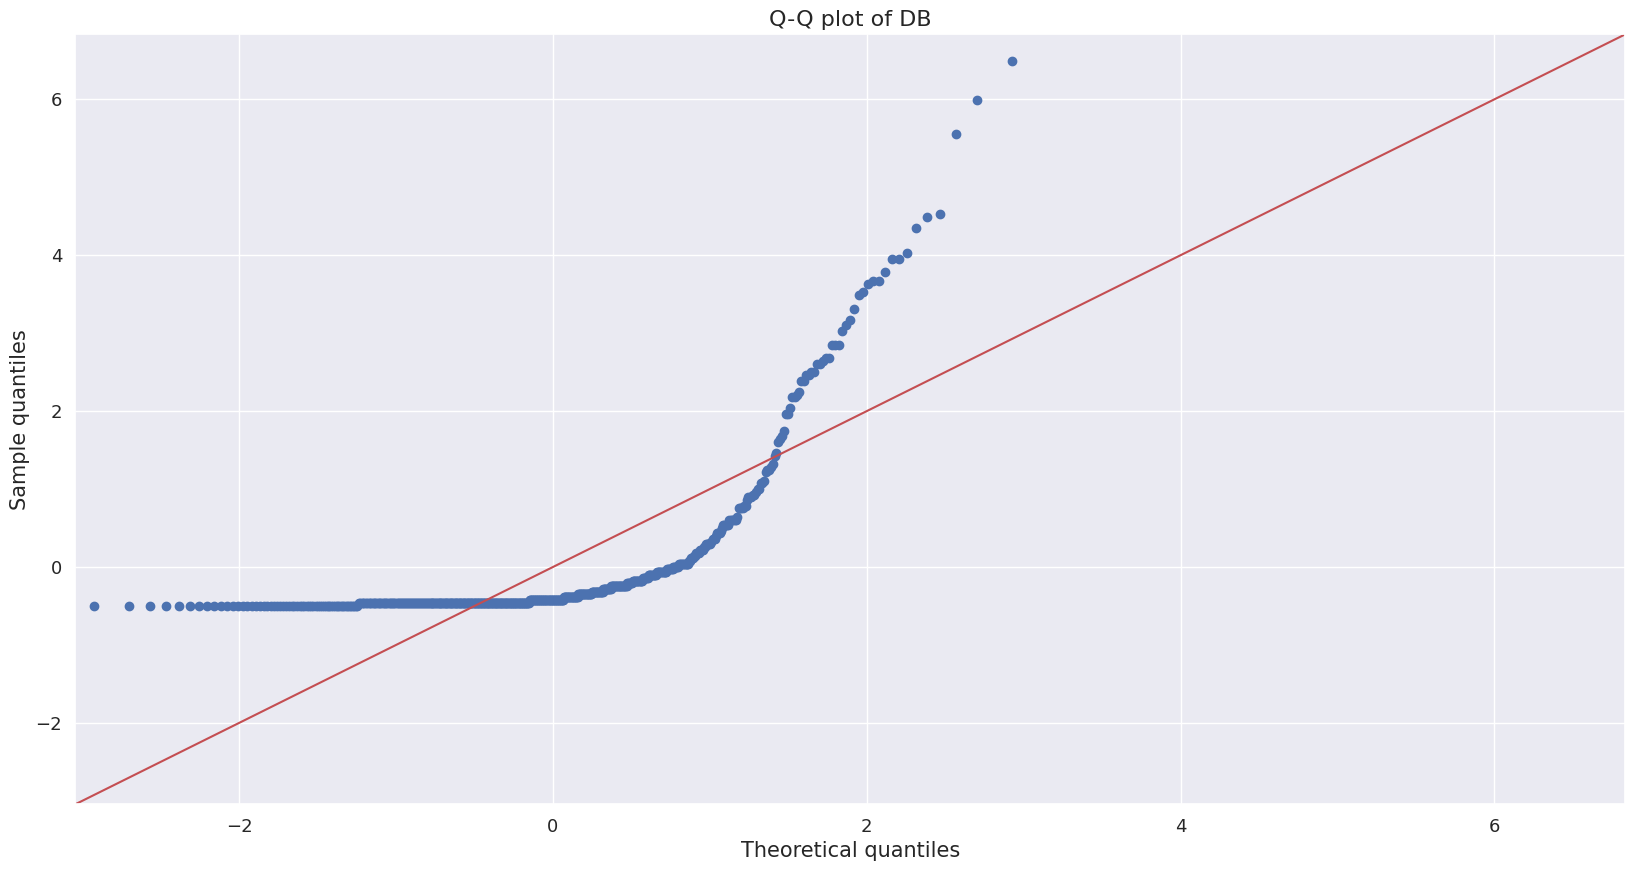

<Figure size 500x300 with 0 Axes>

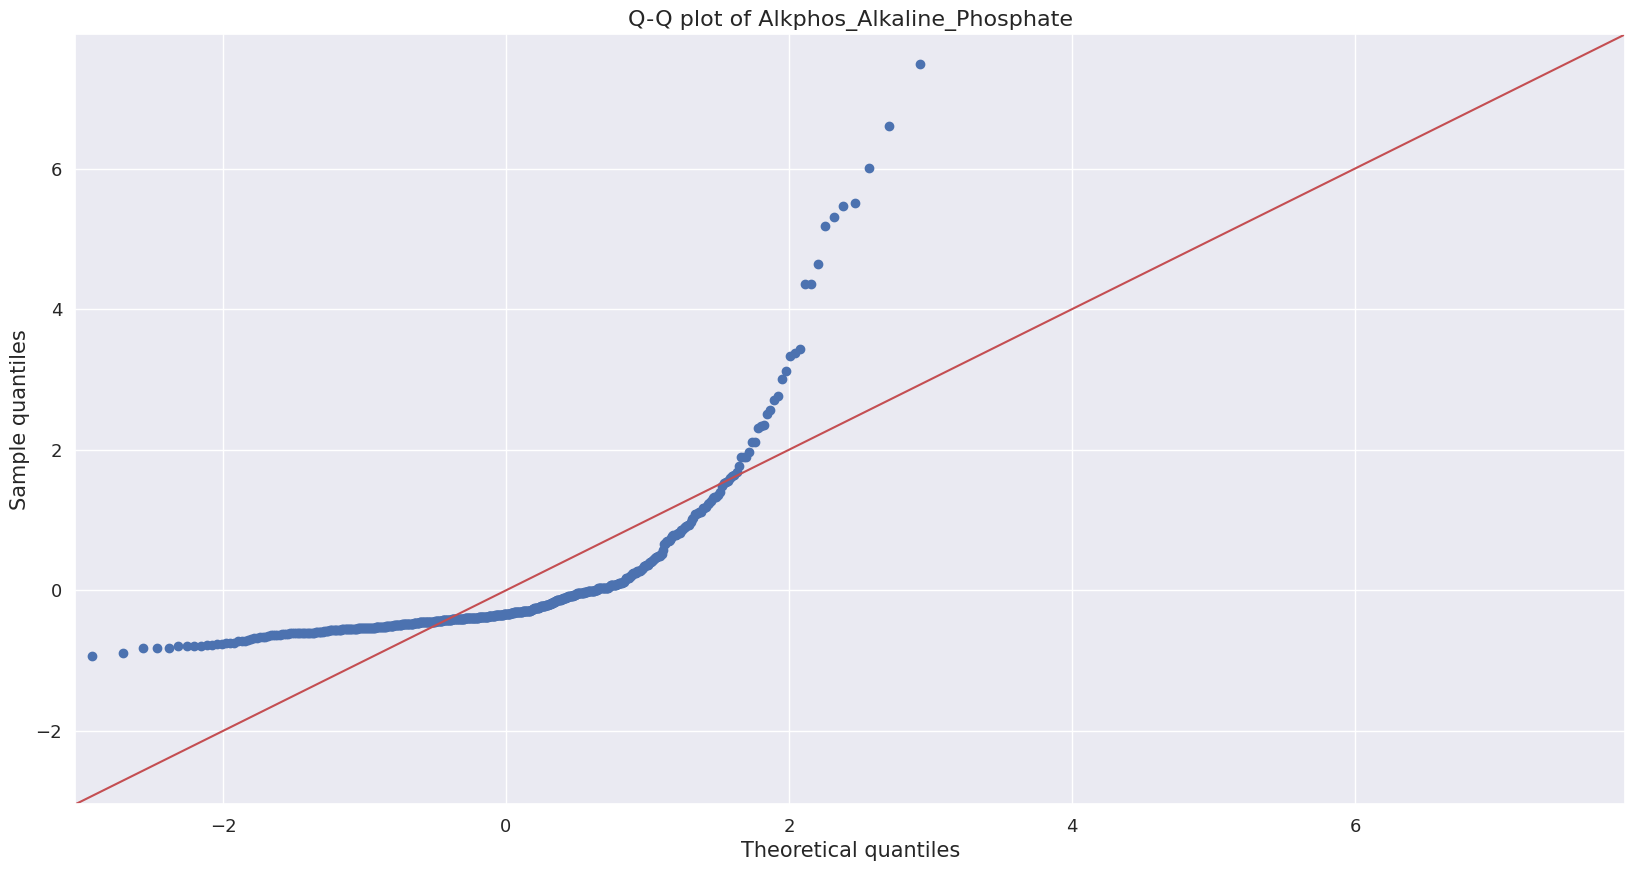

<Figure size 500x300 with 0 Axes>

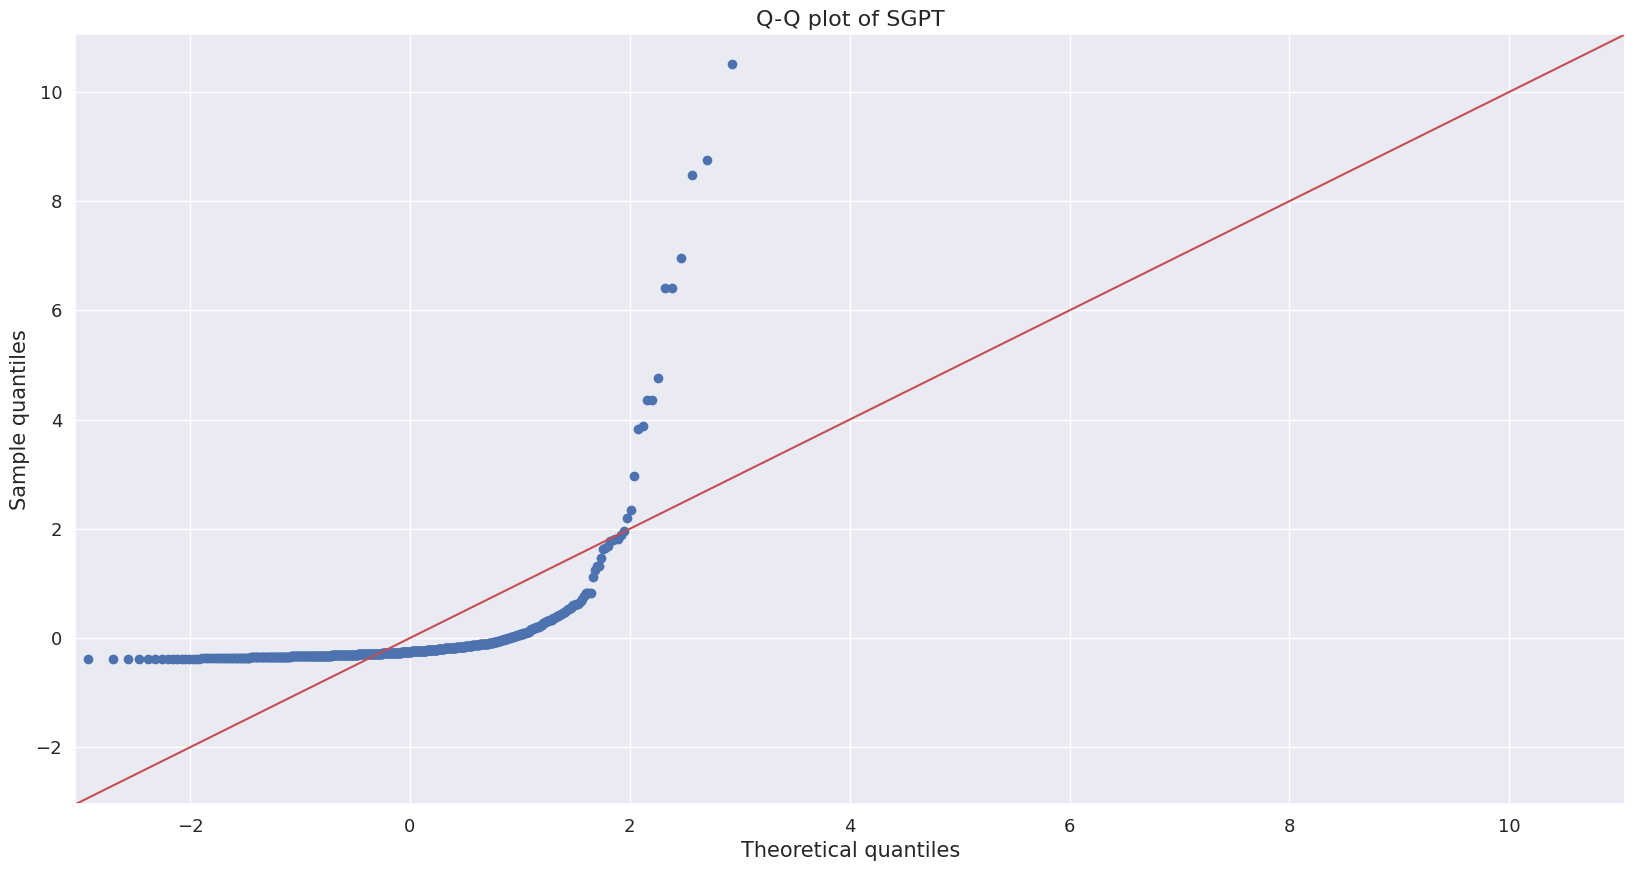

<Figure size 500x300 with 0 Axes>

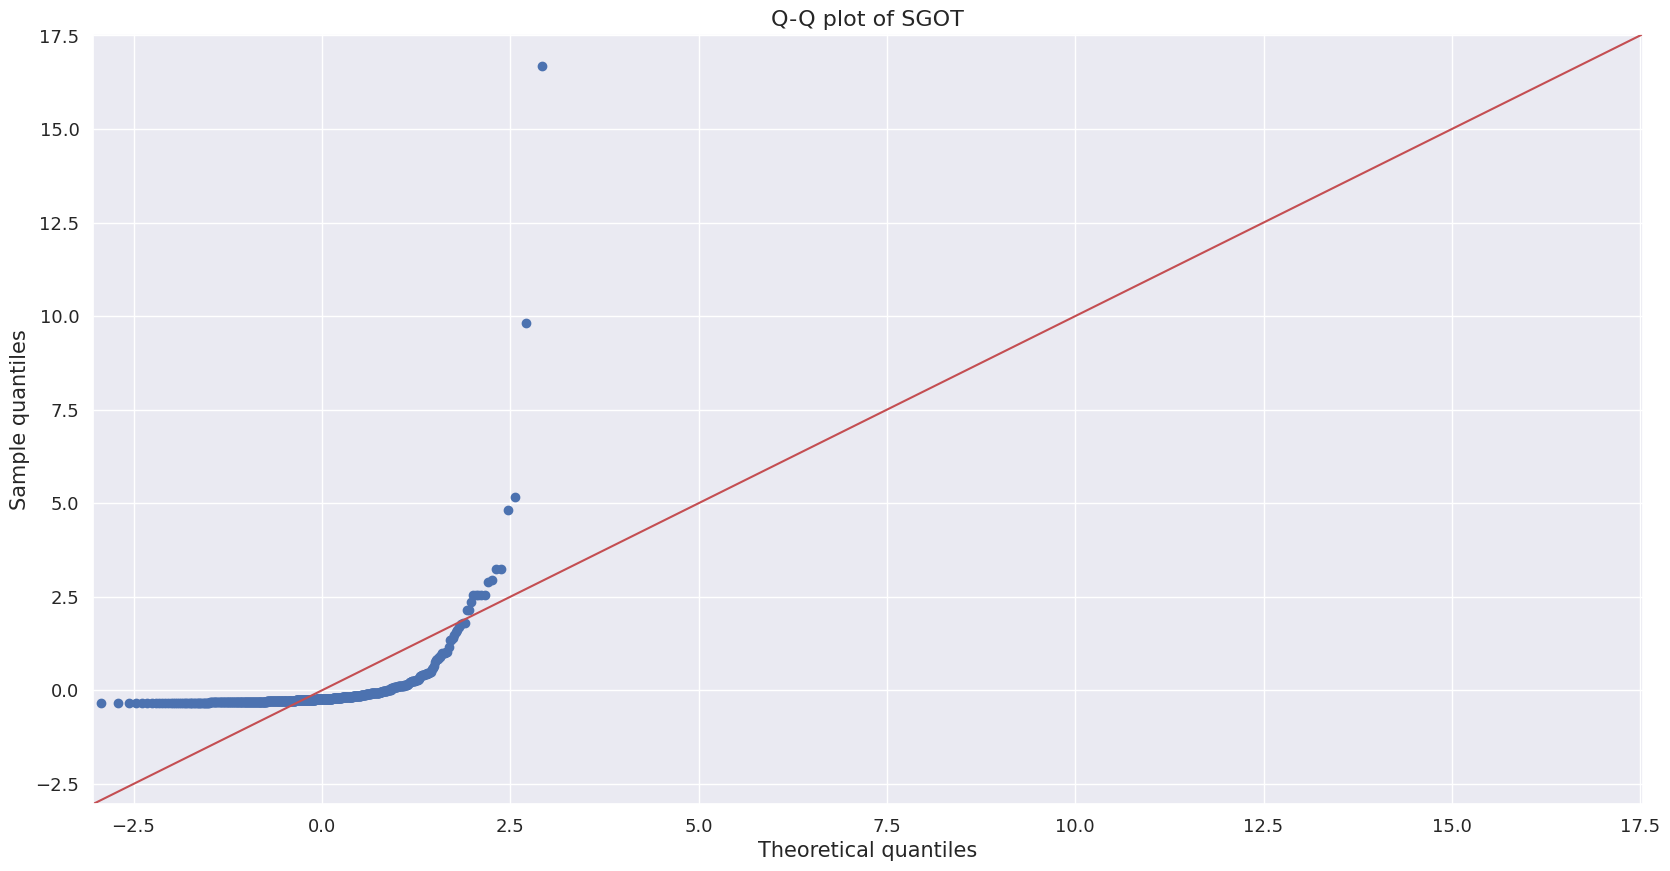

<Figure size 500x300 with 0 Axes>

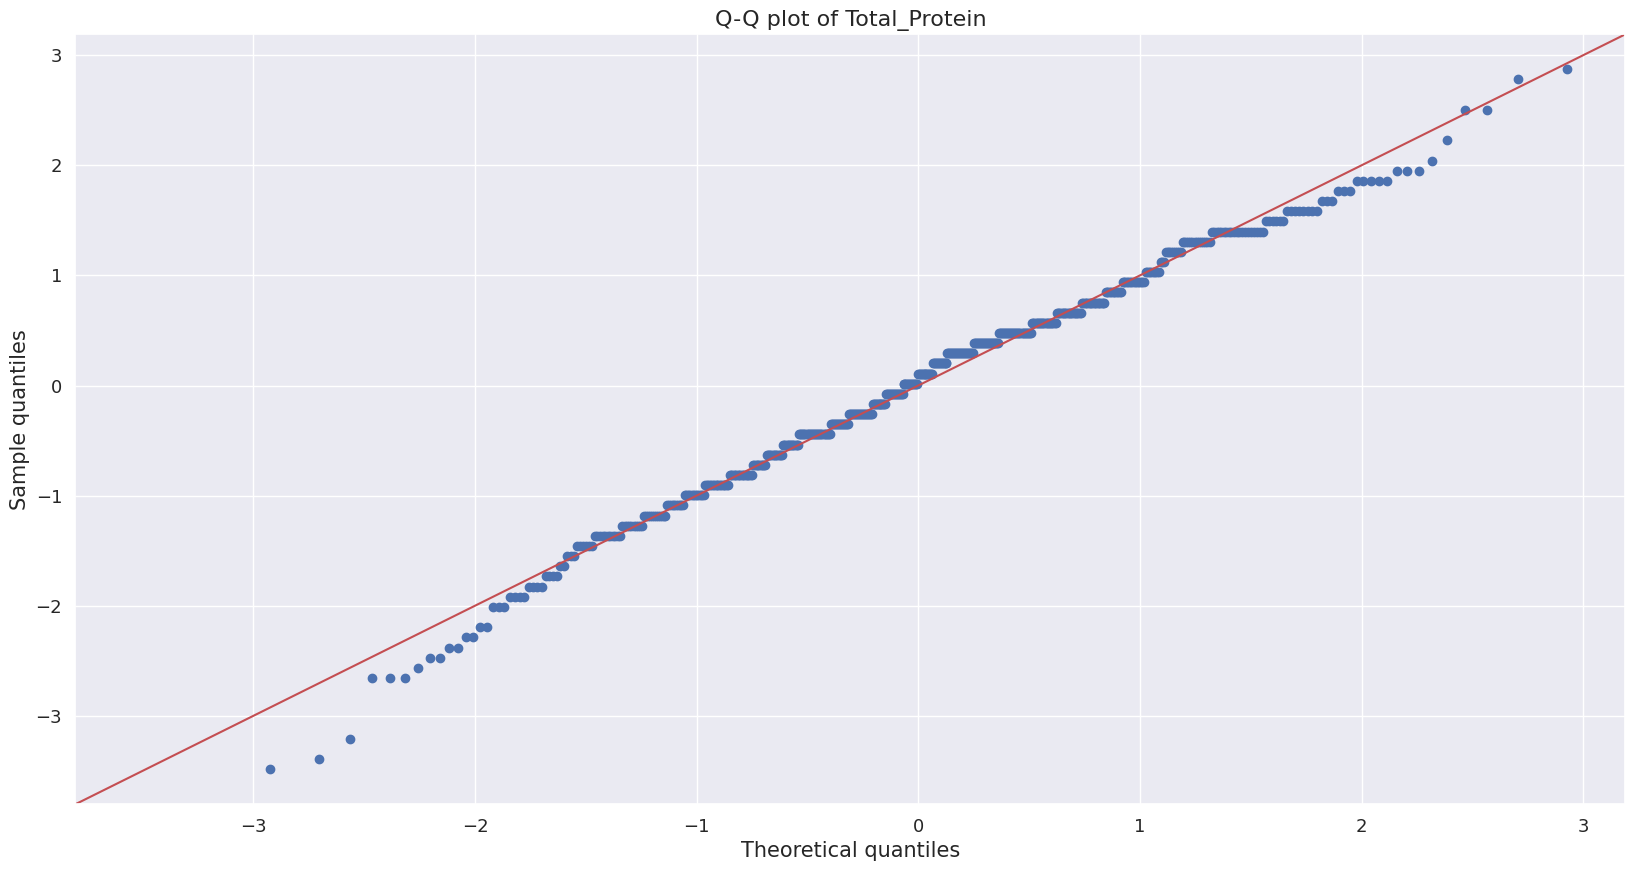

<Figure size 500x300 with 0 Axes>

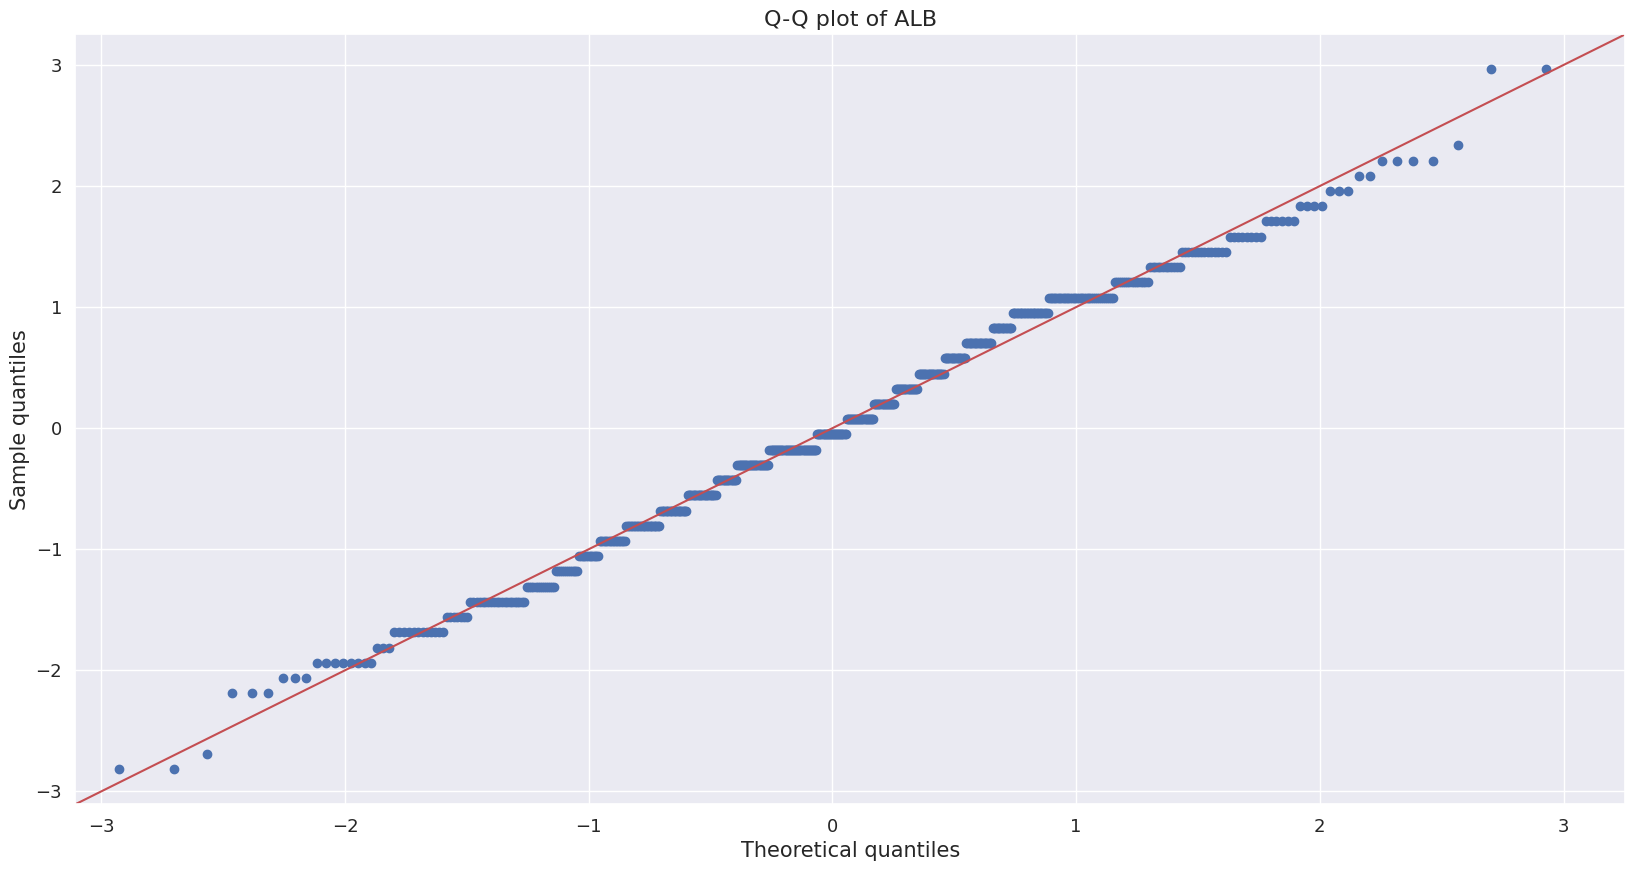

<Figure size 500x300 with 0 Axes>

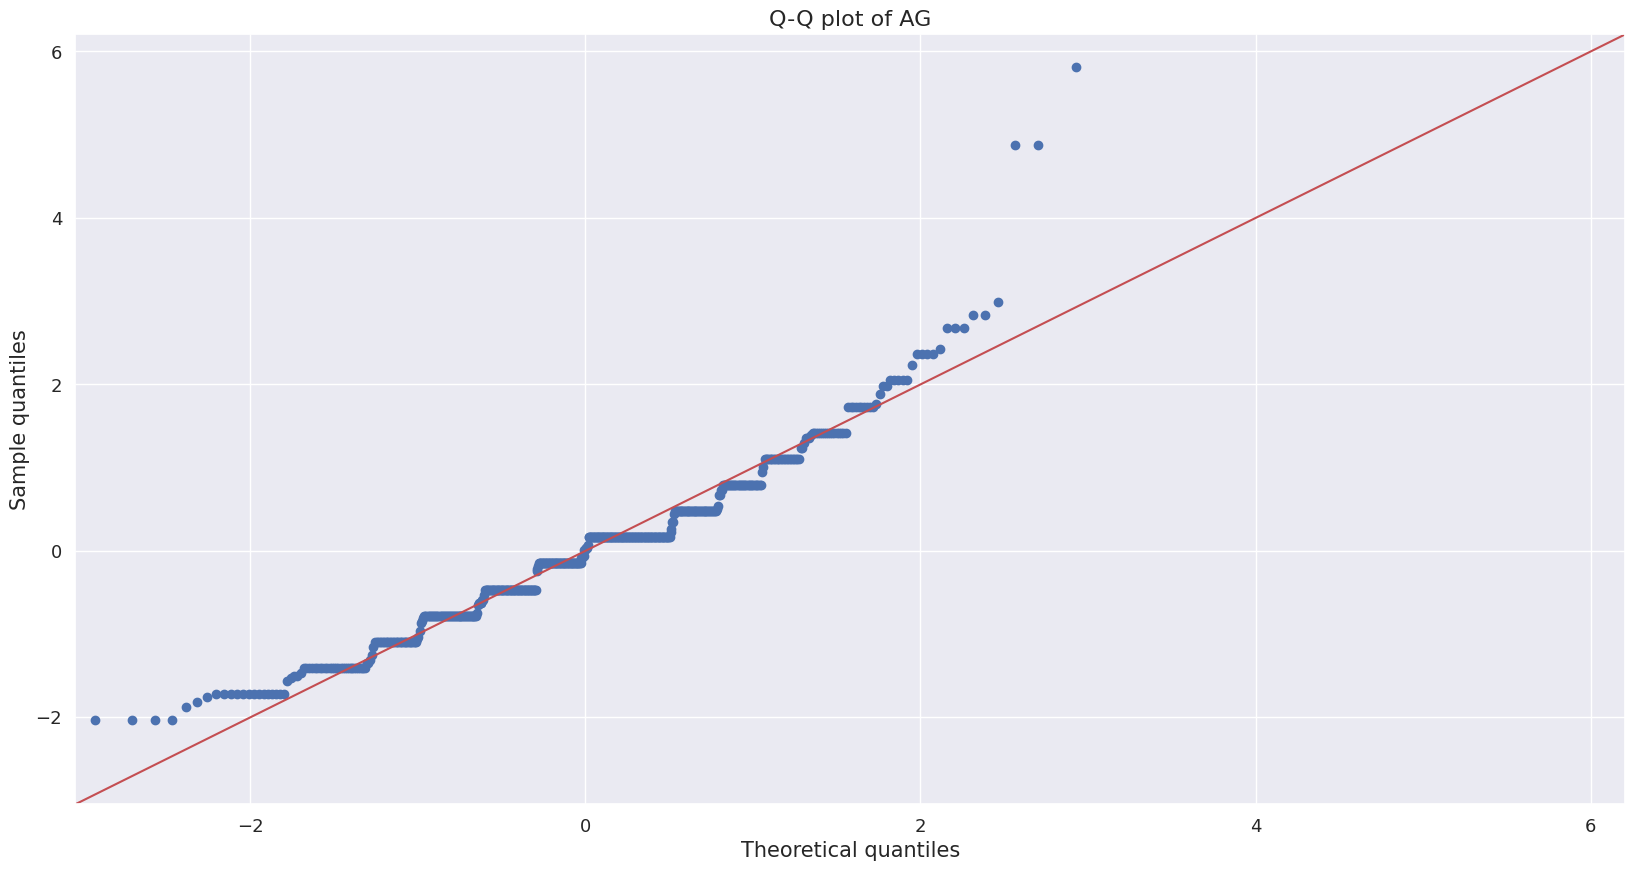

<Figure size 500x300 with 0 Axes>

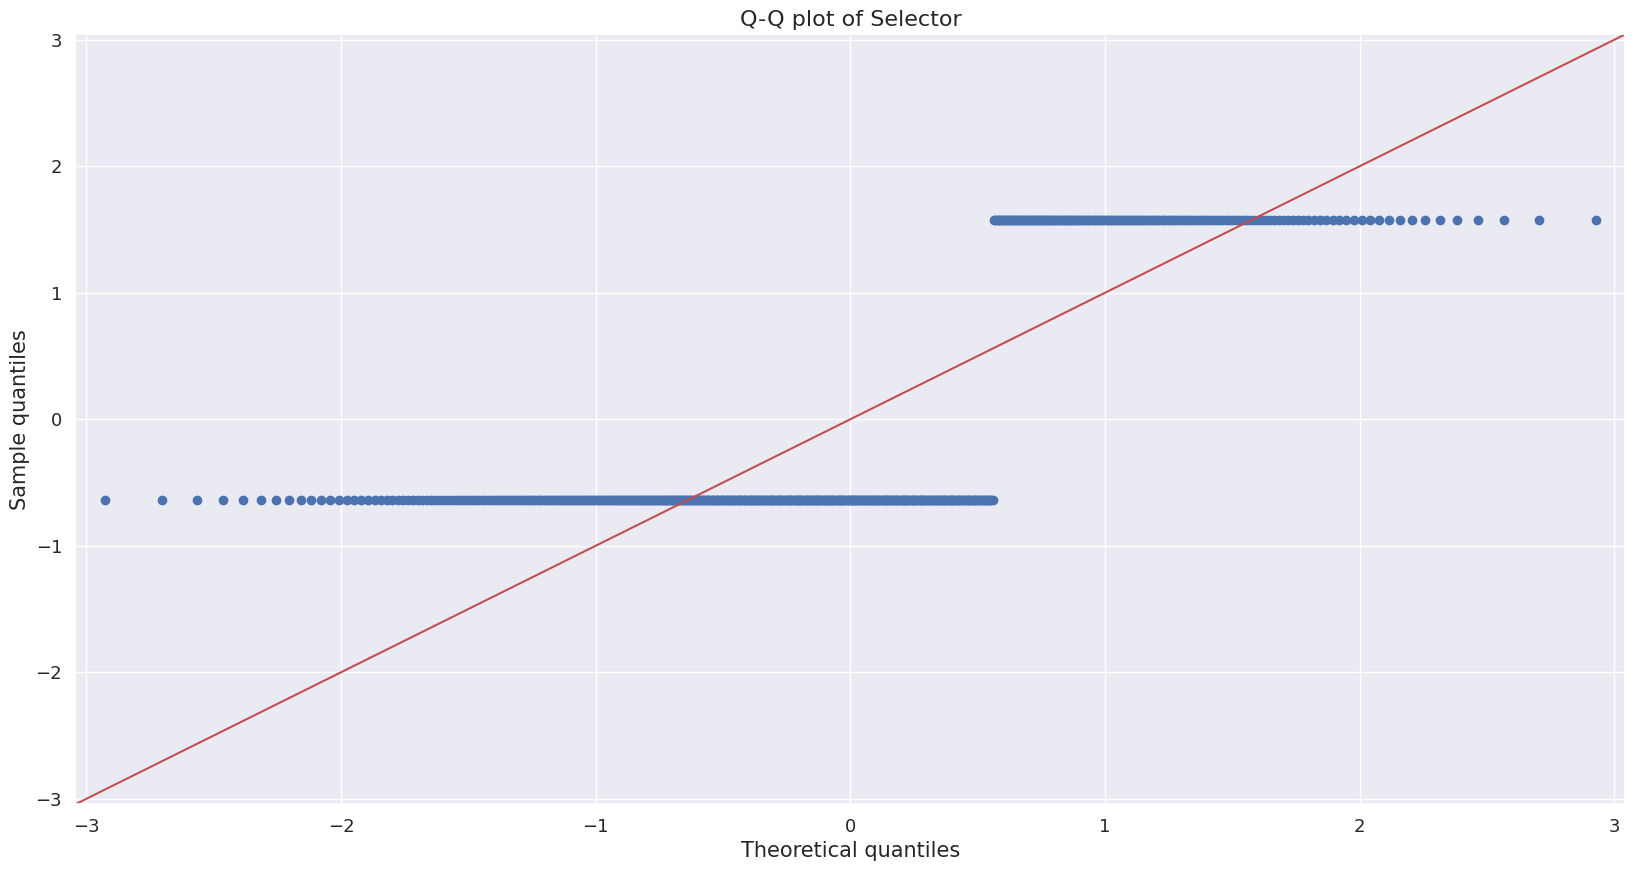

In [367]:
from statsmodels.graphics.gofplots import qqplot
data_col = df1[['Age','Gender','TB','DB','Alkphos_Alkaline_Phosphate', 'SGPT','SGOT','Total_Protein','ALB','AG','Selector']]
for c in df1.columns[:]:
  plt.figure(figsize=(5,3))
  fig=qqplot(data_col[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

Determining the likely distribution of numeric variables in a dataset is important as it provides insights into the shape, central tendency, and spread of the data. This information can be used to make decisions about the choice of algorithms, model parameters, and data transformations.

Age- Normally Distributed

Gender - Step Distribution

TB- Right Skewed Distribution

DB- Right Skewed Distribution

Alkphos Alkaline Phosphate- Right Skewed Distribution

SGPT- Right Skewed Distribution

SGOT- Right Skewed Distribution

Total Protein- Right Skewed Distribution

ALB- Normally Distributed

AG- Normally Distributed

Selector - Step Distribution

**Data normalization**

We have data and the respective features selected. We want to predict for attrition based on the features we have selected.

<Axes: >

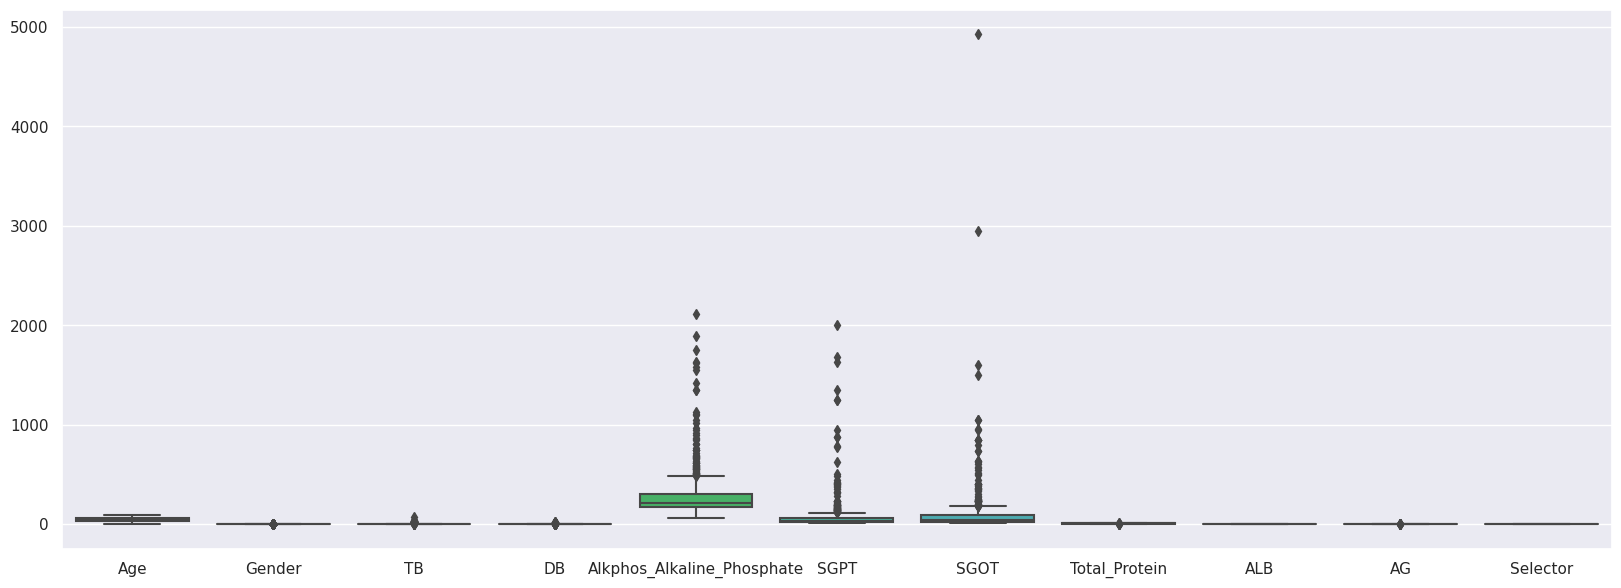

In [368]:
plt.figure(figsize=(20, 7))
sns.boxplot(data=df1)

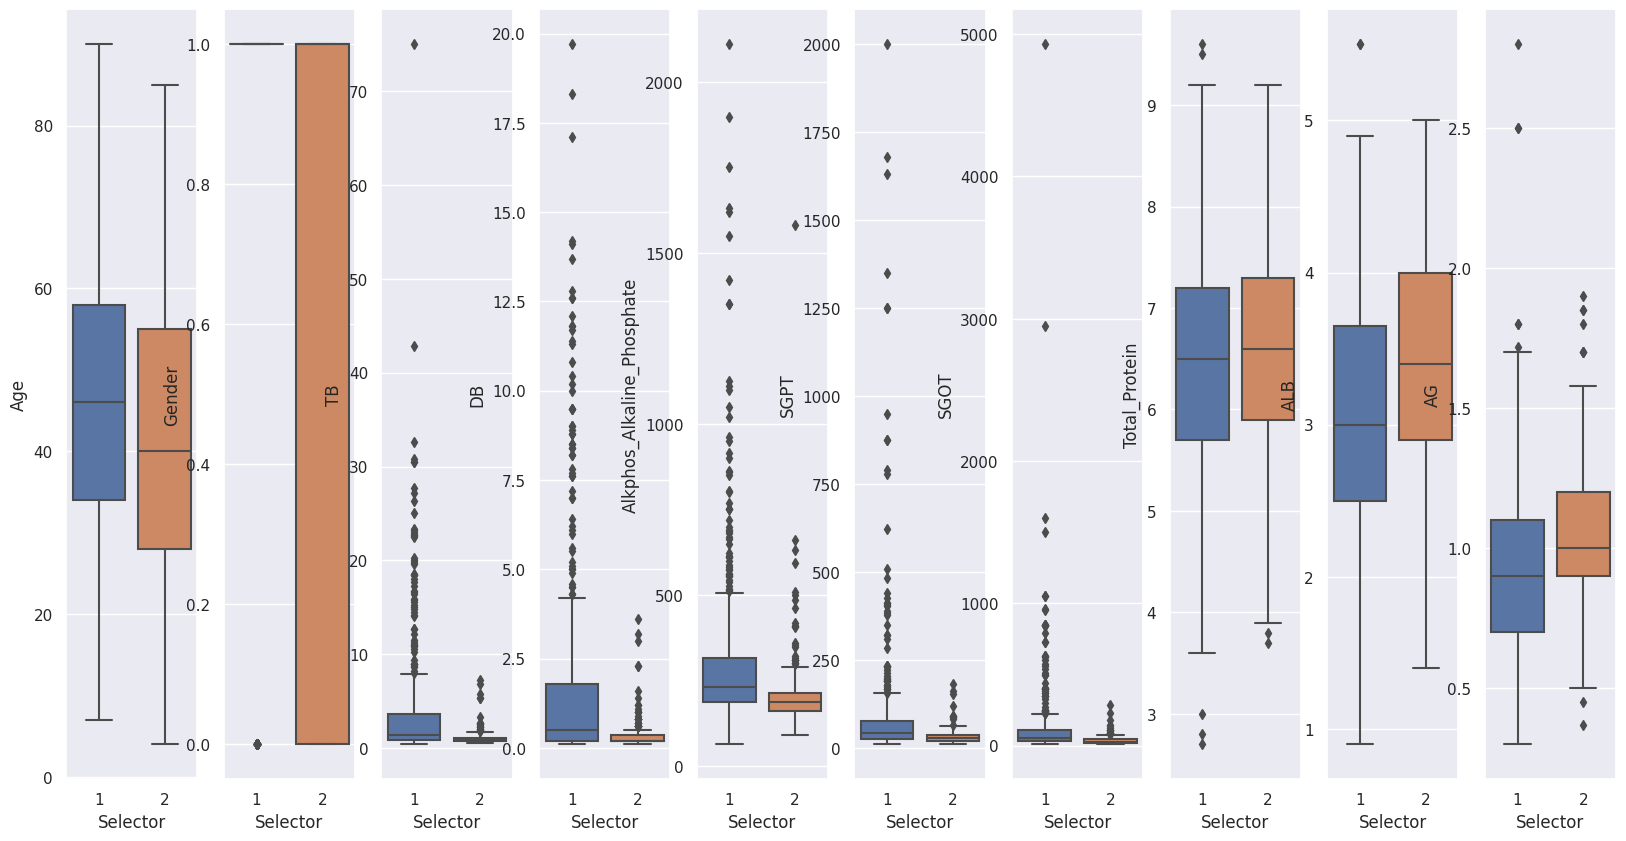

In [369]:
names = df1[
    ['Age','Gender','TB','DB','Alkphos_Alkaline_Phosphate', 'SGPT','SGOT','Total_Protein','ALB','AG','Selector']
].columns.drop("Selector")
ncols = len(names)
fig, axes = plt.subplots(1, ncols)
for name, ax in zip(names, axes.flatten()):
    sns.boxplot(
        y=name,
        x="Selector",
        data=df1[
            ['Age','Gender','TB','DB','Alkphos_Alkaline_Phosphate', 'SGPT','SGOT','Total_Protein','ALB','AG','Selector'
            ]
        ],
        orient="v",
        ax=ax,
    )
plt.rcParams["figure.figsize"] = (12, 16)

**What kind of data exploration did you do?**

Preliminary findings from the EDA.

Datatype Check - All the features in the dataset are Integers/ Float except for Gender.

Conversion of categorical values to Numerical value: Changed the Gender Column from Male/Female to 1/0 respectively.


Missing Data Check - Our Dataset Didn't had any missing values in any of the features.

Distribution of training data - I checked the probability distribution of each and every feature in the training dataset

Correlation Check - I performed a correlation check on the dataset using heatmap and pirplot, the findings from it was that few variables were correlated for example db and tb were highly correlated i.e  **0.87**, sgpt and sgot also have a correlation of **0.79**. Total protein and ALB are also correlated with **0.76**.AG and ALB are also correlated with **0.69.**

Barplot - Performed Barplot analysis to findout how a variable impacts the target variable

The above graphs are a cohesive representation of how quality of wine is changing w.r.t. all the significant variables.



**Data Cleaning**

This dataset was relatively cleaner with no missing values. But handing missing values is one of the most important tasks in any Data Science project.


**Which independent variables are useful to predict a target (dependent variable)?** (Use at least three methods)

**Method 1**

In [370]:
from scipy import stats
z = np.abs(stats.zscore(df1['Selector']))
print(z.min())
print(z.mean())
print(np.where(z>3))
df1.drop(index=np.where(z>3)[0], inplace=True)

0.6343576582293439
0.9046681380246654
(array([], dtype=int64),)


**Feature Selection**

We found the correlation between the predictor variables using the correlation matrix now we will do it with other method

**Method 2**

In [371]:
import statsmodels.api as sm
model = sm.OLS(df1['Selector'], df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Selector   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.552e+29
Date:                Mon, 10 Apr 2023   Prob (F-statistic):                        0.00
Time:                        03:58:35   Log-Likelihood:                          17404.
No. Observations:                 582   AIC:                                 -3.479e+04
Df Residuals:                     571   BIC:                                 -3.474e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Age                        -1.245e-16   6.15e-17     -2.022      0.044   -2.45e-16   -3.58e-18
Gender                      1.993e-15   2.43e-15      0.820      0.413   -2.78e-15    6.77e-15
TB                         -6.095e-17   3.48e-16     -0.175      0.861   -7.43e-16    6.22e-16
DB                         -3.302e-16   7.91e-16     -0.417      0.677   -1.88e-15    1.22e-15
Alkphos_Alkaline_Phosphate -4.731e-17   4.49e-18    -10.542      0.000   -5.61e-17   -3.85e-17
SGPT                        8.973e-17   9.52e-18      9.430      0.000     7.1e-17    1.08e-16
SGOT                       -6.565e-17   6.03e-18    -10.880      0.000   -7.75e-17   -5.38e-17
Total_Protein               1.121e-15   1.67e-15      0.672      0.502   -2.16e-15     4.4e-15
ALB                         -2.12e-15   3.74e-15     -0.566      0.571   -9.47e-15    5.23e-15
AG                         -8.058e-16   5.44e-15     -0.148      0.882   -1.15e-14    9.88e-15
Selector                       1.0000   2.26e-15   4.43e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                      717.486   Durbin-Watson:                   0.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           149208.637
Skew:                           5.713   Prob(JB):                         0.00
Kurtosis:                      80.604   Cond. No.                     2.67e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



Method 3:

We can also use model feature importance to get a better idea of the values that can be used to predict better variables. For this we will use SHAP and get variable importance. For this we need to build a model and we will be using logistic regression for this.

In [372]:
from sklearn.model_selection import train_test_split

x = df1[['Age','Gender','TB','DB','Alkphos_Alkaline_Phosphate', 'SGPT','SGOT','Total_Protein','ALB','AG','Selector']]
y = df1[['Selector']]

print(x.head())

   Age  Gender    TB   DB  Alkphos_Alkaline_Phosphate  SGPT  SGOT  \
0   62       1  10.9  5.5                         699    64   100   
1   62       1   7.3  4.1                         490    60    68   
2   58       1   1.0  0.4                         182    14    20   
3   72       1   3.9  2.0                         195    27    59   
4   46       1   1.8  0.7                         208    19    14   

   Total_Protein  ALB    AG  Selector  
0            7.5  3.2  0.74         1  
1            7.0  3.3  0.89         1  
2            6.8  3.4  1.00         1  
3            7.3  2.4  0.40         1  
4            7.6  4.4  1.30         1  


In [373]:
X_t, X_test, y_t, y_test = train_test_split(x, y, test_size=0.1, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)


**Do the training and test sets have the same data?**

In [374]:
check_df = pd.merge(
    X_t,
    X_test,
    on=['Age','Gender', 'TB','DB','Alkphos_Alkaline_Phosphate', 'SGPT','SGOT','Total_Protein','ALB','AG','Selector'],
    how="left",
    indicator="Exist",
)
check_df["Exist"] = np.where(check_df.Exist == "both", True, False)
print(
    check_df["Exist"].value_counts()
) 

False    520
True       3
Name: Exist, dtype: int64


From the above statement we can see that the train and test sets are different.

[[-1.55969741e-02 -3.44611908e-02  3.85344371e-01 -1.00585634e+00
  -3.41426483e-04 -4.20531860e-03 -2.21531633e-03 -3.85892969e-01
   3.81485274e-01 -4.24734790e-01  6.28037318e+00]]


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


                   ColumnNames  Coefficients
0                          Age     -0.015597
1                       Gender     -0.034461
2                           TB      0.385344
3                           DB     -1.005856
4   Alkphos_Alkaline_Phosphate     -0.000341
5                         SGPT     -0.004205
6                         SGOT     -0.002215
7                Total_Protein     -0.385893
8                          ALB      0.381485
9                           AG     -0.424735
10                    Selector      6.280373


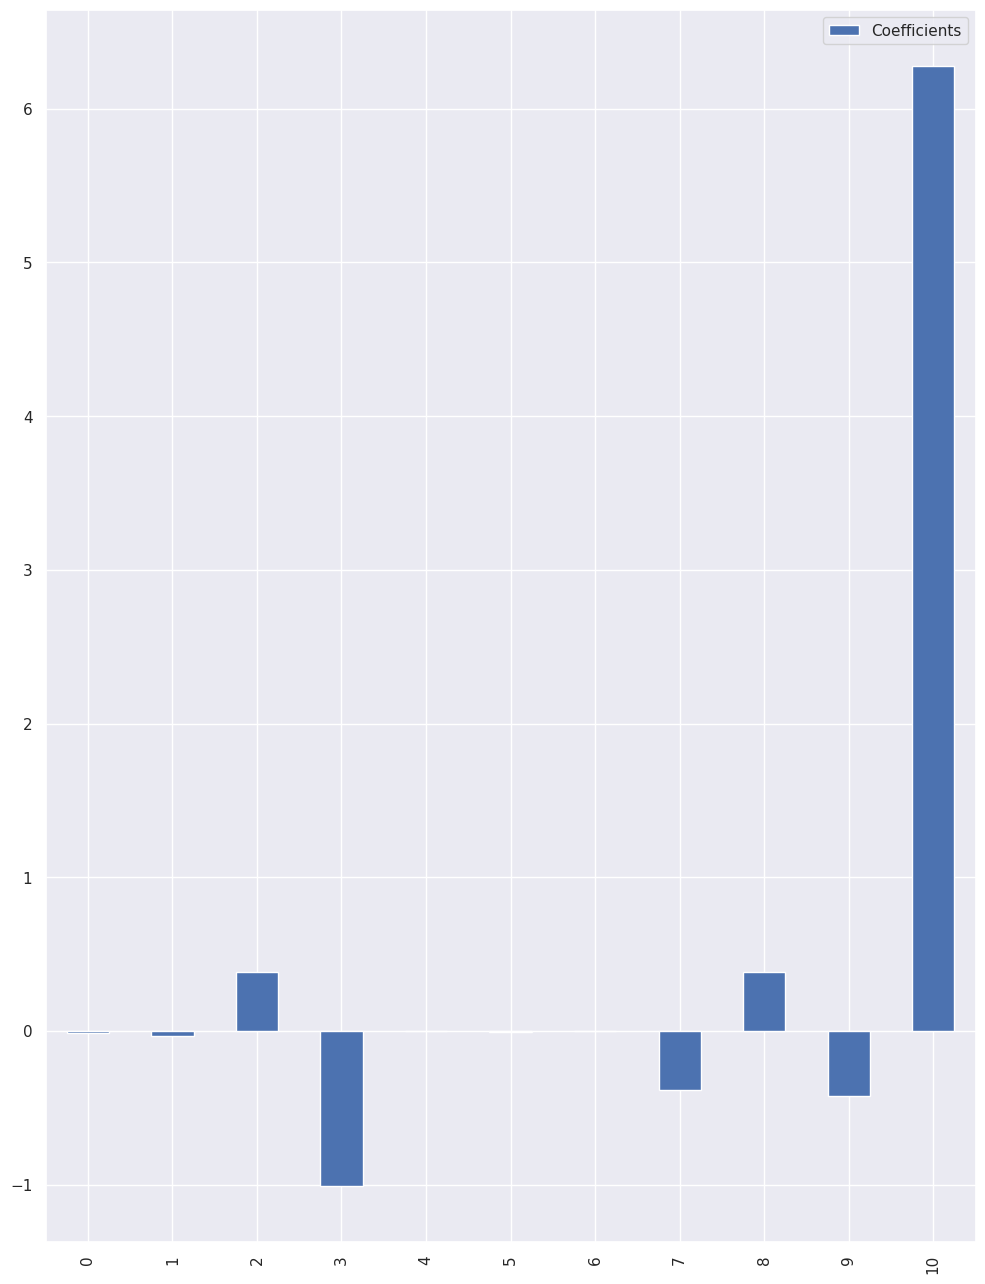

In [375]:

from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import datasets, linear_model

scaler = preprocessing.StandardScaler().fit(x_train)
lregr = LogisticRegression(solver='lbfgs', max_iter=300)
lregr.fit(x_train, y_train.values.ravel())

print(lregr.coef_)
pad = pd.DataFrame()
pad['ColumnNames'] = x_train.columns.values
pad['Coefficients'] = lregr.coef_[0]
pad.plot.bar()
print(pad)

## **Remove outliers and keep outliers (does if have an effect of the final predictive model)?**


For this we create two versions of train, test and validation set. One with 
outliers, one without outliers.

Using Logistic regression to predict attrition with outliers:

In [376]:
y_predict = lregr.predict(x_train)
print('Mean squared error is: {}'.format(mean_squared_error(y_train, y_predict)))
print('Coefficient of determination: %.2f'% r2_score(y_train, y_predict))
r2 = r2_score(y_train,y_predict)
print('R^2 score on tarining set =',r2)

Mean squared error is: 0.0
Coefficient of determination: 1.00
R^2 score on tarining set = 1.0


In [377]:
y_pred = lregr.predict(X_test)
print('Mean squared error is: {}'.format(mean_squared_error(y_test,y_pred)))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on tarining set =',r2)

Mean squared error is: 0.01694915254237288
Coefficient of determination: 0.91
R^2 score on tarining set = 0.9142441860465116


In [378]:
y_pred = lregr.predict(x_val)
print('Mean squared error is: {}'.format(mean_squared_error(y_val,y_pred)))
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2 = r2_score(y_val,y_pred)
print('R^2 score on tarining set =',r2)

Mean squared error is: 0.0
Coefficient of determination: 1.00
R^2 score on tarining set = 1.0


## **Using Logistic regression to predict attrition with outliers**

# **Now we remove the outliers from the dataset and repeat the logistic regression.**

In [379]:
def removeOutliers(df):
  data = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
  return data

# Removing outliers from the datasets for training and testing
data_main_NoOutliers = removeOutliers(df1)
x = data_main_NoOutliers[['Age','Gender', 'TB','DB','Alkphos_Alkaline_Phosphate', 'SGPT','SGOT','Total_Protein','ALB','AG','Selector']]
y = data_main_NoOutliers[['Selector']]
X_t, X_test, y_t, y_test = train_test_split(x, y, test_size=0.1, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)
scaler = preprocessing.StandardScaler().fit(x_train)
lregr = LogisticRegression(solver='liblinear')
lregr.fit(x_train, y_train.values.ravel())

LogisticRegression(solver='liblinear')

In [380]:
y_predict = lregr.predict(x_train)
print('Mean squared error is: {}'.format(mean_squared_error(y_train, y_predict)))
print('Coefficient of determination: %.2f'% r2_score(y_train, y_predict))
r2 = r2_score(y_train,y_predict)
print('R^2 score on tarining set =',r2)

Mean squared error is: 0.0024509803921568627
Coefficient of determination: 0.99
R^2 score on tarining set = 0.9886160714285714


In [381]:
y_pred = lregr.predict(X_test)
print('Mean squared error is: {}'.format(mean_squared_error(y_test,y_pred)))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on tarining set =',r2)

Mean squared error is: 0.0
Coefficient of determination: 1.00
R^2 score on tarining set = 1.0


In [382]:
y_pred = lregr.predict(x_val)
print('Mean squared error is: {}'.format(mean_squared_error(y_val,y_pred)))
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2 = r2_score(y_val,y_pred)
print('R^2 score on tarining set =',r2)

Mean squared error is: 0.0
Coefficient of determination: 1.00
R^2 score on tarining set = 1.0


**As we can from all the information provided and from the correlation matrix dropping db or tb and dropping sgpt or sgot would not make a difference as they are majorly correlated**


## Imputing the data for 1%, 5% and 10%
# Now we want to impute data for the column 'Selector'.

In [383]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
dataImpute = df1.copy(deep=True)
def removeRandomData(dataset, percent, col):
    dataset.loc[dataset.sample(frac = percent).index, col] = np.nan
#removeRandomData(data_mainImpute, 0.05, 'TotalWorkingYears')
#Imputation of 10% of the data
dataImpute['Selector_10'] = dataImpute['Selector']
dataImpute['Selector_05'] = dataImpute['Selector']
dataImpute['Selector_01'] = dataImpute['Selector']

removeRandomData(dataImpute, 0.10, 'Selector_10')
removeRandomData(dataImpute, 0.05, 'Selector_05')
removeRandomData(dataImpute, 0.01, 'Selector_01')
print(dataImpute.isnull().sum())

Age                            0
Gender                         0
TB                             0
DB                             0
Alkphos_Alkaline_Phosphate     0
SGPT                           0
SGOT                           0
Total_Protein                  0
ALB                            0
AG                             0
Selector                       0
Selector_10                   58
Selector_05                   29
Selector_01                    6
dtype: int64


**Making dataframes for different percent removed data**

In [384]:
df_number1 = dataImpute
df_number5 = dataImpute
df_number10 = dataImpute
df_orignal = dataImpute['Selector']

In [385]:
### Specifying the imputer. ###
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

### FOR the 1 % imputed values using Mean method ###
mean_imputer = mean_imputer.fit(df_number1)
results = mean_imputer.transform(df_number1.values)
imputed_number_df = pd.DataFrame(mean_imputer.transform(results), columns = df_number1.columns)
print(imputed_number_df.isnull().sum())
results.round()
imputed_number_df['Selector'] = df_orignal
imputed_number_df['orignalVimputed_01'] = imputed_number_df['Selector'].sub(imputed_number_df['Selector_01'], axis = 0)
percent_change_1 = (imputed_number_df['orignalVimputed_01'].sum() / imputed_number_df['orignalVimputed_01'].count())*100

mean_imputer = mean_imputer.fit(df_number5)
results = mean_imputer.transform(df_number5.values)
imputed_number_df = pd.DataFrame(mean_imputer.transform(results), columns = df_number5.columns)
results.round()
imputed_number_df['Selector'] = df_orignal
imputed_number_df['orignalVimputed_05'] = imputed_number_df['Selector'].sub(imputed_number_df['Selector_05'], axis = 0)
percent_change_5 = (imputed_number_df['orignalVimputed_05'].sum() / imputed_number_df['orignalVimputed_05'].count())*100

mean_imputer = mean_imputer.fit(df_number10)
results = mean_imputer.transform(df_number10.values)
imputed_number_df = pd.DataFrame(mean_imputer.transform(results), columns = df_number10.columns)
results.round()
imputed_number_df['Selector'] = df_orignal
imputed_number_df['orignalVimputed_10'] = imputed_number_df['Selector'].sub(imputed_number_df['Selector_10'], axis = 0)
percent_change_10 = (imputed_number_df['orignalVimputed_10'].sum() / imputed_number_df['orignalVimputed_10'].count())*100


print("The perecent change of the orignal vs imputed value for 1% missing data is: {}".format(percent_change_1))
print("The perecent change of the orignal vs imputed value for 5% missing data is: {}".format(percent_change_5))
print("The perecent change of the orignal vs imputed value for 10% missing data is: {}".format(percent_change_10))

Age                           0
Gender                        0
TB                            0
DB                            0
Alkphos_Alkaline_Phosphate    0
SGPT                          0
SGOT                          0
Total_Protein                 0
ALB                           0
AG                            0
Selector                      0
Selector_10                   0
Selector_05                   0
Selector_01                   0
dtype: int64
The perecent change of the orignal vs imputed value for 1% missing data is: 0.048324742268041315
The perecent change of the orignal vs imputed value for 5% missing data is: 0.4843931569756964
The perecent change of the orignal vs imputed value for 10% missing data is: -1.0768342908108388


X does not have valid feature names, but SimpleImputer was fitted with feature names
X does not have valid feature names, but SimpleImputer was fitted with feature names
X does not have valid feature names, but SimpleImputer was fitted with feature names
X does not have valid feature names, but SimpleImputer was fitted with feature names
X does not have valid feature names, but SimpleImputer was fitted with feature names
X does not have valid feature names, but SimpleImputer was fitted with feature names


**Using KNN**

In [386]:
from sklearn.metrics import accuracy_score
imputer = KNNImputer(n_neighbors=7)
### For the 1% imputation ###
imputer.fit_transform(df_number1)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_number1), columns = df_number1.columns)
print(imputed_number_df.isnull().sum())
imputed_number_df['Selector'] = df_orignal
imputed_number_df['orignalVimputed_01'] = df1['Selector'].sub(imputed_number_df['Selector_01'], axis = 0)
percent_change_1 = (imputed_number_df['orignalVimputed_01'].sum() / imputed_number_df['orignalVimputed_01'].count())*100
print("The perecent change of the orignal vs imputed value of 1% values is: {}".format(percent_change_1))

### For the 5% imputation ###
imputer.fit_transform(df_number5)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_number5), columns = df_number5.columns)
imputed_number_df['Selector'] = df_orignal
imputed_number_df['orignalVimputed_05'] = df1['Selector'].sub(imputed_number_df['Selector_05'], axis = 0)
percent_change_5 = (imputed_number_df['orignalVimputed_05'].sum() / imputed_number_df['orignalVimputed_05'].count())*100
print("The perecent change of the orignal vs imputed value of 5% values is: {}".format(percent_change_5))

### For the 10% imputation ###
imputer.fit_transform(df_number10)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_number10), columns = df_number10.columns)
imputed_number_df['Selector'] = df_orignal
imputed_number_df['orignalVimputed_10'] = df1['Selector'].sub(imputed_number_df['Selector_10'], axis = 0)
percent_change_10 = (imputed_number_df['orignalVimputed_10'].sum() / imputed_number_df['orignalVimputed_10'].count())*100
print("The perecent change of the orignal vs imputed value of 10% values is: {}".format(percent_change_10))

#dataFrame_knn_imputation = imputed_number_df[['orignalVimputed_01', 'orignalVimputed_05', 'orignalVimputed_10']]

Age                           0
Gender                        0
TB                            0
DB                            0
Alkphos_Alkaline_Phosphate    0
SGPT                          0
SGOT                          0
Total_Protein                 0
ALB                           0
AG                            0
Selector                      0
Selector_10                   0
Selector_05                   0
Selector_01                   0
dtype: int64
The perecent change of the orignal vs imputed value of 1% values is: -0.049091801669121235
The perecent change of the orignal vs imputed value of 5% values is: 0.4172803141875306
The perecent change of the orignal vs imputed value of 10% values is: -1.1782032400589102


### **Modeling, and Interpretability**

In [387]:
# Importing all libraries necessary for the assignment
!pip install shap
!pip install lime
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

import pandas as pd
import numpy as np
import shap
import lime
from lime import lime_tabular
import sklearn
from sklearn.model_selection import train_test_split
import random
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (16, 12)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [388]:
#importing libraries
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [389]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222
     

In [390]:
# Setting up memory
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

1


In [391]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    ) 
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:21055..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpuuni_cxb
  JVM stdout: /tmp/tmpuuni_cxb/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpuuni_cxb/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:21055
Connecting to H2O server at http://127.0.0.1:21055 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         06 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.3
H2O_cluster_version_age:    5 days
H2O_cluster_name:           H2O_from_python_unknownUser_egrzrw
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:21055
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  -----------------------------------------------------------------------------------------

In [392]:
df1

Age  Gender    TB   DB  Alkphos_Alkaline_Phosphate  SGPT  SGOT  \
0     62       1  10.9  5.5                         699    64   100   
1     62       1   7.3  4.1                         490    60    68   
2     58       1   1.0  0.4                         182    14    20   
3     72       1   3.9  2.0                         195    27    59   
4     46       1   1.8  0.7                         208    19    14   
..   ...     ...   ...  ...                         ...   ...   ...   
577   60       1   0.5  0.1                         500    20    34   
578   40       1   0.6  0.1                          98    35    31   
579   52       1   0.8  0.2                         245    48    49   
580   31       1   1.3  0.5                         184    29    32   
581   38       1   1.0  0.3                         216    21    24   

     Total_Protein  ALB    AG  Selector  
0              7.5  3.2  0.74         1  
1              7.0  3.3  0.89         1  
2              6.8  3.4  1.00         1  
3              7.3  2.4  0.40         1  
4              7.6  4.4  1.30         1  
..             ...  ...   ...       ...  
577            5.9  1.6  0.37         2  
578            6.0  3.2  1.10         1  
579            6.4  3.2  1.00         1  
580            6.8  3.4  1.00         1  
581            7.3  4.4  1.50         2  

[582 rows x 11 columns]

In [393]:
X = df1.drop(['Selector'], axis=1)  # Training Feature
Y = df1['Selector']  # Target

In [394]:
(
    x_train,
    x_test,
    y_train,
    y_test,
) = train_test_split(  # Splitting Data into Training and Test
    X, Y, test_size=0.1, random_state=42
)
x_train_100 = shap.utils.sample(
    x_train, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process
x_test_100 = shap.utils.sample(
    x_test, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process

# **Fitting a Linear Model**

In [395]:
linear_model = sklearn.linear_model.LinearRegression()  # Initializing a Linear Model
linear_model.fit(x_train, y_train)  # Training a linear model

LinearRegression()

In [396]:
# Scaling the data using Min-Max scaling for the purpose of evaluating Co-efficients, as non scaled data may mislead while we evaluate the co-efficients
df = df1.drop("Selector", axis=1)
df = df.apply(pd.to_numeric, errors='coerce')
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm = pd.concat((df_norm, df1.Selector), 1)

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.


The purpose of scaling the data is to avoid bias in the coefficients obtained when fitting a model. If the data is not scaled, features with higher magnitudes may dominate over features with smaller magnitudes, leading to incorrect coefficient values. By scaling the data, all features are brought to a similar scale, ensuring that each feature contributes equally to the model.

In [397]:
print(df_norm.isnull().sum())

Age                           0
Gender                        0
TB                            0
DB                            0
Alkphos_Alkaline_Phosphate    0
SGPT                          0
SGOT                          0
Total_Protein                 0
ALB                           0
AG                            0
Selector                      0
dtype: int64


In [398]:
df_norm = df_norm.reset_index(drop=True)


In [399]:
print(df_norm.shape)


(582, 11)


In [400]:
import statsmodels.formula.api as smf  # OLS model Library

results = smf.ols(
    "Selector ~ Age + Gender + TB + DB + Alkphos_Alkaline_Phosphate + SGPT + SGOT + Total_Protein + ALB + AG",
    data=df_norm,
).fit()
print(results.summary())  # OLS Linear Model Summary

                            OLS Regression Results                            
Dep. Variable:               Selector   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     7.818
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           8.22e-12
Time:                        03:59:32   Log-Likelihood:                -326.76
No. Observations:                 582   AIC:                             675.5
Df Residuals:                     571   BIC:                             723.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

# **Interpreting Regression Co-efficients**

The table shows the results of an Ordinary Least Squares (OLS) regression analysis performed on a dataset with 582 observations and 10 predictor variables. The dependent variable in the analysis is the "Selector" variable, which is binary and indicates the presence or absence of liver disease.

The regression model is statistically significant, with an F-statistic of 7.818 and a corresponding probability of 8.22e-12, indicating that at least one of the predictor variables is related to the dependent variable.

The R-squared value of 0.12 suggests that the model explains only a small proportion of the variance in the dependent variable. The adjusted R-squared value of 0.105 indicates that the inclusion of the predictor variables in the model did not greatly improve the model's ability to explain the variance in the dependent variable.

The coefficients for the predictor variables indicate their relationship with the dependent variable. The intercept coefficient of 1.5628 indicates that the average value of the dependent variable when all predictor variables are zero is 1.56. The negative coefficient for "Age" (-0.2726) suggests that as age increases, the value of the dependent variable decreases. The negative coefficient for "Alkphos_Alkaline_Phosphate" (-0.4008) suggests that as the level of this variable increases, the value of the dependent variable decreases. The negative coefficient for "SGPT" (-0.7671) suggests that as the level of this variable increases, the value of the dependent variable decreases.

On the other hand, the coefficients for "Gender", "TB", "DB", "SGOT", "Total_Protein", "ALB", and "AG" are not statistically significant at the 0.05 level, indicating that these variables are not significantly related to the dependent variable.

The results of the regression analysis are further supported by the values of the omnibus, Durbin-Watson, and Jarque-Bera tests. The omnibus test shows that the residuals are not normally distributed, with a probability of 0.000 indicating a significant departure from normality. The Durbin-Watson test value of 1.944 indicates that there is no significant autocorrelation between the residuals. The Jarque-Bera test shows that the residuals are not normally distributed, with a significant probability value of 7.42e-18.

**Model Coefficients:**


In linear regression, coefficients indicate the strength and direction of the relationship between predictors and the target variable, with positive values indicating a positive correlation and negative values indicating a negative correlation. 

The absolute values of the coefficients indicate the importance of the predictors in predicting the target variable. Predictor variables with p-values lower than 0.05 are considered significant, while the skewness and kurtosis of a variable measure the departure from the central axis and the sharpness of the central peak in its distribution, respectively. 

A skewness value of 0 and a kurtosis value of 0 indicate an optimal distribution.

 The Durbin-Watson test detects autocorrelation in the residuals of a regression analysis, with a score of 2 indicating no autocorrelation, a score between 0 and 2 indicating positive autocorrelation, and a score between 2 and 4 indicating negative autocorrelation. Our model has a Durbin-Watson score of 1.780, indicating positive autocorrelation in the residuals. The Jarque-Bera test detects normality in the distribution of a variable, with a value far from zero indicating a departure from normal distribution.
 
  Our model has a Jarque-Bera value of 28.421, suggesting a departure from normal distribution.

# **Fit Tree Based Model**

In [401]:
# Setting the max_dept to 3 for the purpose of ease of explainbility and readability
tree_model = RandomForestRegressor(max_depth=3, random_state=0, n_estimators=10)
tree_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=10, random_state=0)

In [402]:

# Get numerical feature importances
tree_importances = list(tree_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [
    (feature, round(importance, 2))
    for feature, importance in zip(x_train.columns, tree_importances)
]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

In [403]:
# Print out the feature and importances
[print("Variable: {:20} Importance: {}".format(*pair)) for pair in feature_importances];

Variable: DB                   Importance: 0.24
Variable: Alkphos_Alkaline_Phosphate Importance: 0.17
Variable: SGOT                 Importance: 0.16
Variable: TB                   Importance: 0.14
Variable: Age                  Importance: 0.13
Variable: SGPT                 Importance: 0.08
Variable: AG                   Importance: 0.03
Variable: ALB                  Importance: 0.02
Variable: Total_Protein        Importance: 0.01
Variable: Gender               Importance: 0.0


According to feature selection techniques we did before and clearly looking at the correlation matrix and the heatmap the features tb and db, sgpt and sgot, alb and ag,total protein and alb these features are highly correlated so we need to drop one of those columns each. Here we are dropping db,total protein,ag and sgot

In [404]:
df1 = df1.drop(['DB','SGOT','AG','Total_Protein'], axis = 1)

In [405]:
df1

Age  Gender    TB  Alkphos_Alkaline_Phosphate  SGPT  ALB  Selector
0     62       1  10.9                         699    64  3.2         1
1     62       1   7.3                         490    60  3.3         1
2     58       1   1.0                         182    14  3.4         1
3     72       1   3.9                         195    27  2.4         1
4     46       1   1.8                         208    19  4.4         1
..   ...     ...   ...                         ...   ...  ...       ...
577   60       1   0.5                         500    20  1.6         2
578   40       1   0.6                          98    35  3.2         1
579   52       1   0.8                         245    48  3.2         1
580   31       1   1.3                         184    29  3.4         1
581   38       1   1.0                         216    21  4.4         2

[582 rows x 7 columns]

# **Getting best model using H2O AutoML**

In [406]:
Ip_hf = h2o.H2OFrame(df1)  # Converting Pandas dataframe in H2O dataframe

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [407]:
Ip_hf

Age    Gender    TB    Alkphos_Alkaline_Phosphate    SGPT    ALB    Selector
-----  --------  ----  ----------------------------  ------  -----  ----------
   62         1  10.9                           699      64    3.2           1
   62         1   7.3                           490      60    3.3           1
   58         1   1                             182      14    3.4           1
   72         1   3.9                           195      27    2.4           1
   46         1   1.8                           208      19    4.4           1
   26         0   0.9                           154      16    3.5           1
   29         0   0.9                           202      14    3.6           1
   17         1   0.9                           202      22    4.1           2
   55         1   0.7                           290      53    3.4           1
   57         1   0.6                           210      51    2.7           1
[582 rows x 7 columns]

In [408]:
pct_rows = 0.70
df_train, df_test = Ip_hf.split_frame([pct_rows])

In [409]:
df_train.shape


(393, 7)

In [410]:
def autoML(df_train, df_test):
    X = df_train.columns
    y = "Selector"

    # Removing the result from our predictors data
    X.remove(y)
    aml = H2OAutoML(max_runtime_secs=222, seed=1)  # Setting up AutoML
    aml.train(x=X, y=y, training_frame=df_train)  # Trainig the dataset on different models

    return df_train, df_test, aml

In [411]:
def getBestModel(aml):
    model_index = 0
    glm_index = 0
    glm_model = ""
    aml_leaderboard_df = aml.leaderboard.as_data_frame()
    models_dict = {}

    for m in aml_leaderboard_df["model_id"]:
        models_dict[m] = model_index
        if "StackedEnsemble" not in m:
            break
        model_index = model_index + 1

    for m in aml_leaderboard_df["model_id"]:
        if "GLM" in m:
            models_dict[m] = glm_index
            break
        glm_index = glm_index + 1

    print(model_index)
    best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])
    return best_model

In [412]:
autoML = autoML(df_train, df_test)  # Training AutoML

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


In [413]:
autoML[2].leaderboard

model_id                                                                     rmse       mse       mae     rmsle    mean_residual_deviance
-----------------------------------------------------------------------  --------  --------  --------  --------  ------------------------
StackedEnsemble_BestOfFamily_7_AutoML_1_20230410_35941                   0.416695  0.173635  0.347643  0.169698                  0.173635
XGBoost_lr_search_selection_AutoML_1_20230410_35941_select_grid_model_1  0.417832  0.174584  0.342114  0.170633                  0.174584
GBM_grid_1_AutoML_1_20230410_35941_model_11                              0.419465  0.175951  0.356993  0.170906                  0.175951
StackedEnsemble_AllModels_4_AutoML_1_20230410_35941                      0.420583  0.17689   0.356342  0.170989                  0.17689
StackedEnsemble_BestOfFamily_5_AutoML_1_20230410_35941                   0.42069   0.17698   0.351552  0.171531                  0.17698
GBM_grid_1_AutoML_1_20230410_35941_model_10                              0.42207   0.178143  0.357214  0.171656                  0.178143
XGBoost_grid_1_AutoML_1_20230410_35941_model_21                          0.422324  0.178358  0.349431  0.172213                  0.178358
GBM_grid_1_AutoML_1_20230410_35941_model_7                               0.423211  0.179107  0.35934   0.172179                  0.179107
GBM_grid_1_AutoML_1_20230410_35941_model_9                               0.423217  0.179112  0.353613  0.172149                  0.179112
StackedEnsemble_AllModels_2_AutoML_1_20230410_35941                      0.423355  0.179229  0.354414  0.172506                  0.179229
[75 rows x 6 columns]

In [414]:
autoML_model = getBestModel(autoML[2])  # Getting Best Model
print(autoML_model)

1
Model Details
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_lr_search_selection_AutoML_1_20230410_35941_select_grid_model_1


Model Summary: 
    number_of_trees
--  -----------------
    36

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.11050065022076816
RMSE: 0.3324163807948822
MAE: 0.2707971040225818
RMSLE: 0.13530233327394772
Mean Residual Deviance: 0.11050065022076816

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 0.17458396220932987
RMSE: 0.4178324571037174
MAE: 0.3421139876351102
RMSLE: 0.17063282537980257
Mean Residual Deviance: 0.17458396220932987

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.342096  0.0112323   0.347654      0.328234      0.357594      0.341285      0.335712


In [415]:
autoML_model.predict

<bound method ModelBase.predict of H2OXGBoostEstimator({'parms': {'model_id': {'__meta': {'schema_version': 3, 'schema_name': 'ModelParameterSchemaV3', 'schema_type': 'Iced'}, 'name': 'model_id', 'label': 'model_id', 'help': 'Destination id for this model; auto-generated if not specified.', 'required': False, 'type': 'Key<Model>', 'default_value': None, 'actual_value': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'XGBoost_lr_search_selection_AutoML_1_20230410_35941_select_grid_model_1', 'type': 'Key<Model>', 'URL': '/3/Models/XGBoost_lr_search_selection_AutoML_1_20230410_35941_select_grid_model_1'}, 'input_value': None, 'level': 'critical', 'values': [], 'is_member_of_frames': [], 'is_mutually_exclusive_with': [], 'gridable': False}, 'training_frame': {'__meta': {'schema_version': 3, 'schema_name': 'ModelParameterSchemaV3', 'schema_type': 'Iced'}, 'name': 'training_frame', 'label': 'training_frame', 'help': 'Id of the training data

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

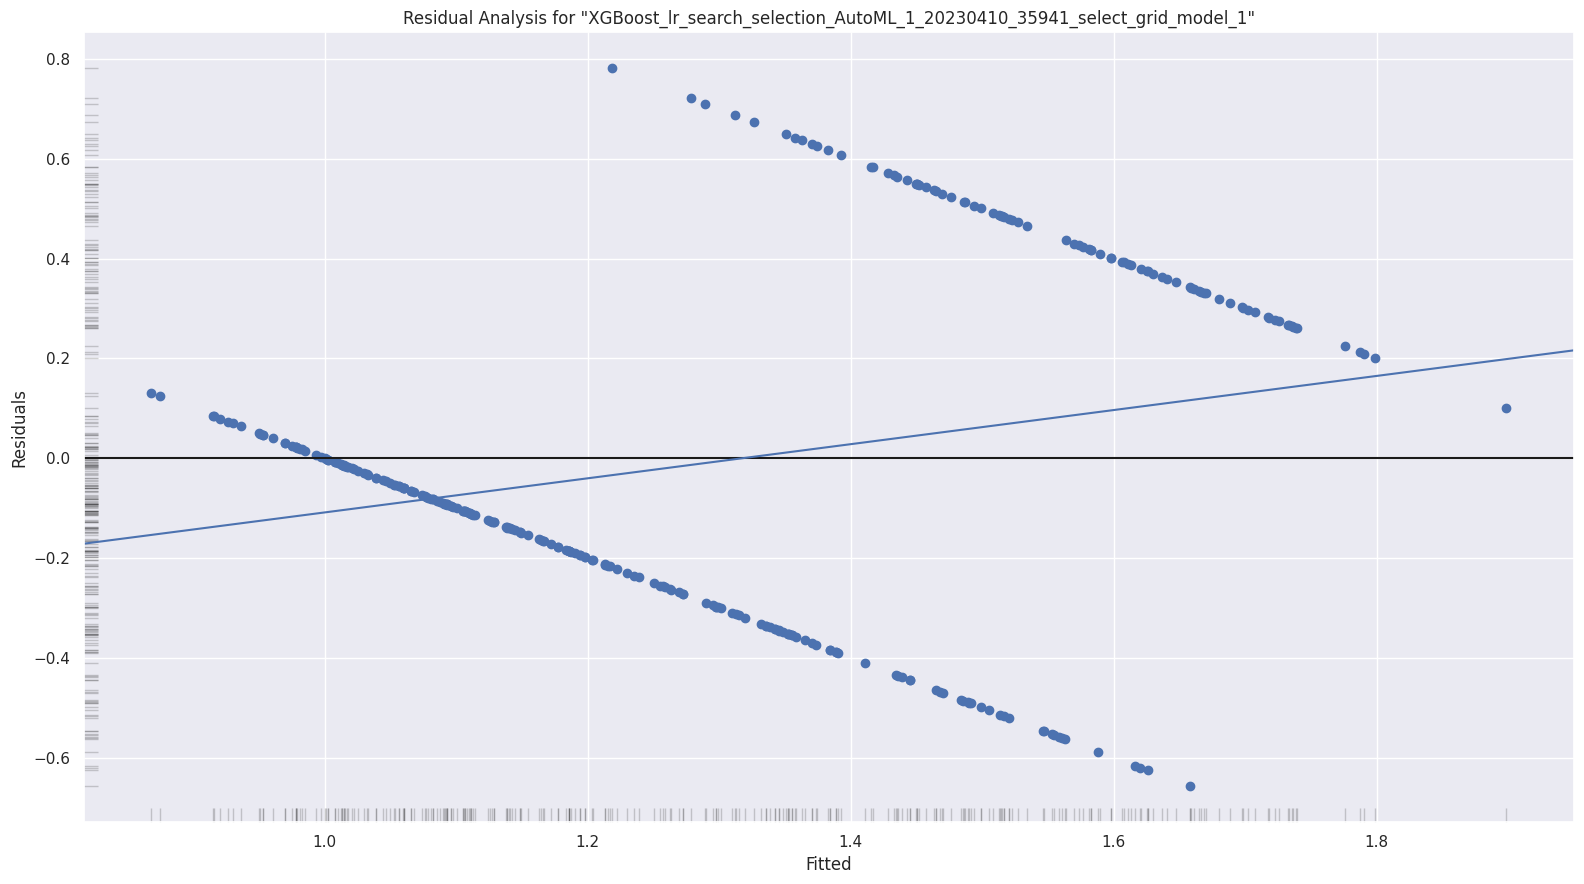

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

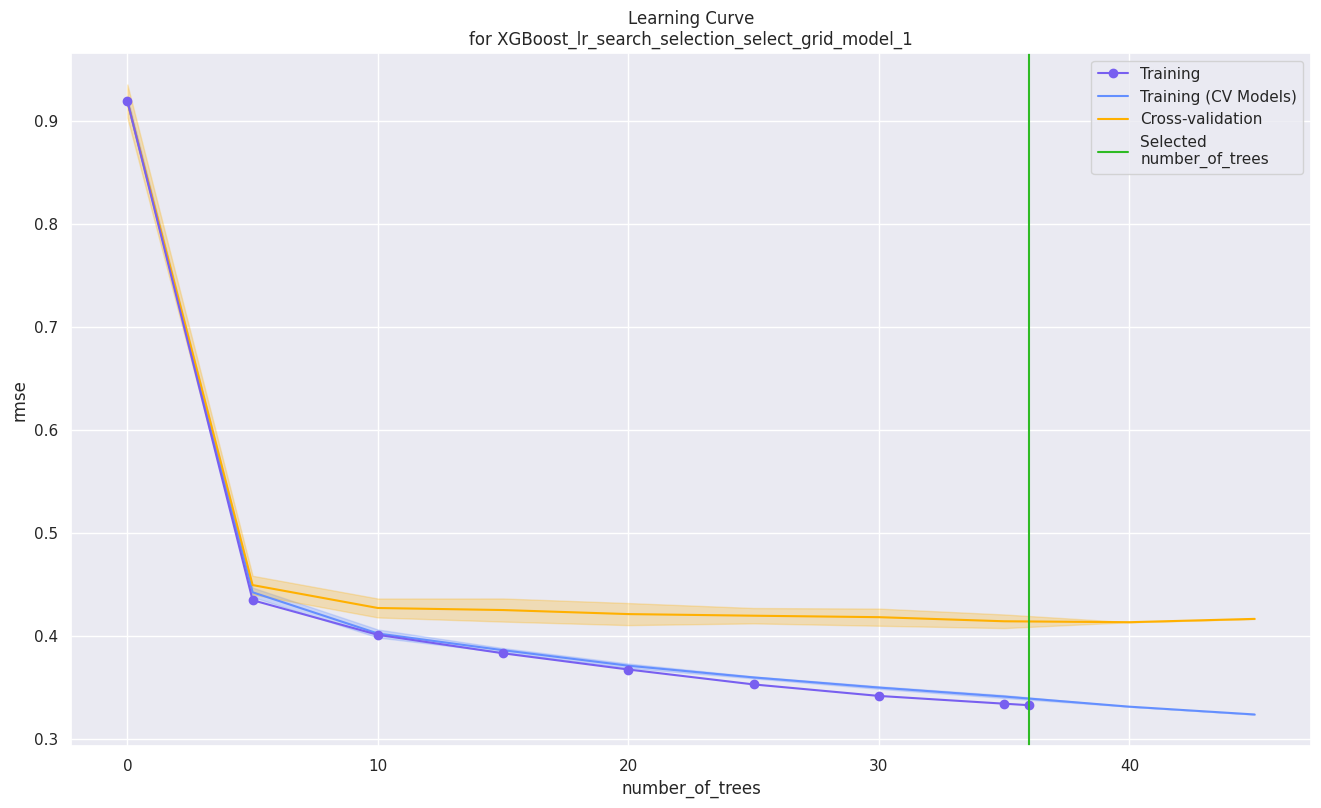

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

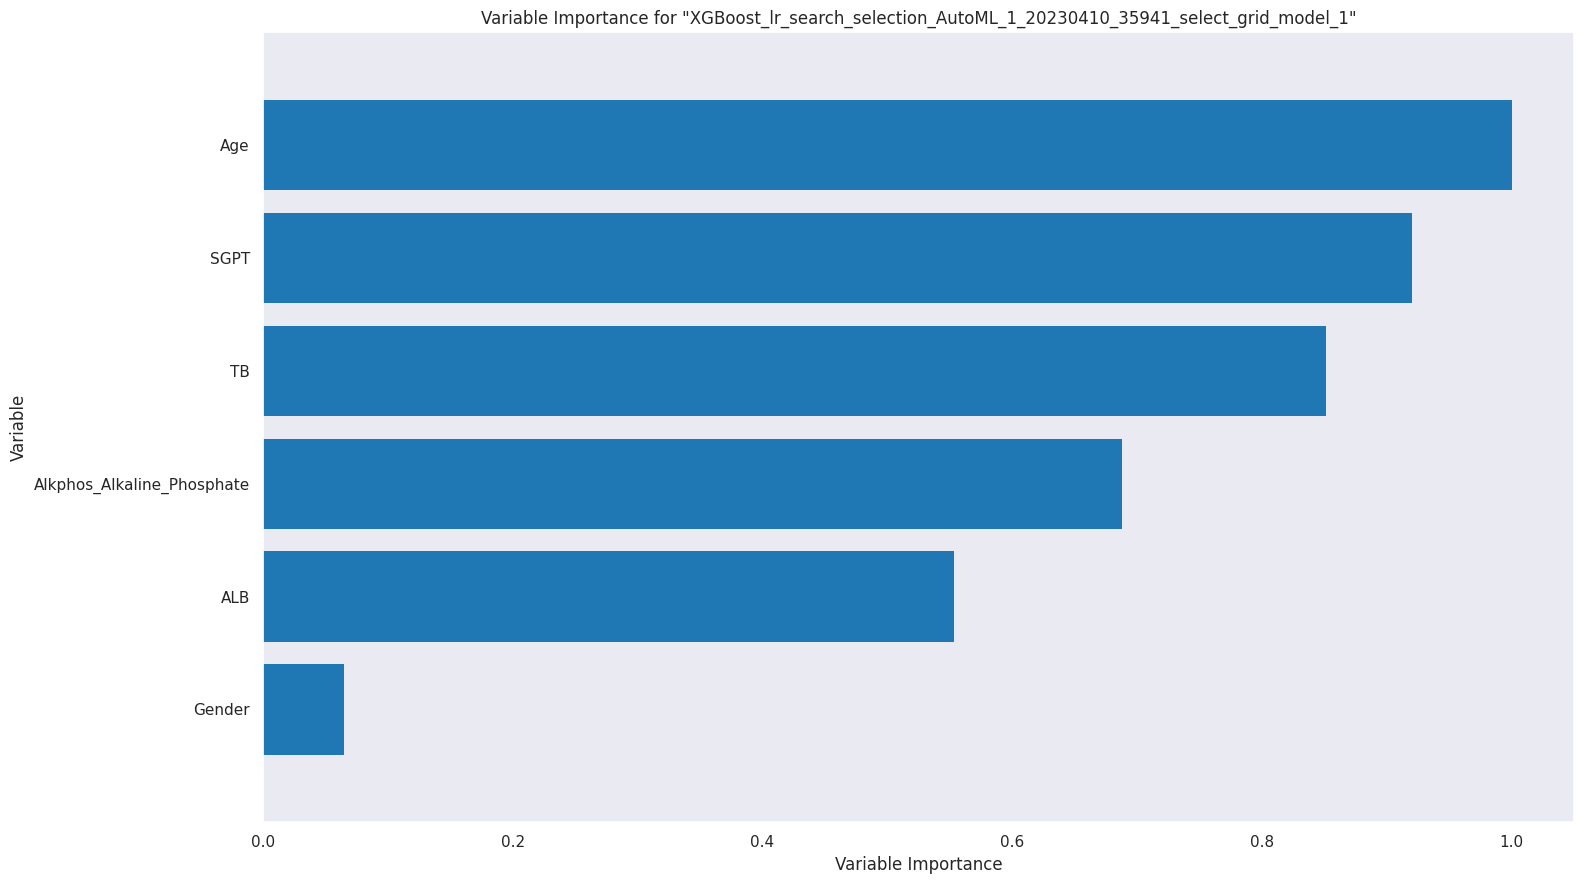

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

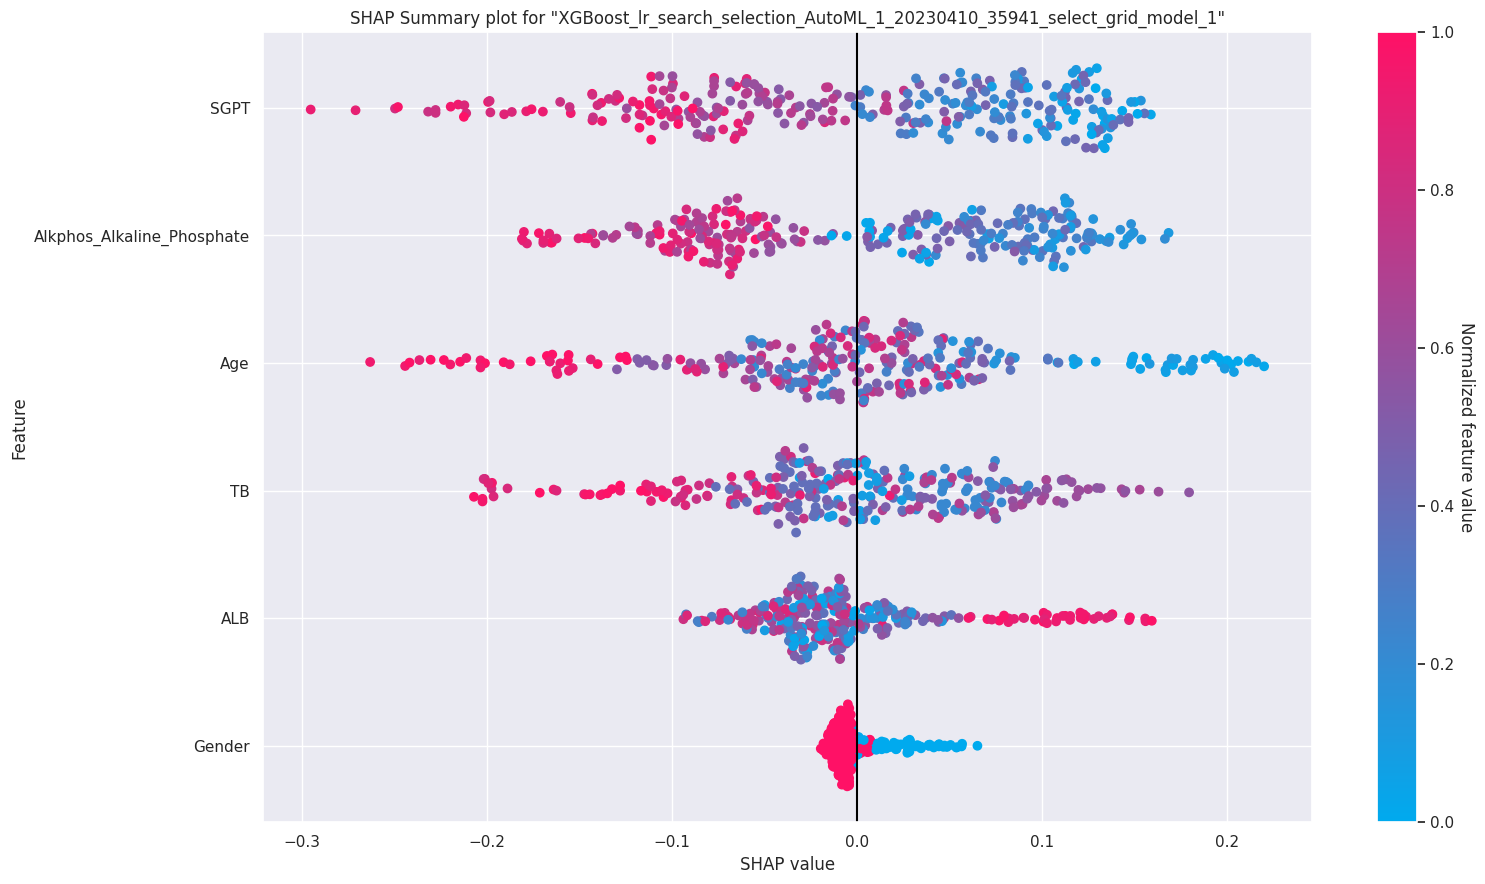

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

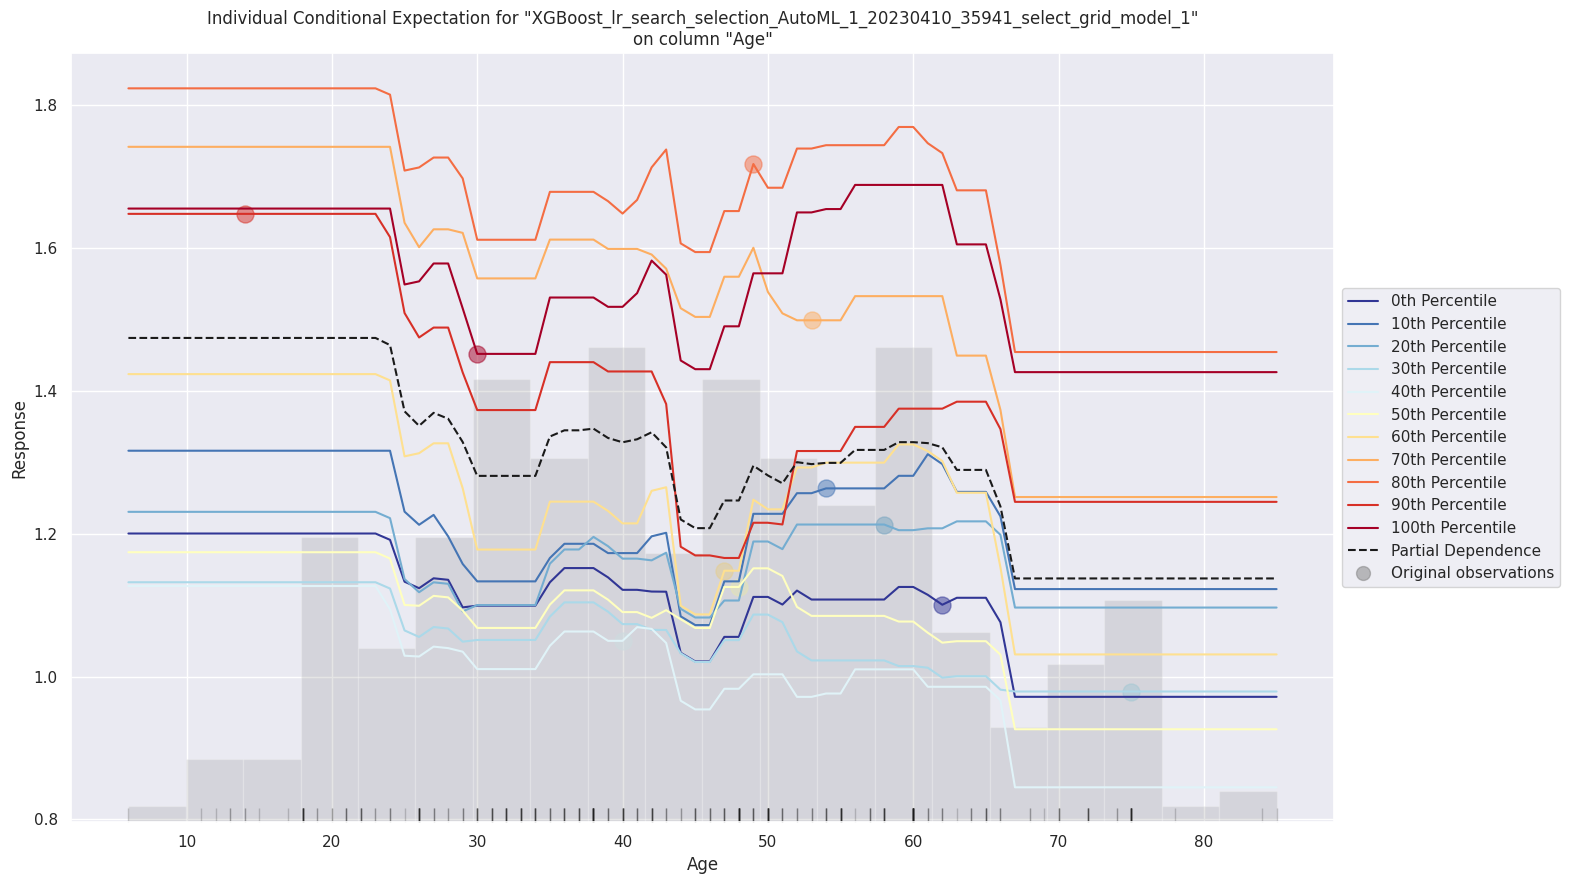

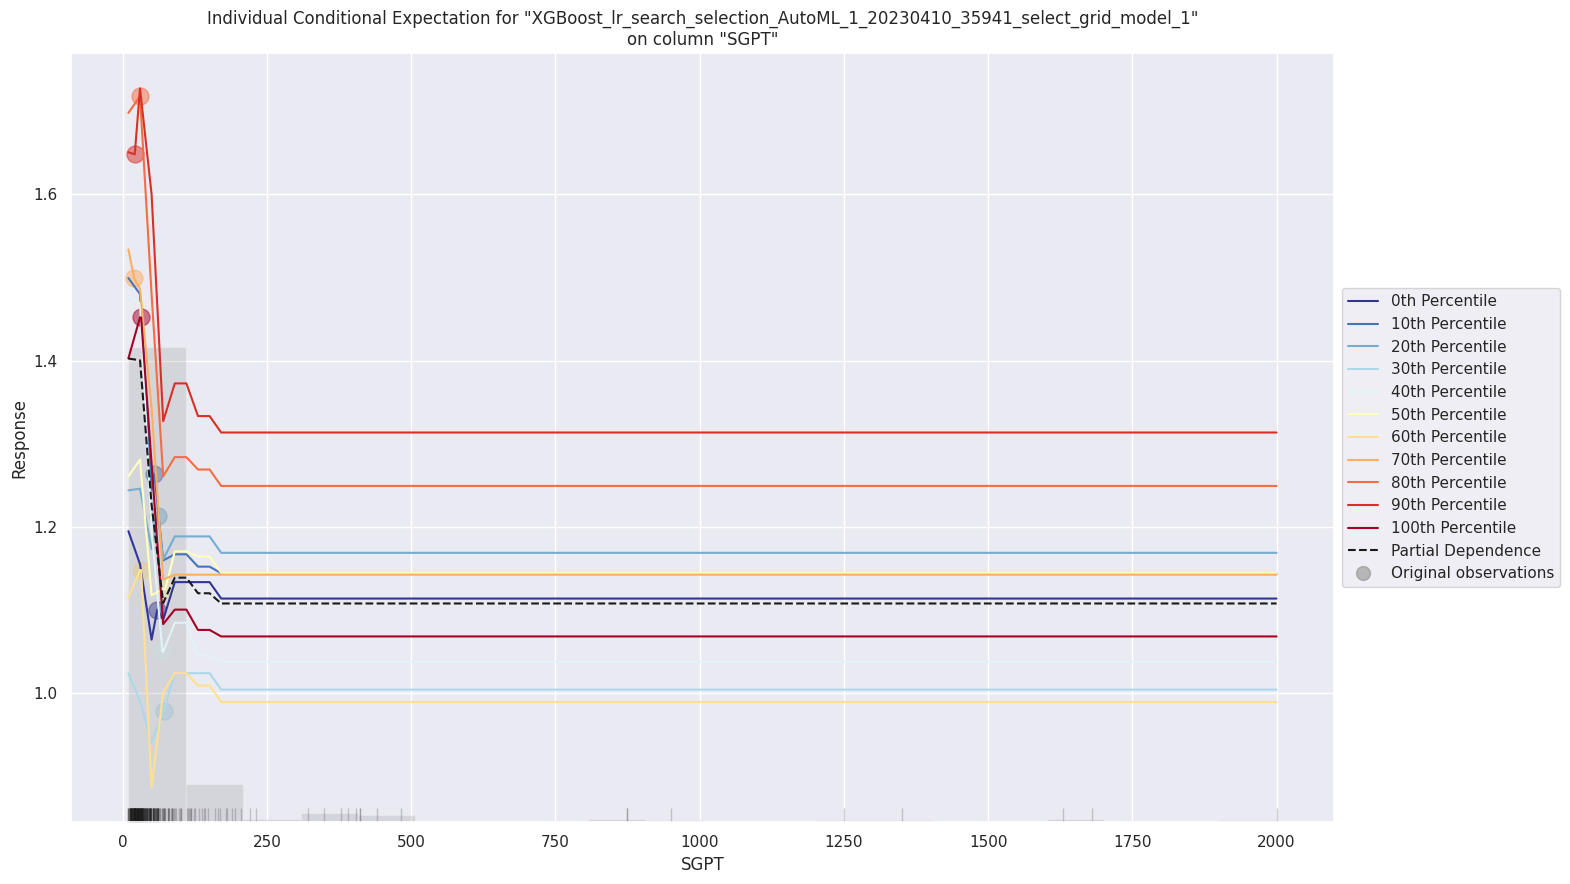

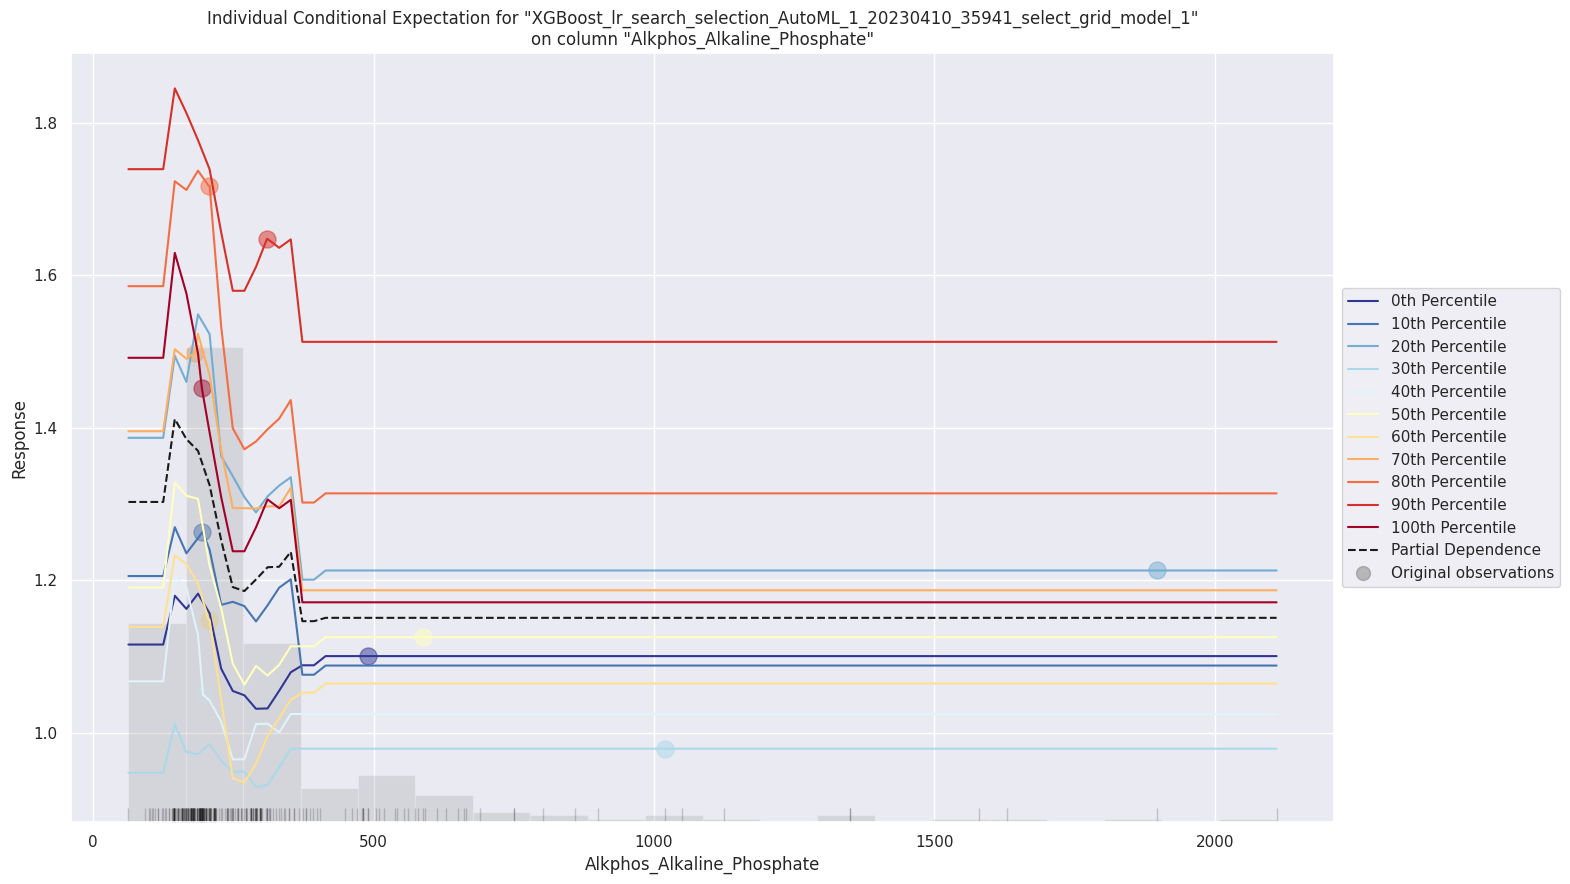

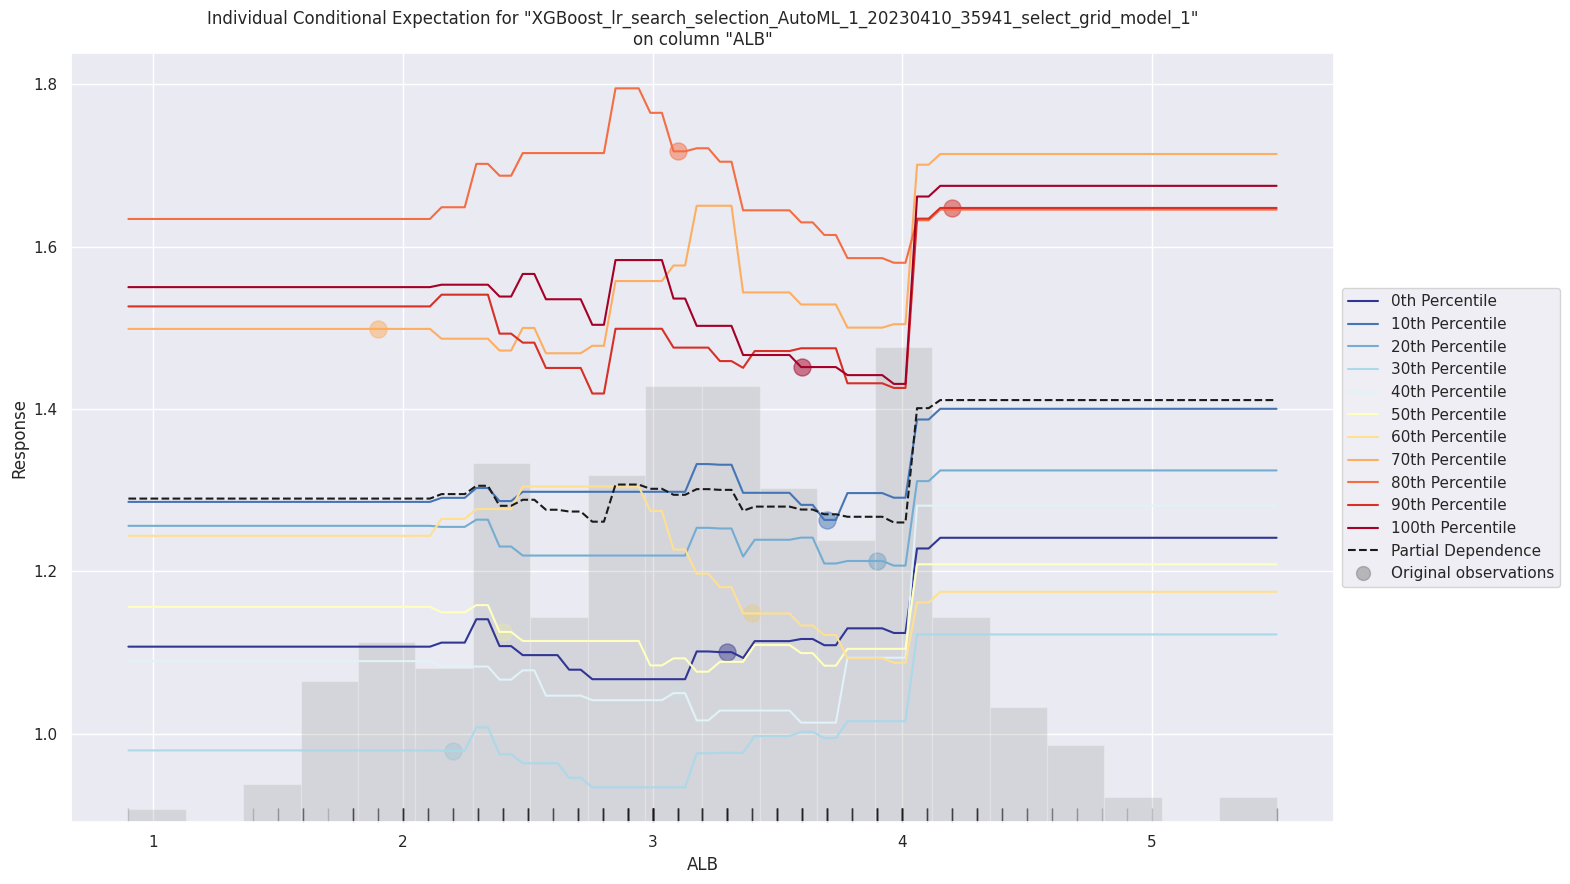

In [416]:
exa = autoML_model.explain(df_train[0:300,:], exclude_explanations=['pdp'])

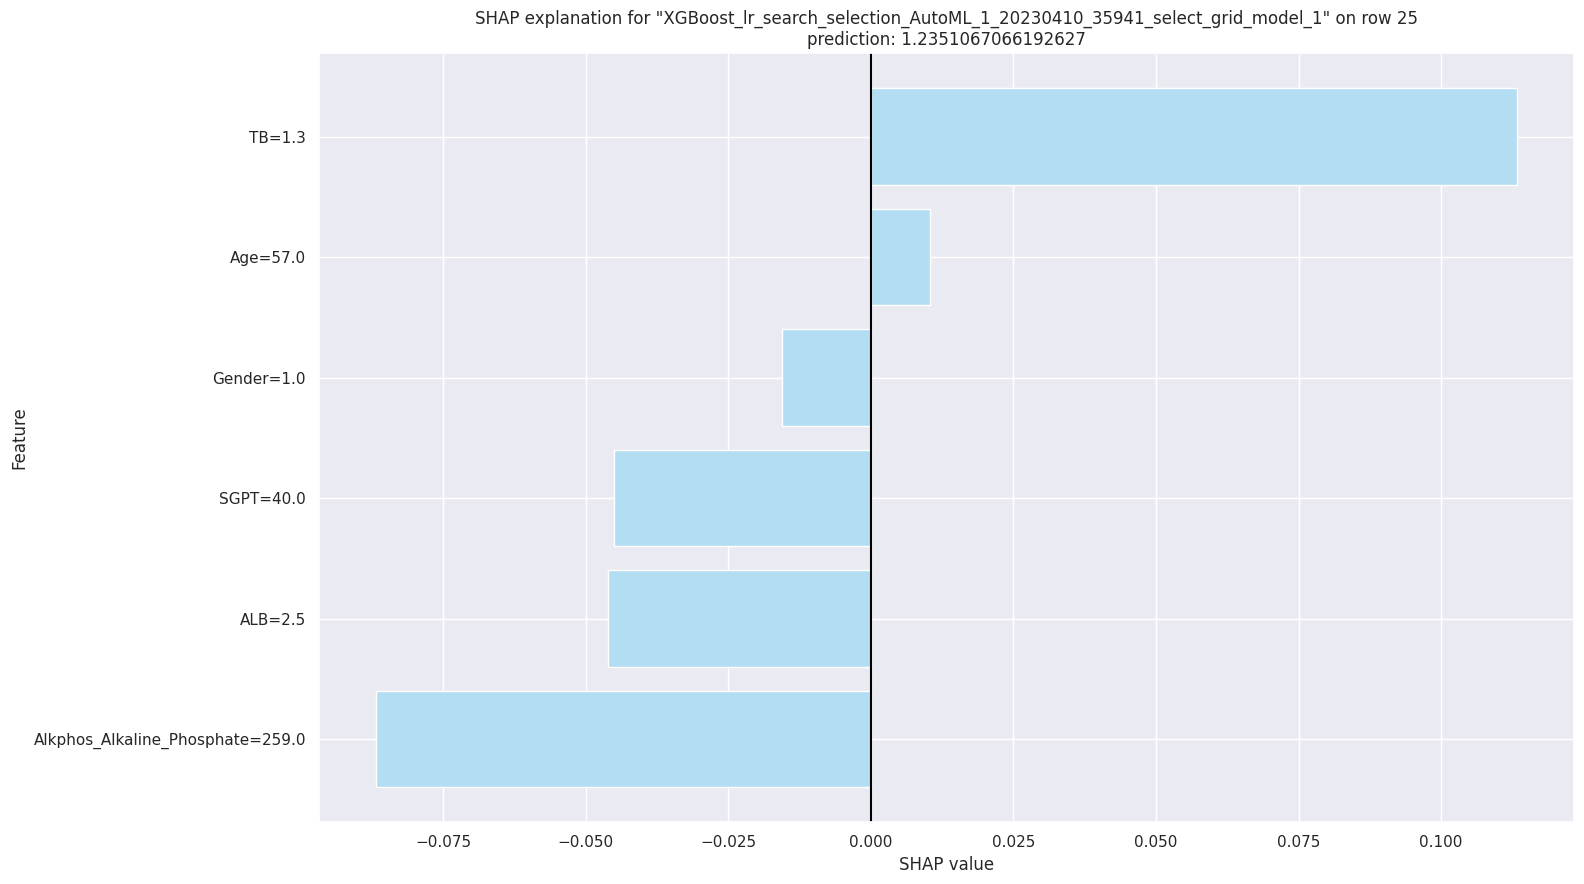

In [417]:
autoML_model.shap_explain_row_plot(
    autoML[1], 25) 

**Interpreting Best Model from AutoML**

**Residual Analysis **

Here, we can see the striped lines of residuals, which is an artifact of having an integer value as a response value, instead of a real value. It can also be observed from the below graph that residuals are normally distributed. Residuals signify that residuals don't have heteroscedasticity.

**Variable Importance**

In the variable importance plot we can observe that the plot replicates the results which we got from the Linear Model and Tree-Based Model above. The variable importance has been scaled between 0 to 1 for ease of understanding

**SHAP Summary**

From the SHAP summary diagram, we can interpret a few conclusions -

All the features are listed as per their importance in making the prediction, that is TB is more significant followed by Alkphose Alkaline phosphate , and so on. Hence, Gender is the least significant predictor in our model.
The position on the SHAP value axis indicates the impact the feature has on the prediction either positive or negative. That is, the more the data point is away from the 0.0 shap value - the more its impact is. As we can see TB has the most impact on the target variable. The color of the dot represents (Red - High, Blue - Low) the impact of the value on the result. As we can see the distribution of red points in the TB feature is far more spread than the blue points. It doesn't have much impact if the content is low i.e. between the shap value of 0.4 to 0.6 the blue data points are pretty concentrated. Let us analyze the distribution of SHAP values of this feature. As seen in the SHAP plot we can see that extreme values on both ends can have a significant effect on Selector
The advantage of SHAP analysis over normal feature importance is that we could visualize how the feature is affecting the target at different values. The standard methods tend to overestimate the importance of continuous or high-cardinality categorical variables.


**ICE (Individual Conditional Expectation) Plot**

CE plot is similar to what we did in the PDP plot, but the fundamental difference between the two methods is that the PDP plot focuses on the average effect of a feature and does not focus on a specific instance. ICE plot comes in rescue to address this drawback of the PDP plot where the outputs from all instances are considered instead of an average value.

Individual conditional expectation curves are even more intuitive to understand than partial dependence plots. One line represents the predictions for one instance if we vary the feature of interest.

Double-click (or enter) to edit

SHAP Analysis for Linear and Tree-Based Models

Here the x-axis is the feature and the y-axis is the output as we vary the feature. The grey histogram is the distribution of variables in the dataset and the cross made by E[Feature], E[f(x)] is the expected values. y

Talking about the red line on the plot - When we give a sample as an input (sample_ind = 18) as an input to check the output. By plotting this we can see the difference between the model output from the expected value.

[ ]


Exact explainer: 524it [00:13, 11.04it/s]                         


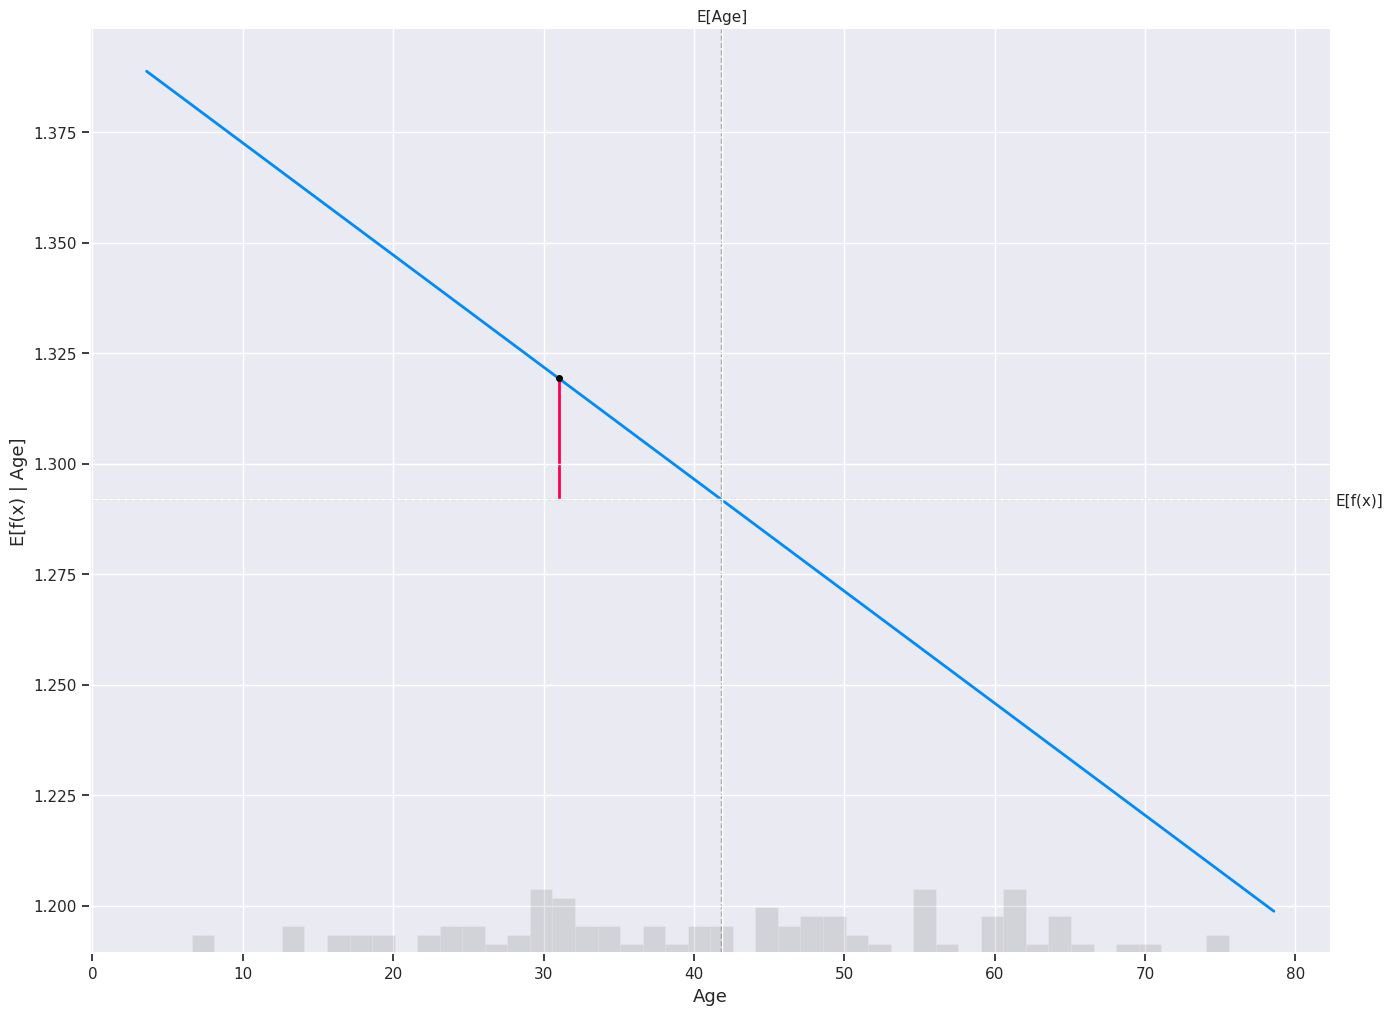

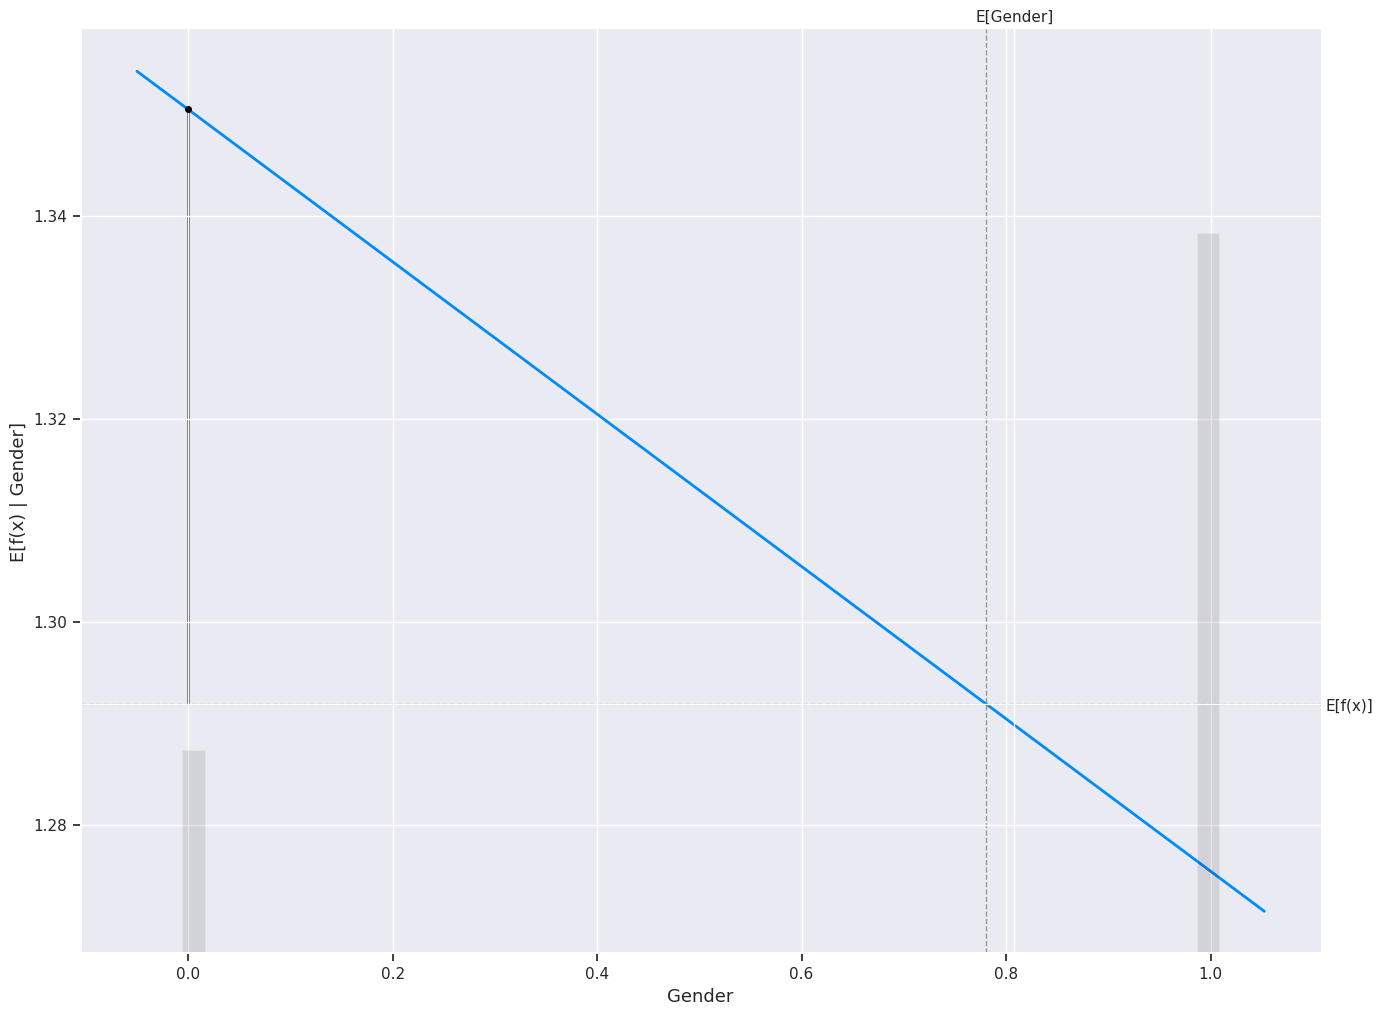

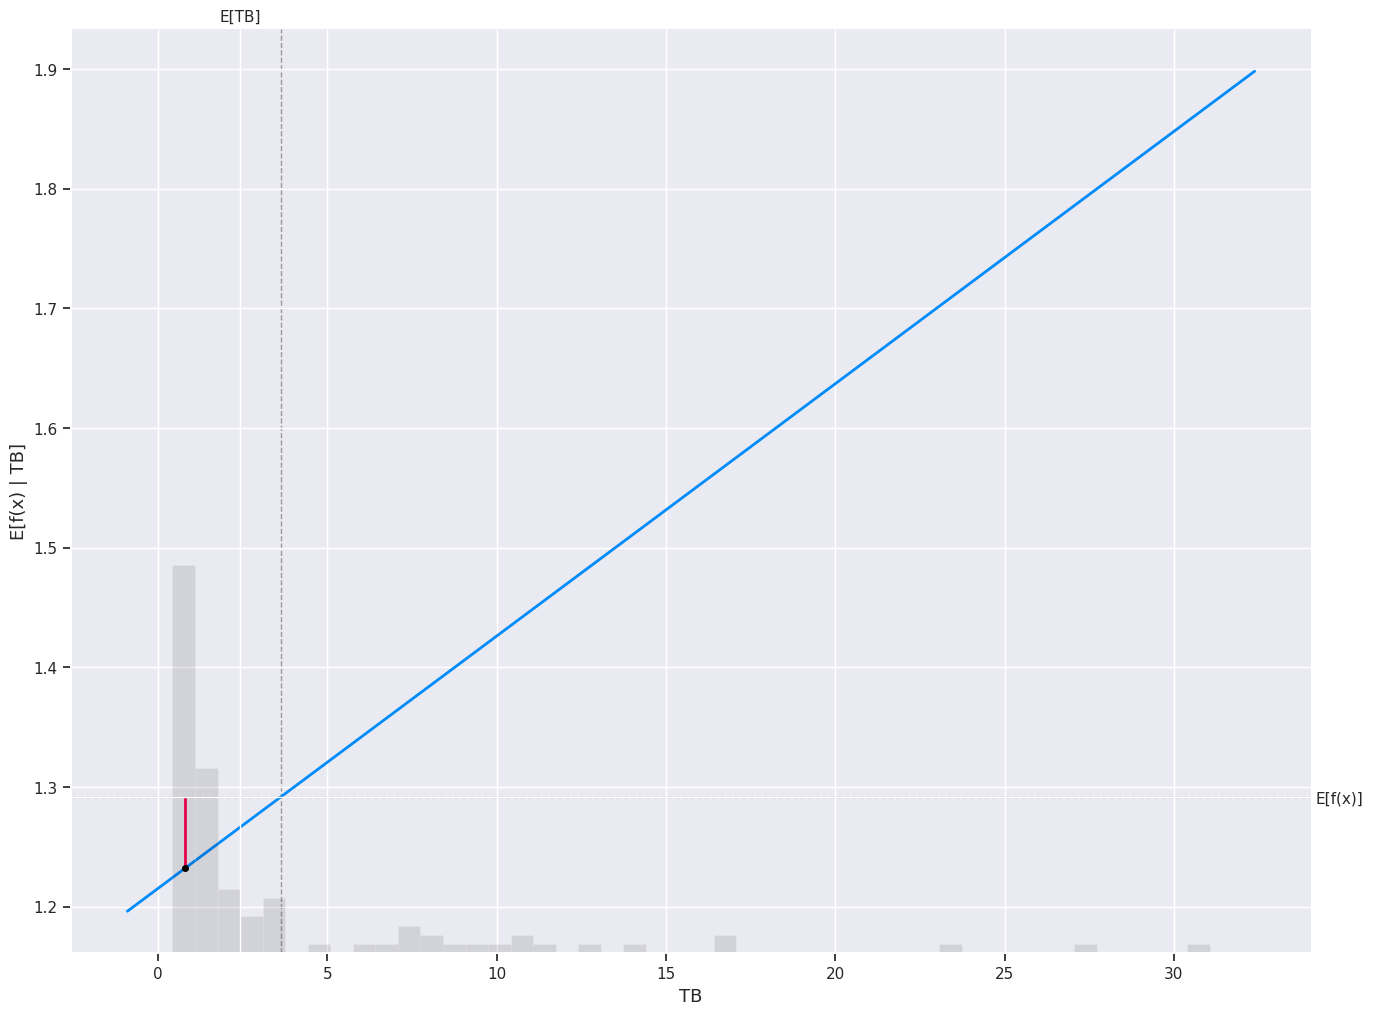

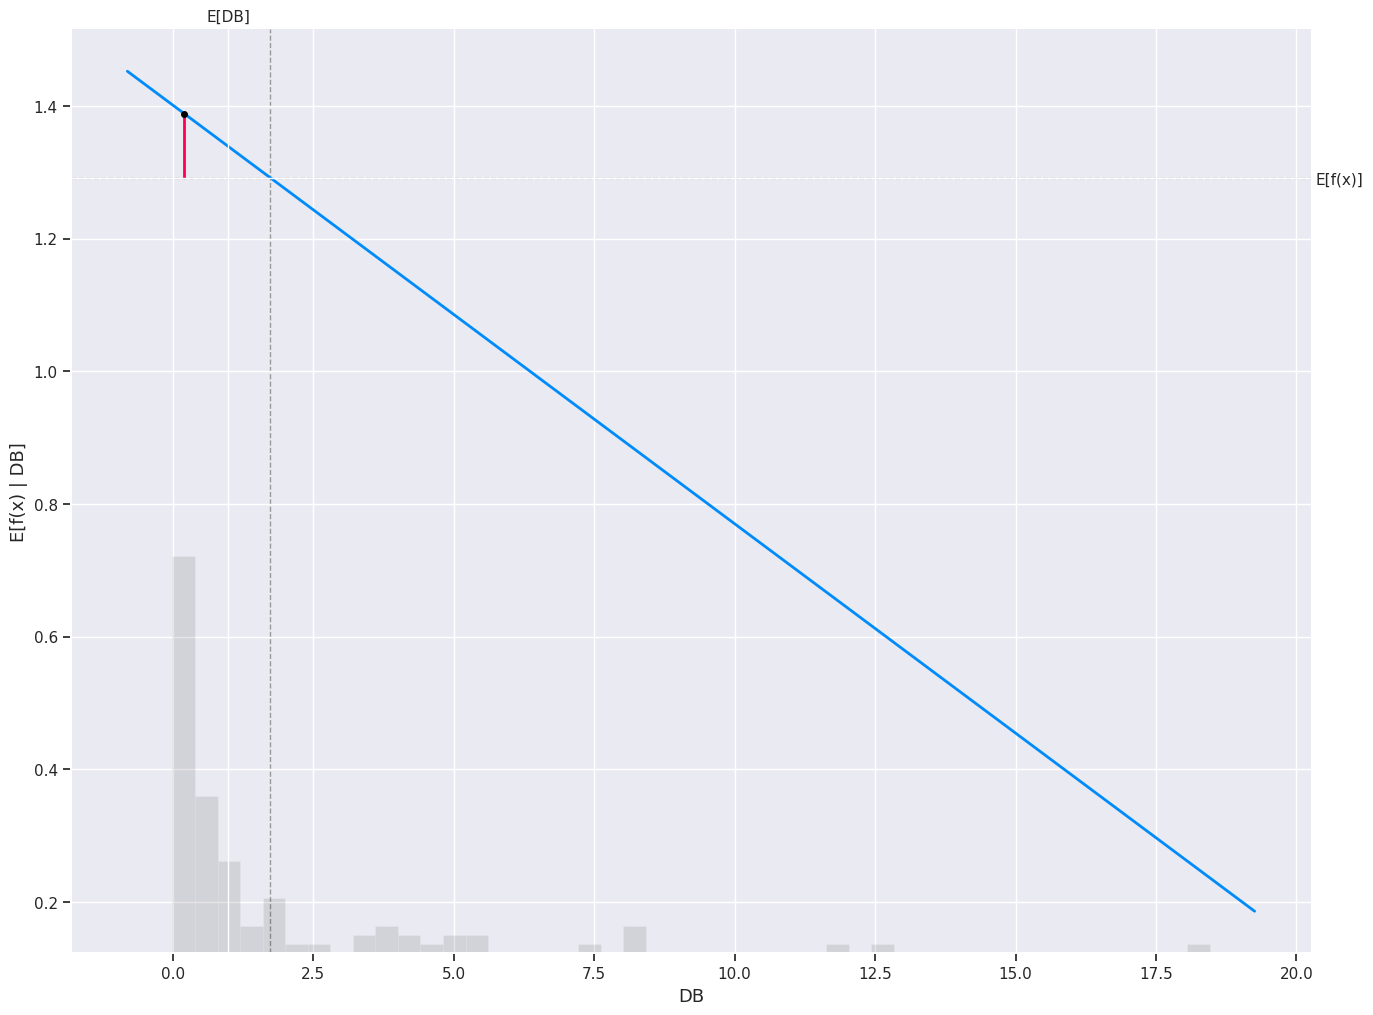

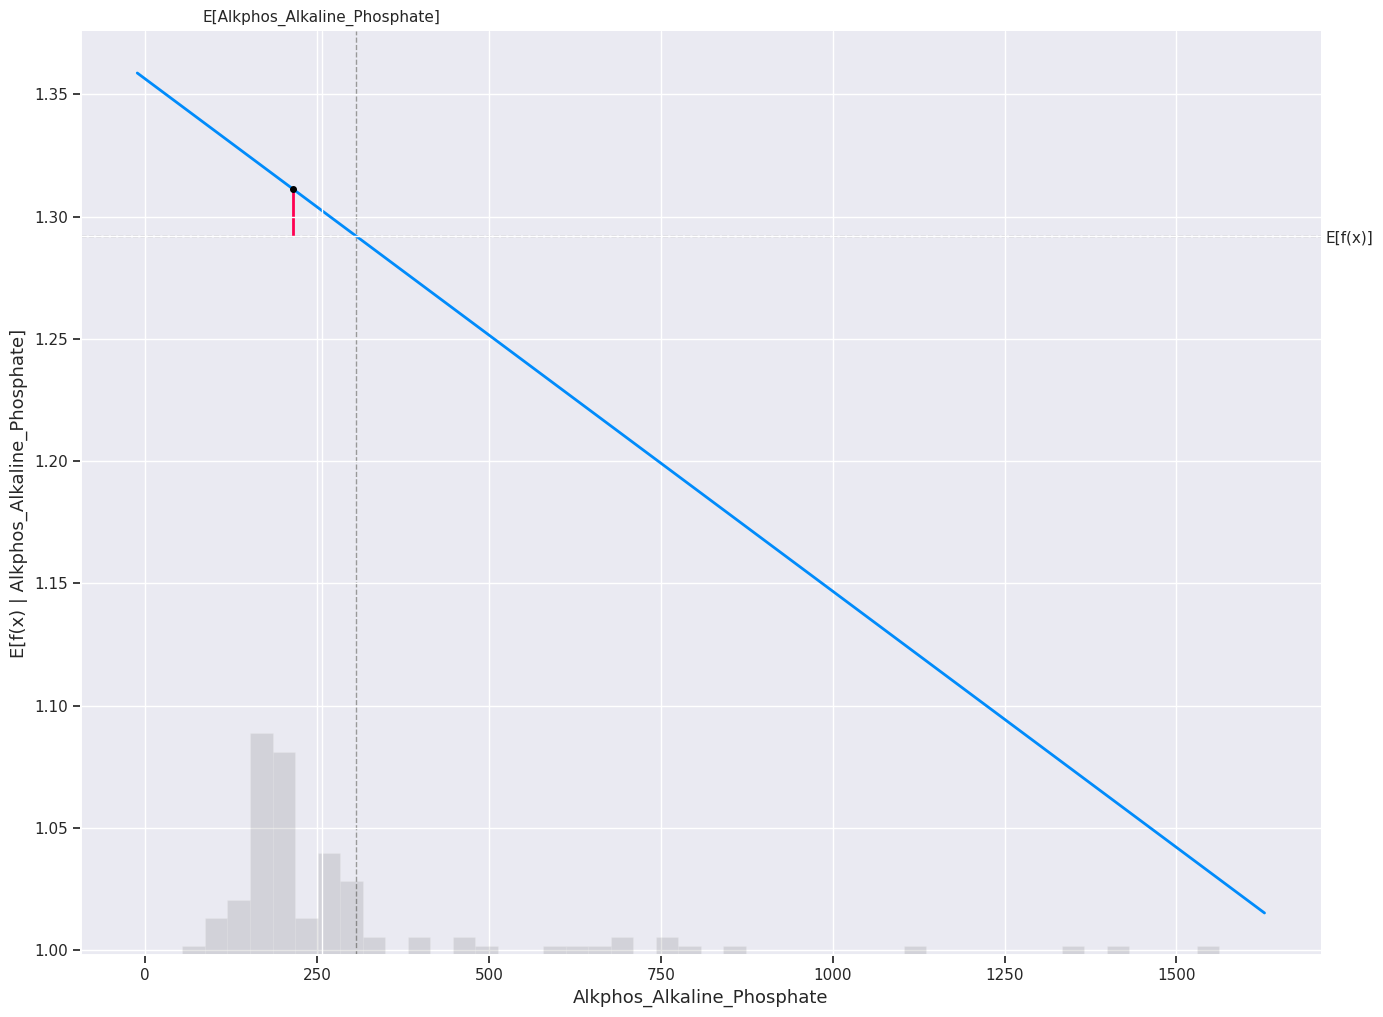

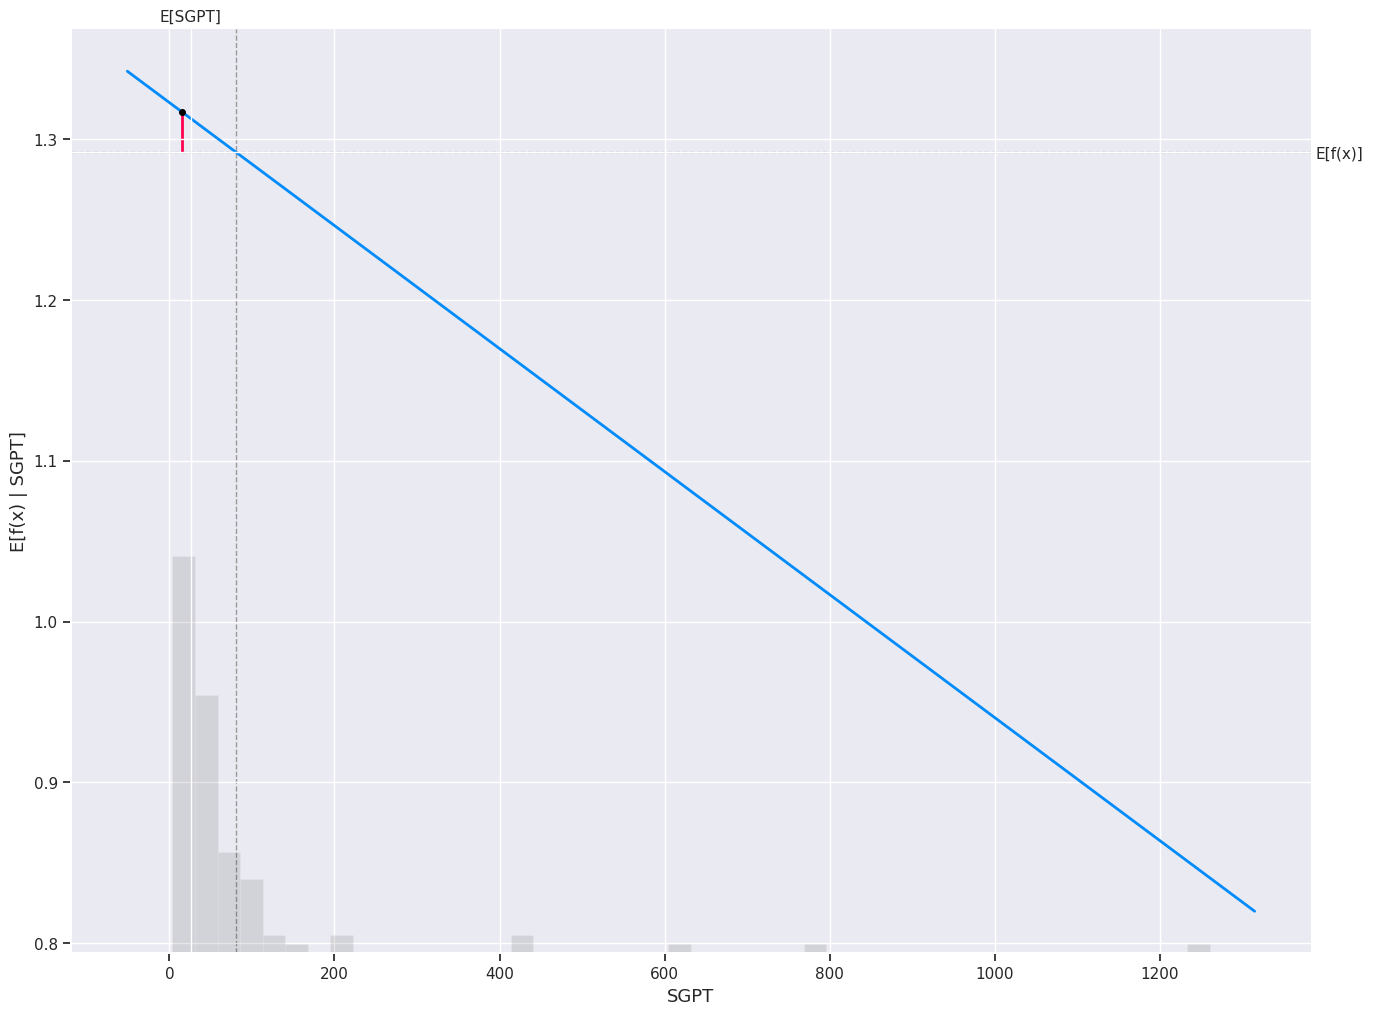

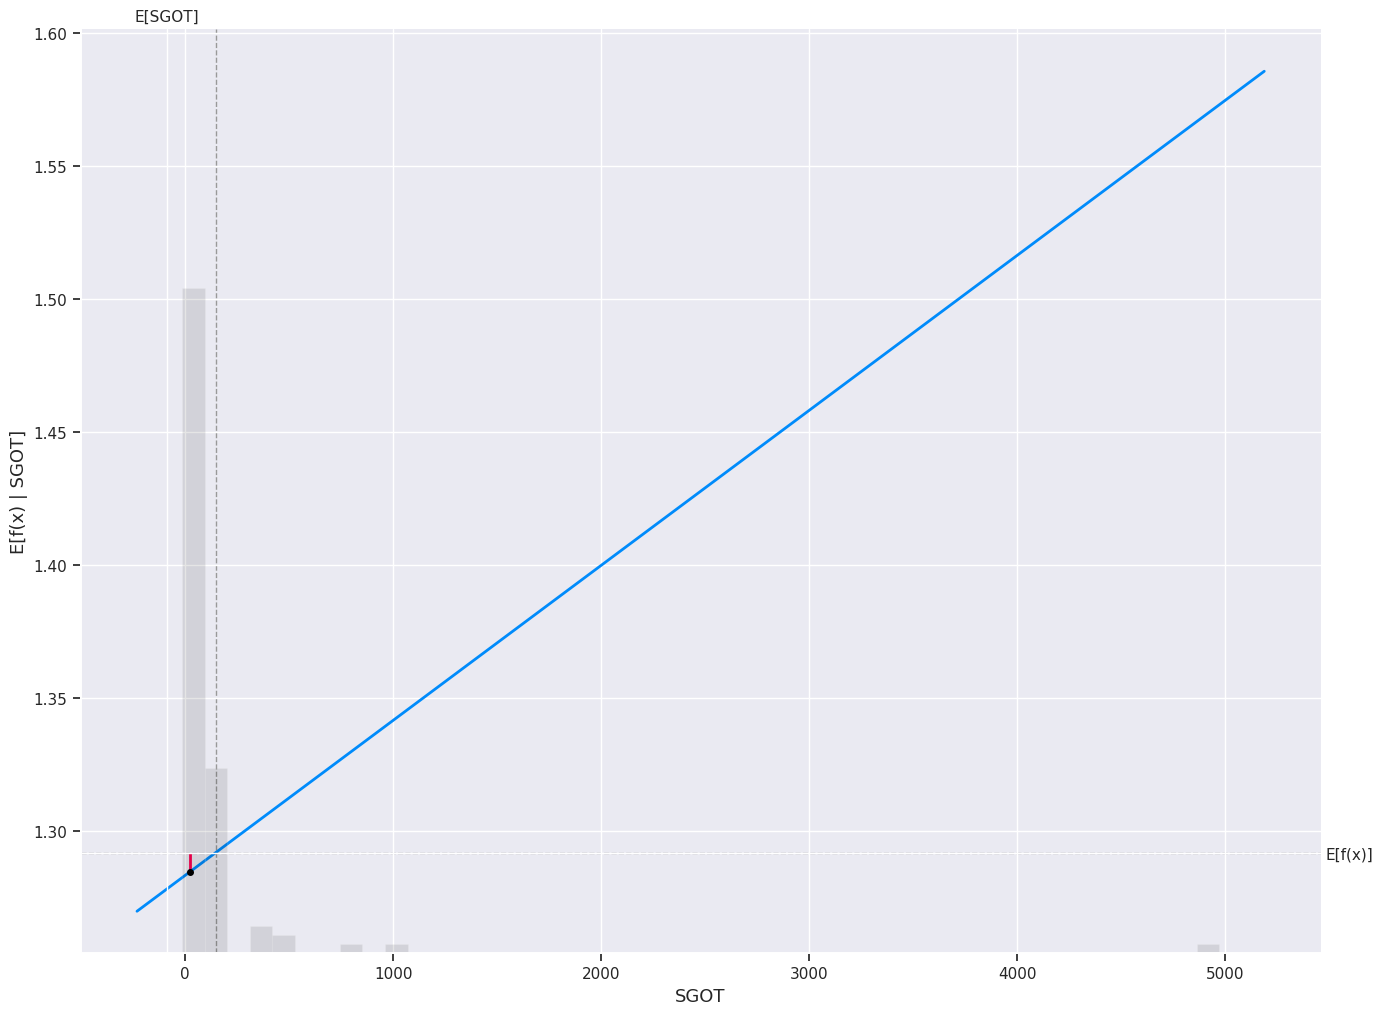

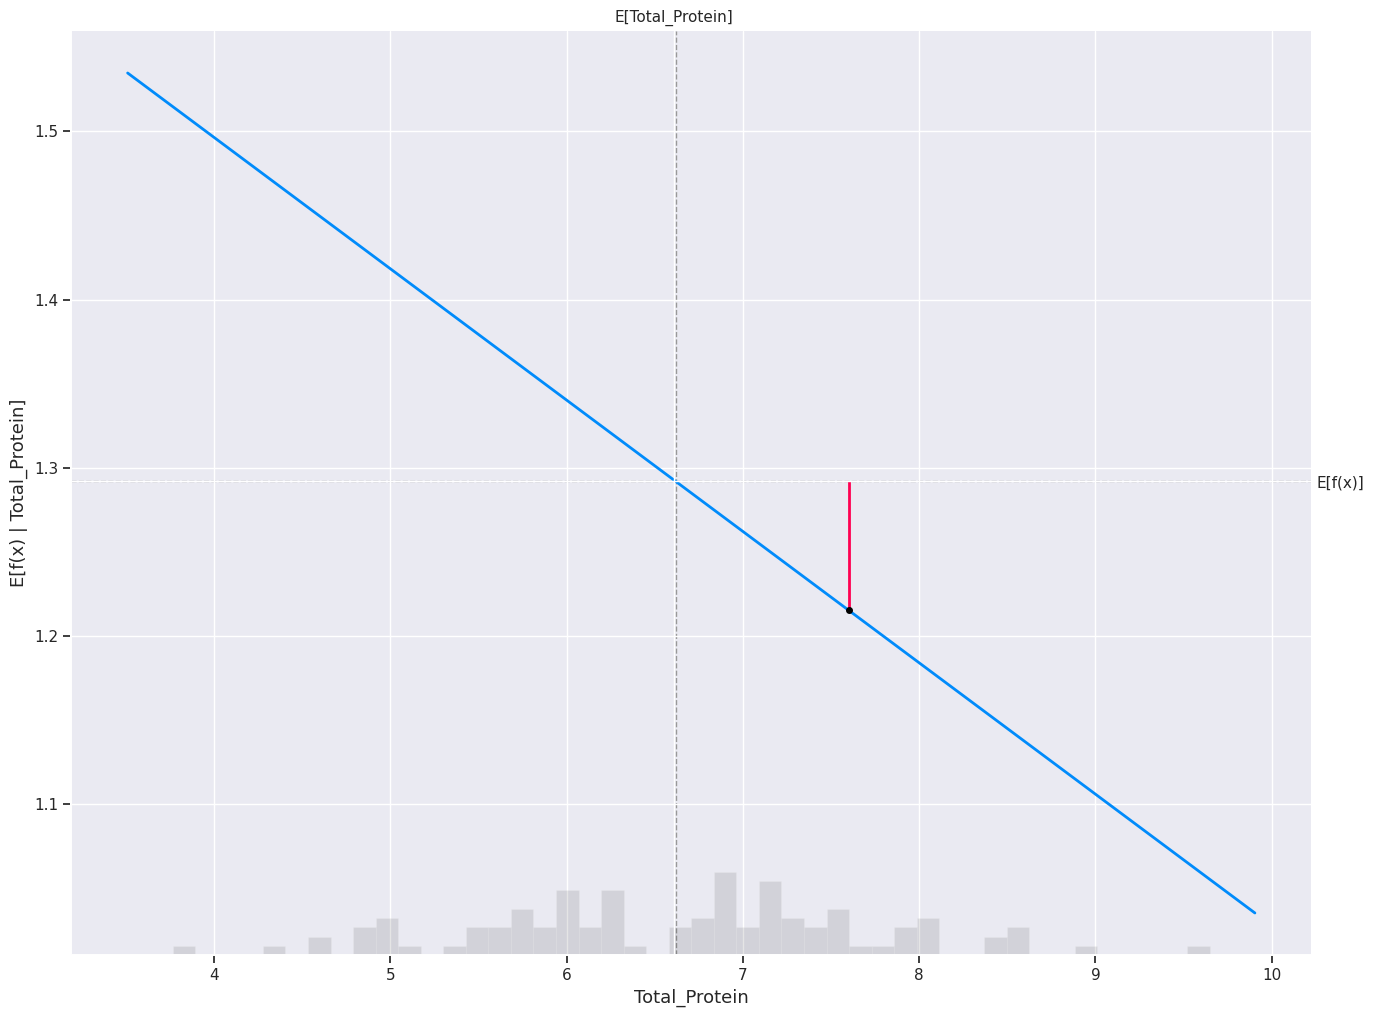

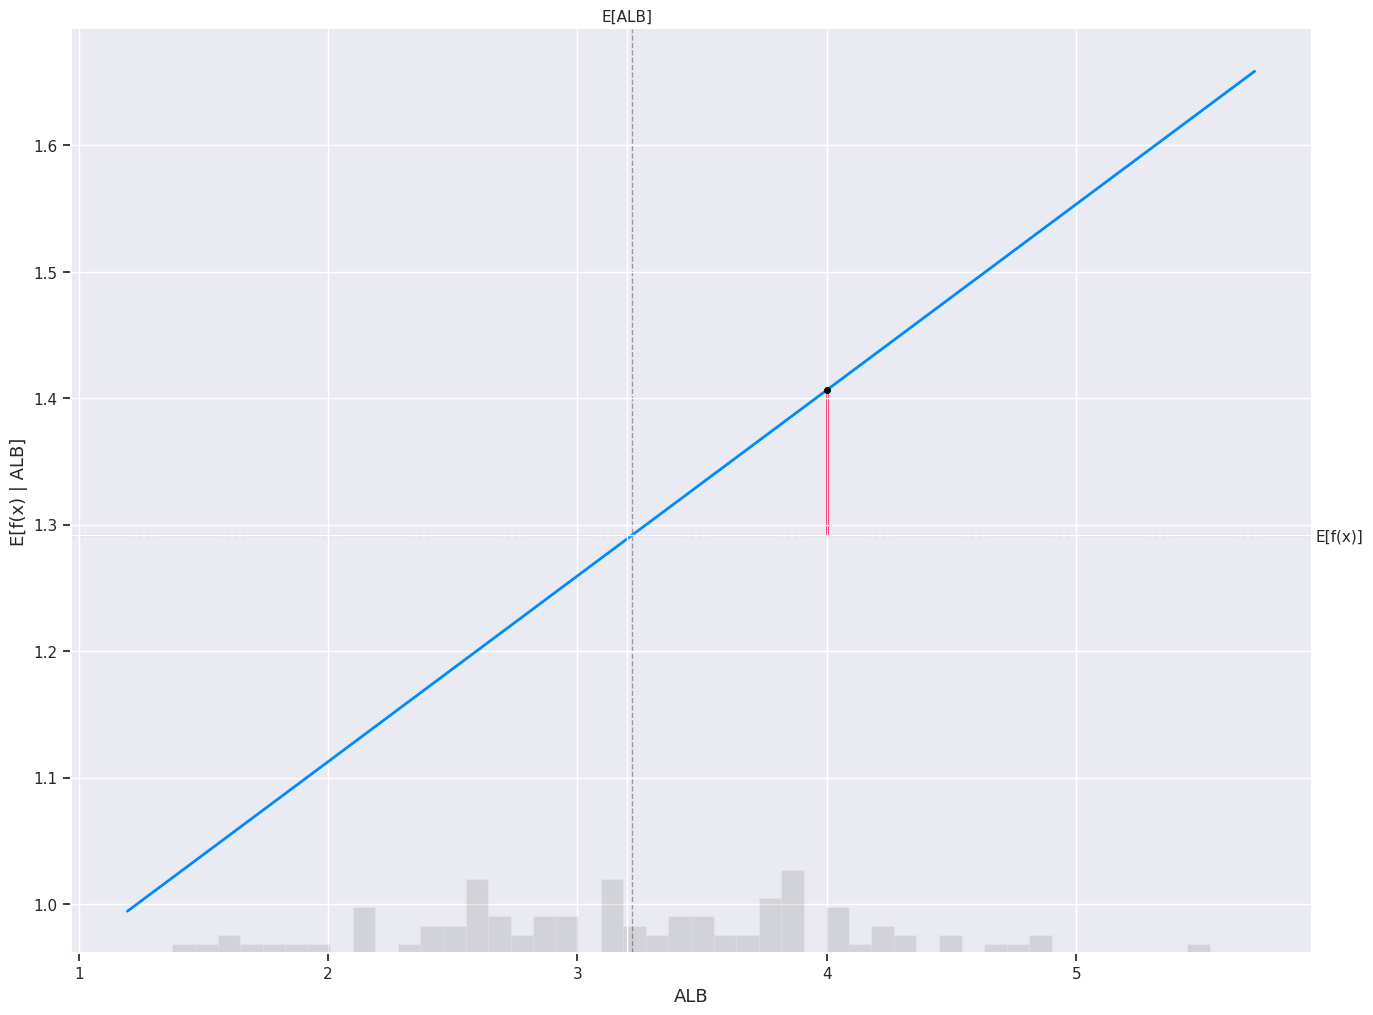

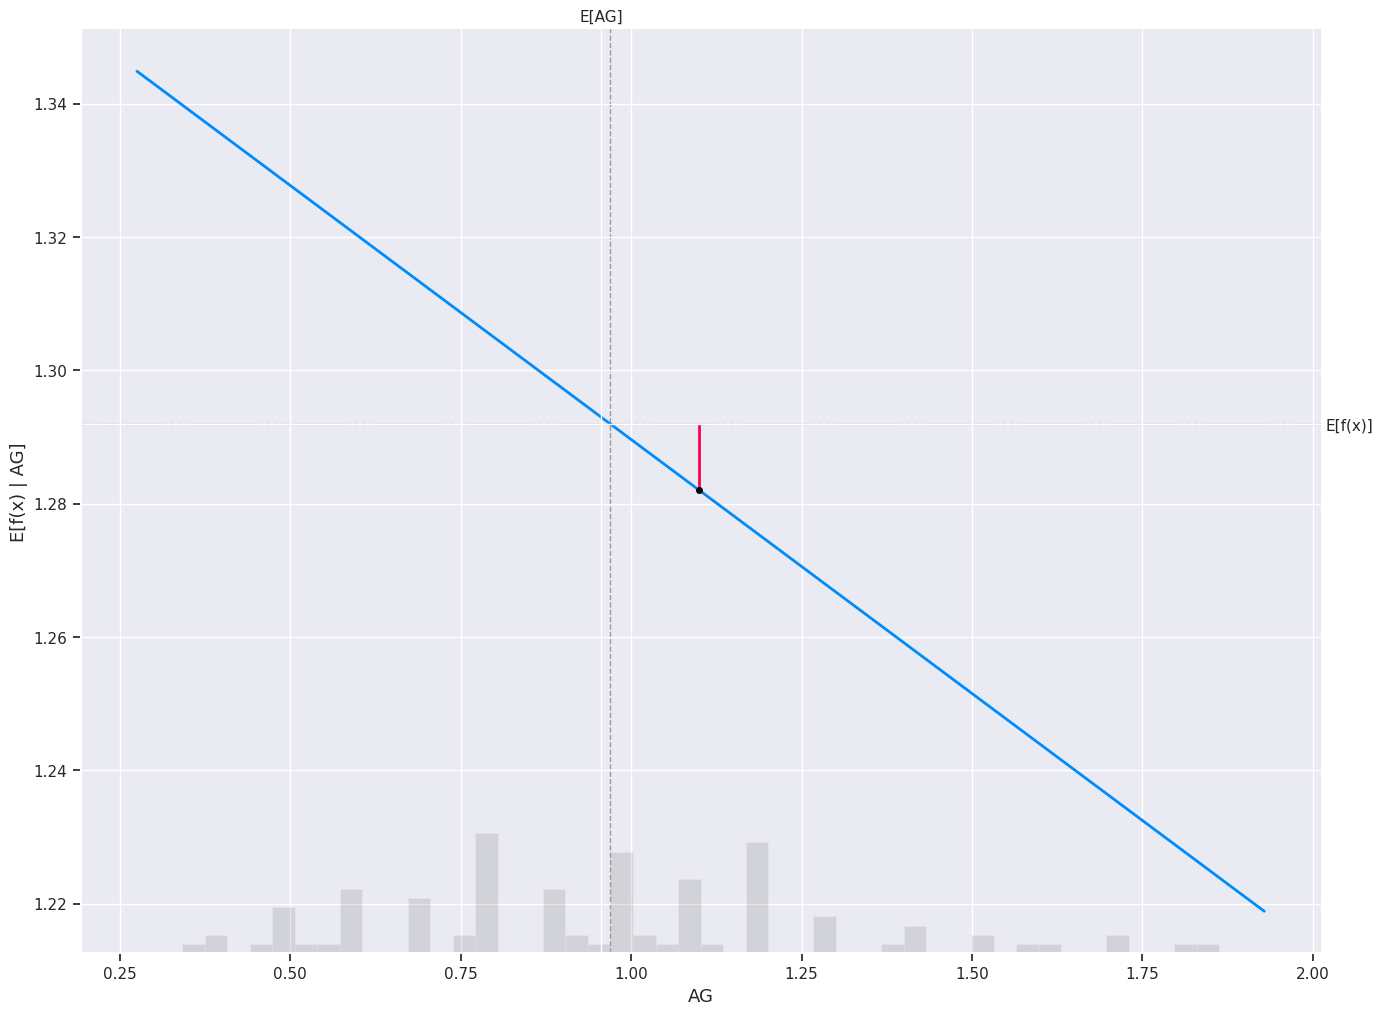

In [418]:
linear_explainer = shap.Explainer(linear_model.predict, x_train_100)
linear_shap_values = linear_explainer(x_train)
for i in x_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        linear_model.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=linear_shap_values[sample_ind : sample_ind + 1, :],
    )
     

Exact explainer: 524it [00:23, 11.94it/s]                         


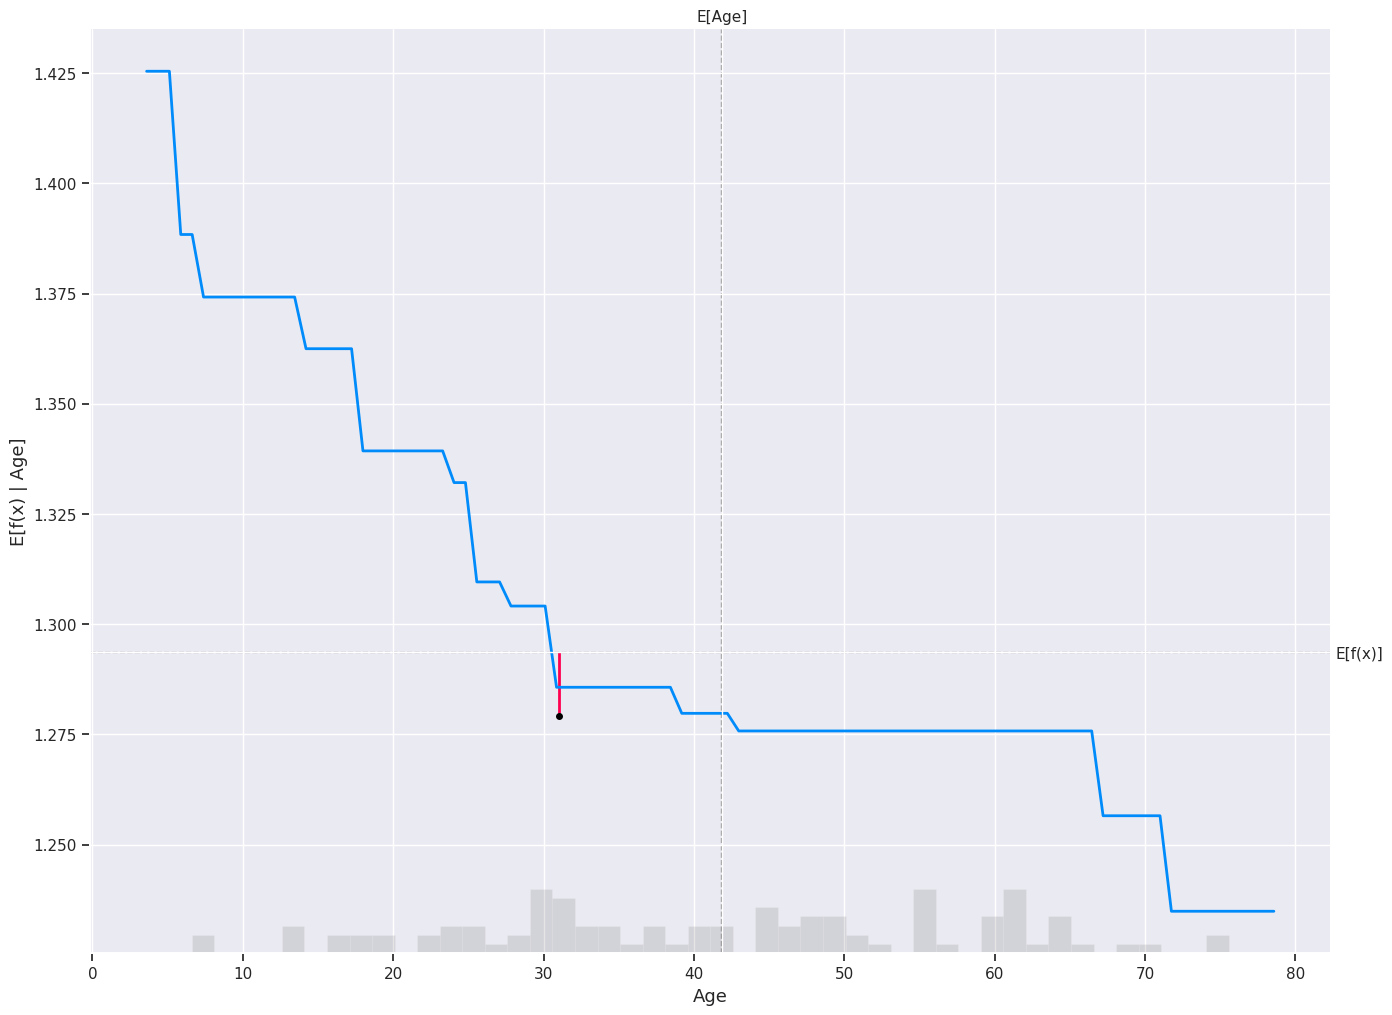

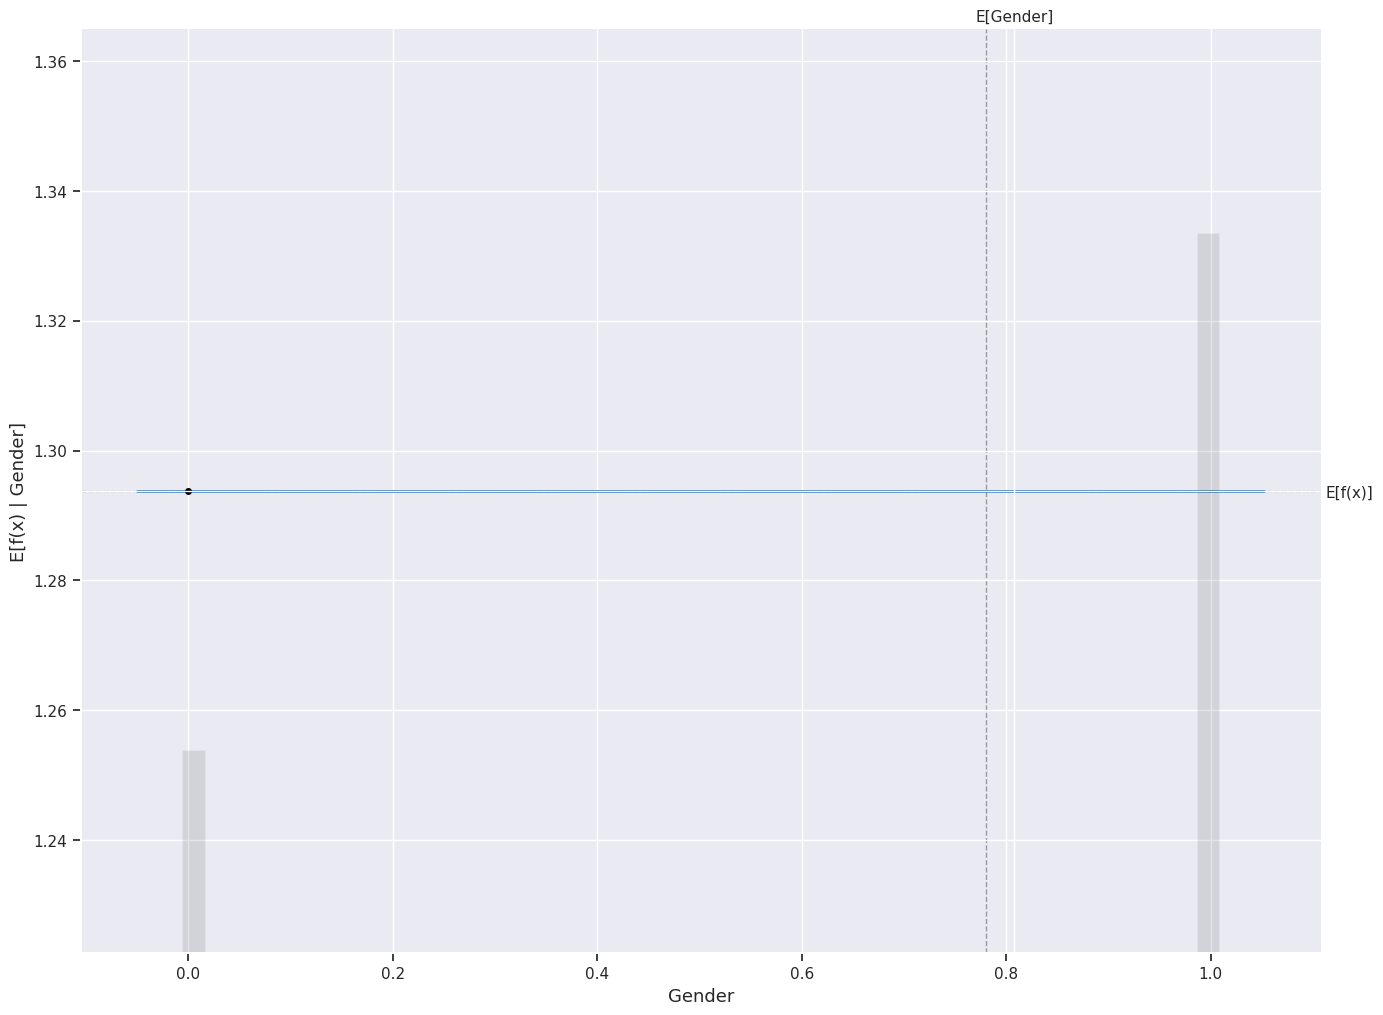

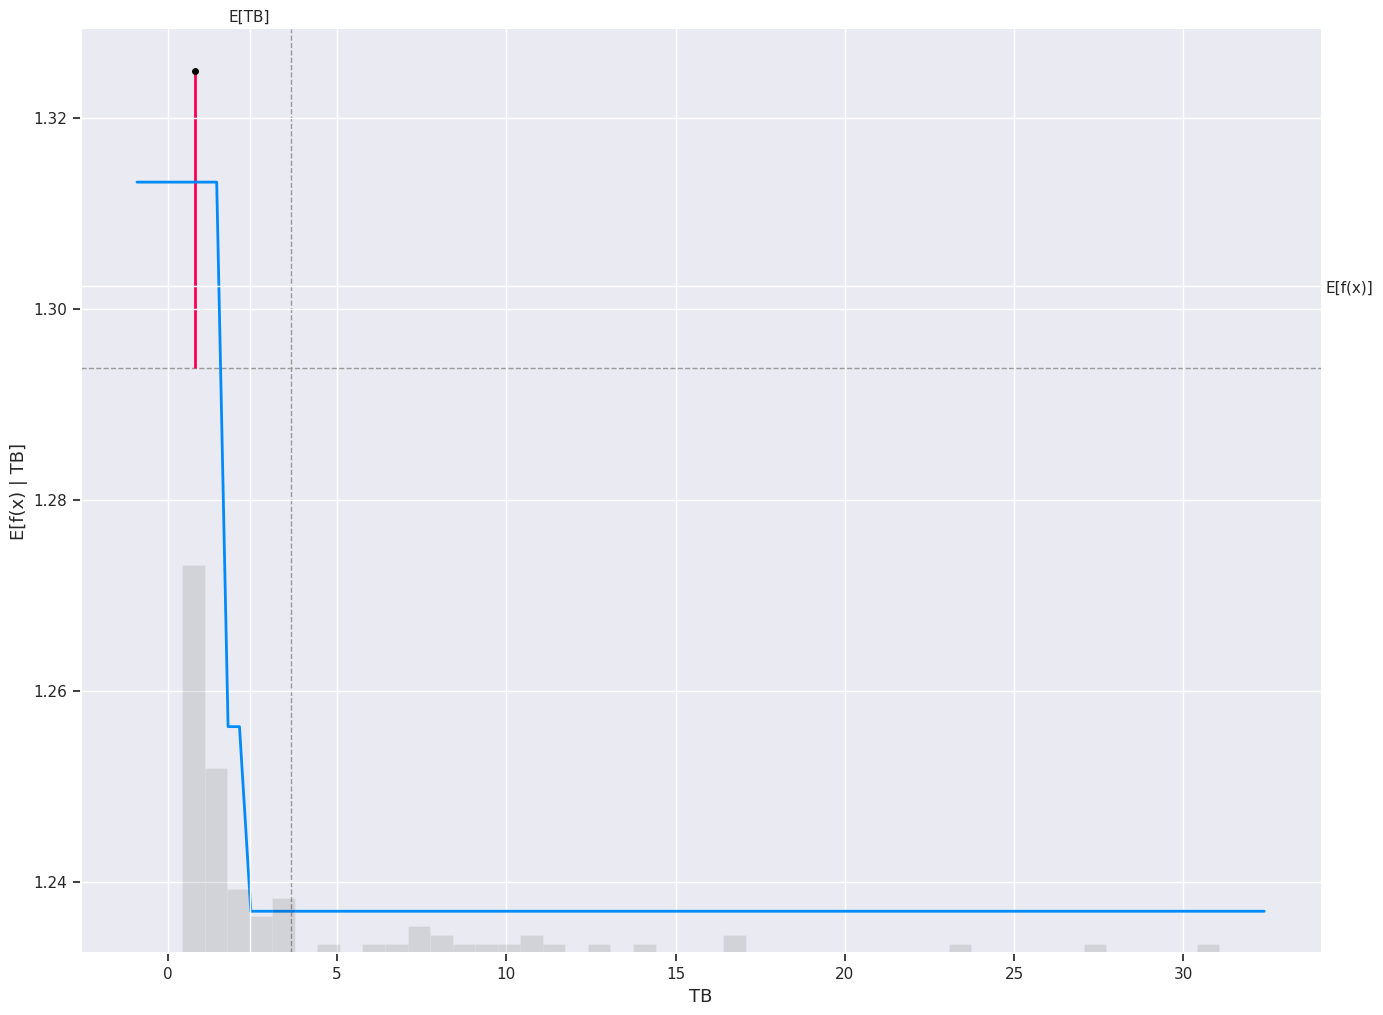

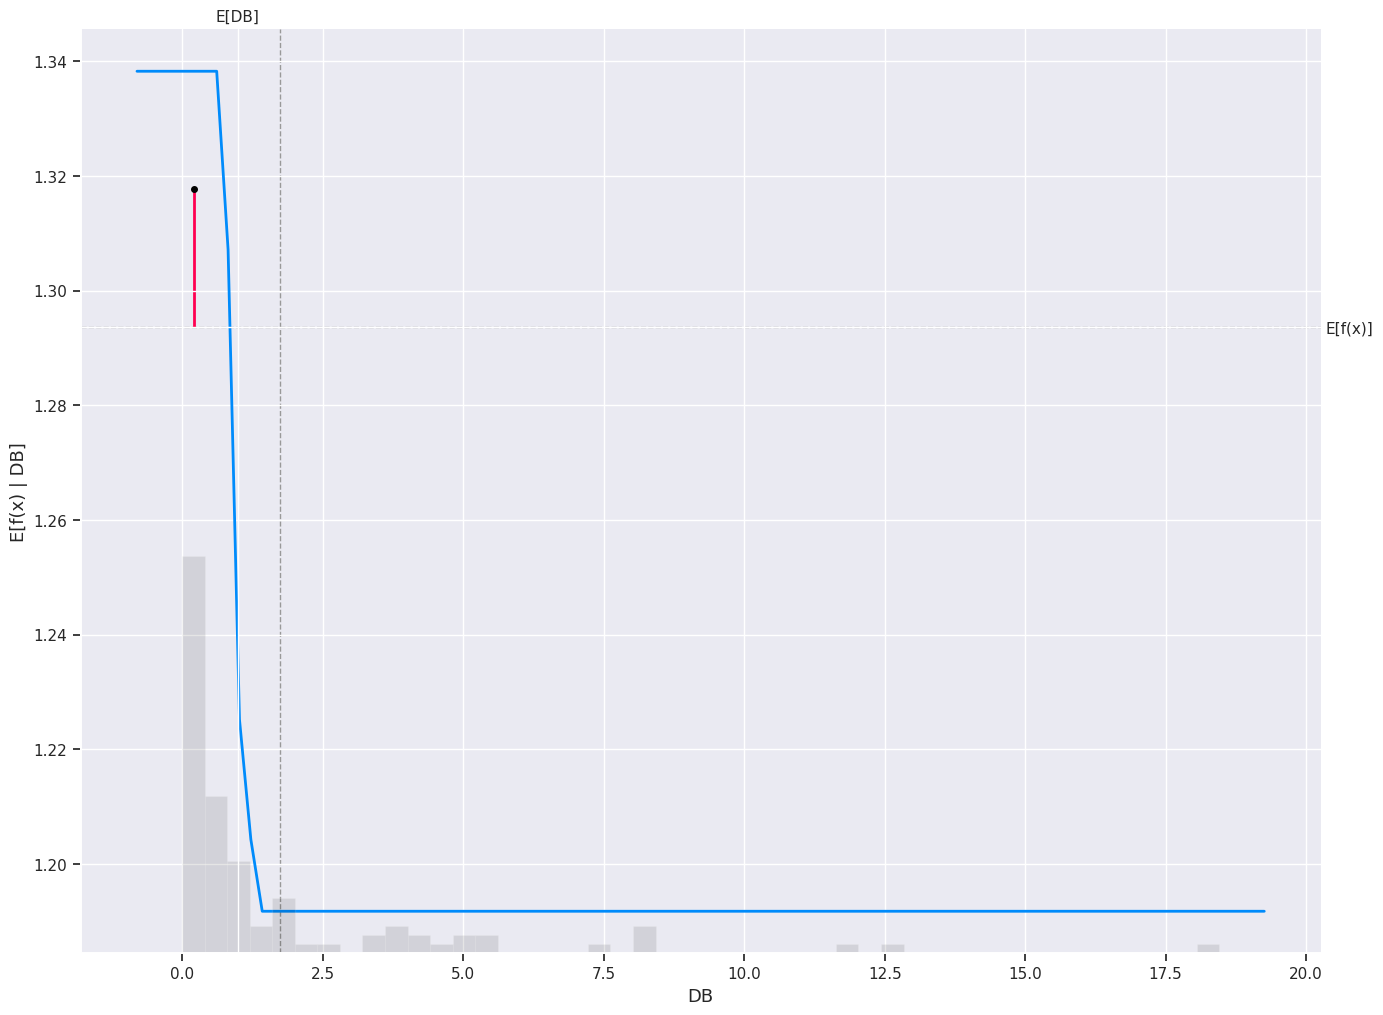

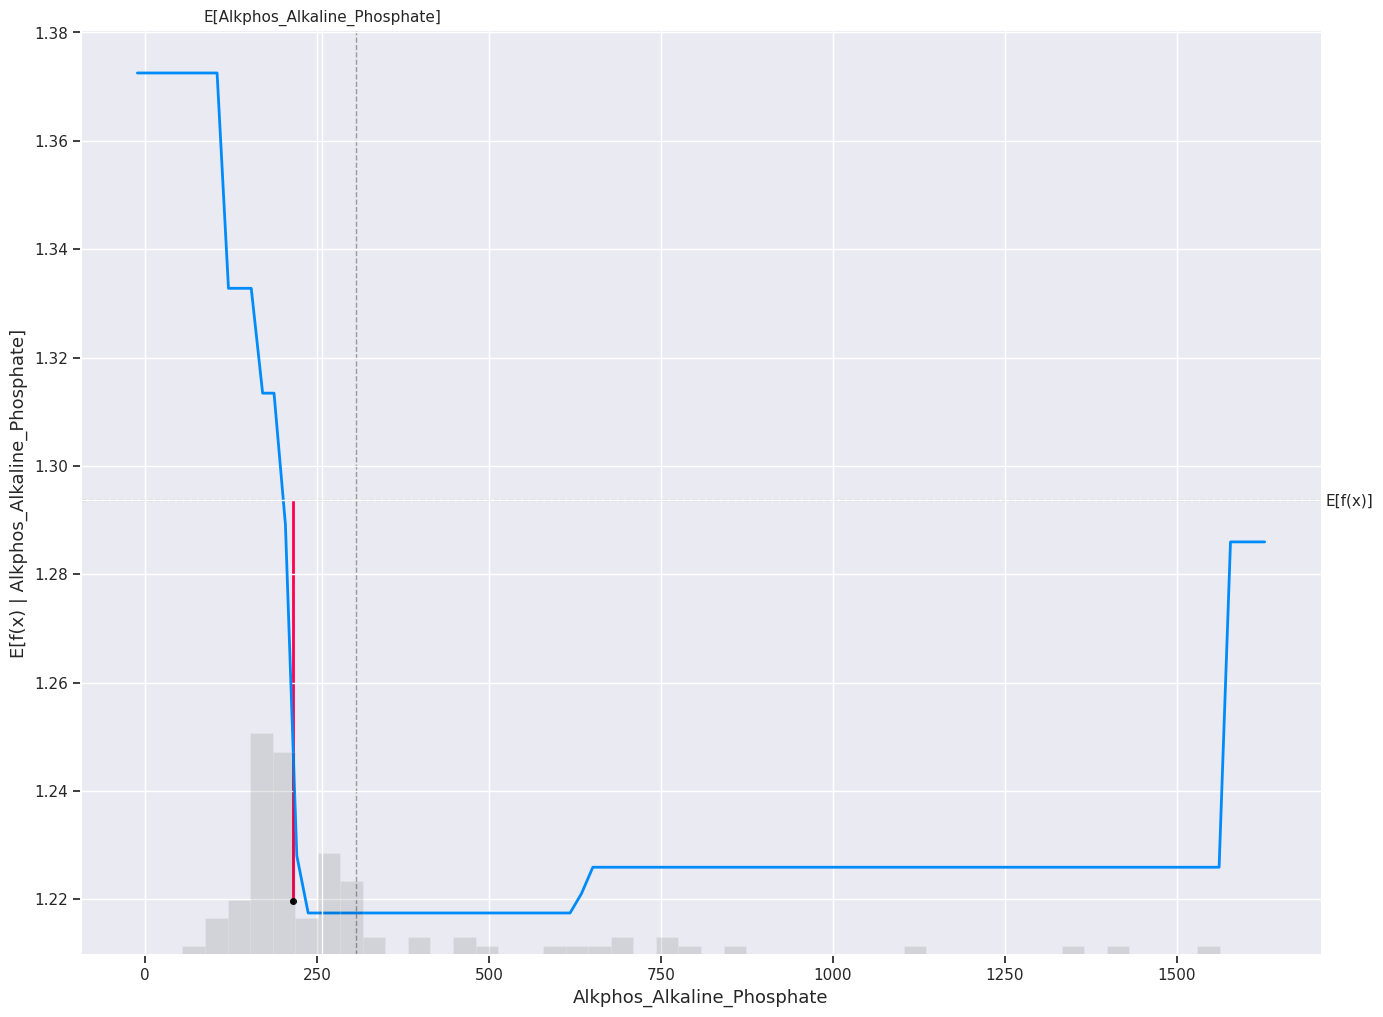

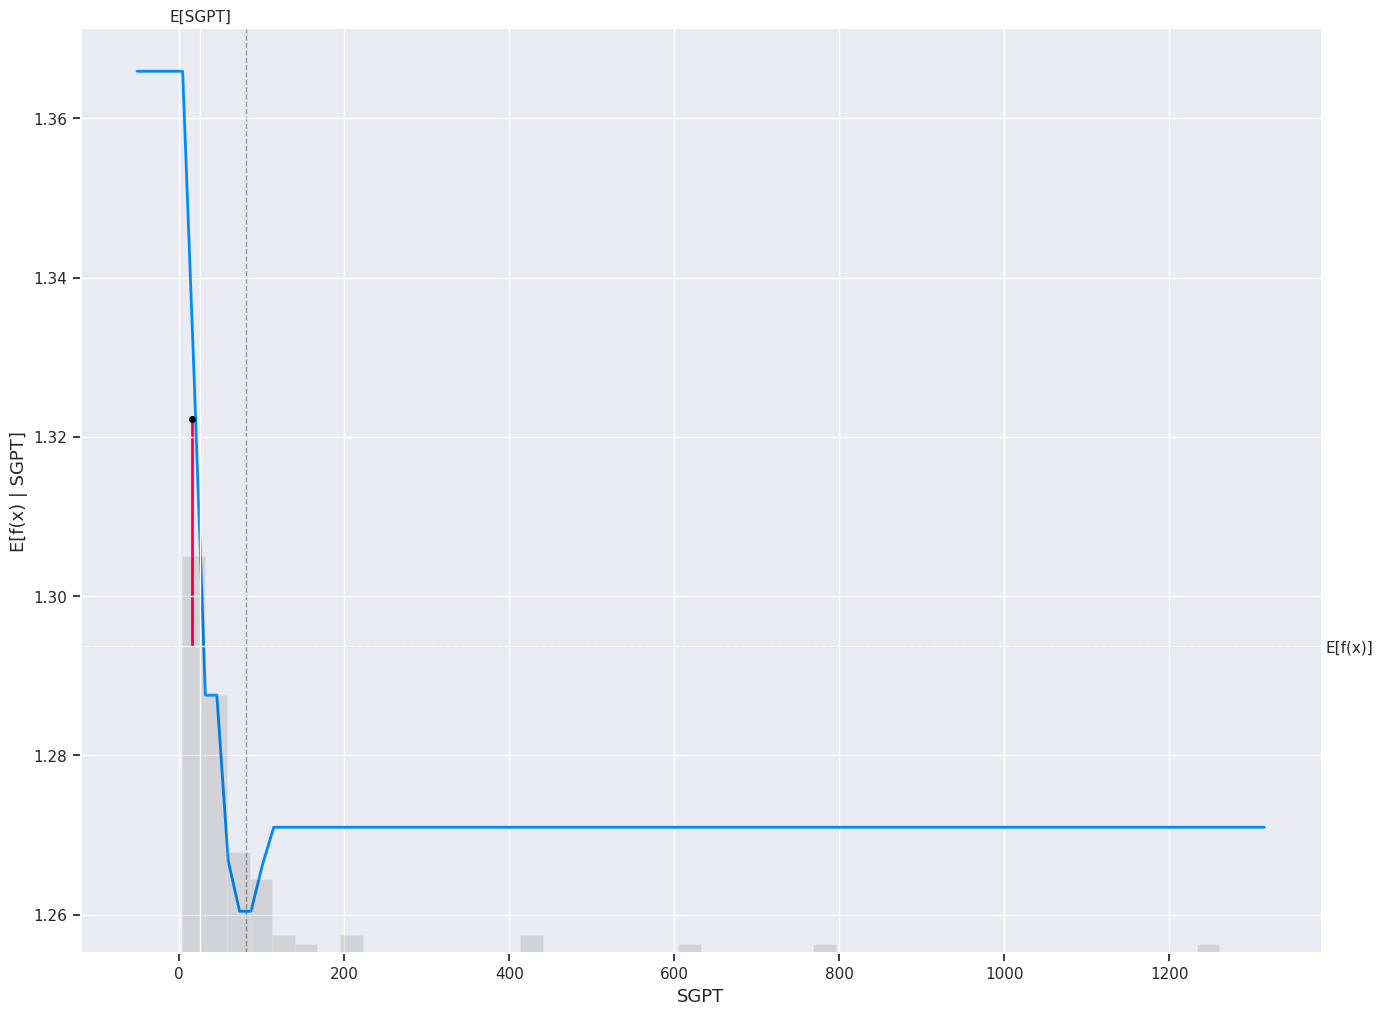

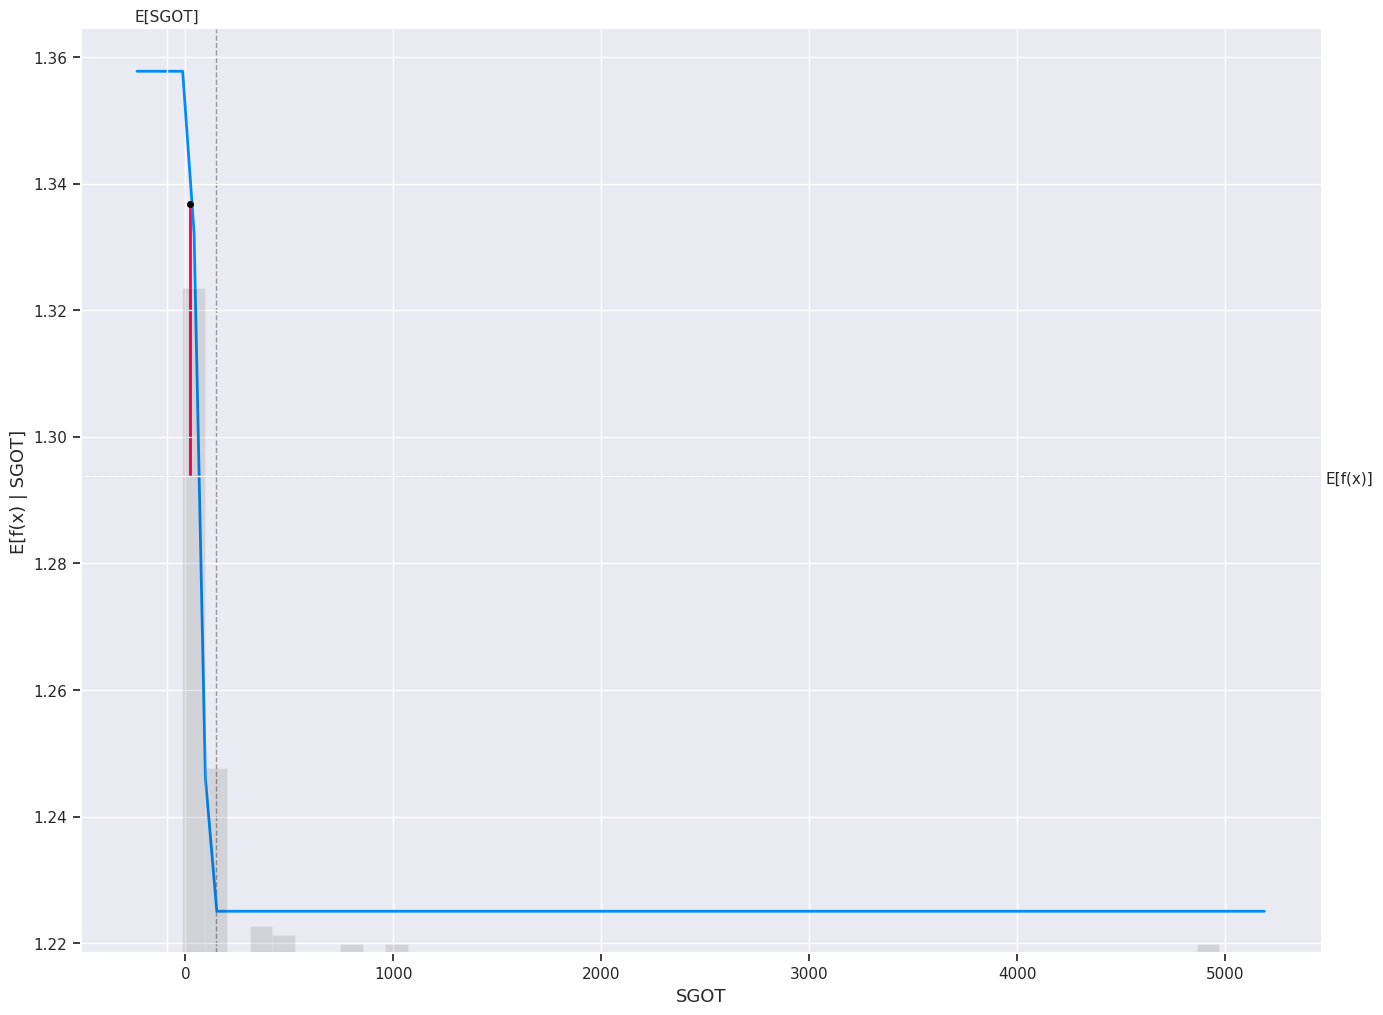

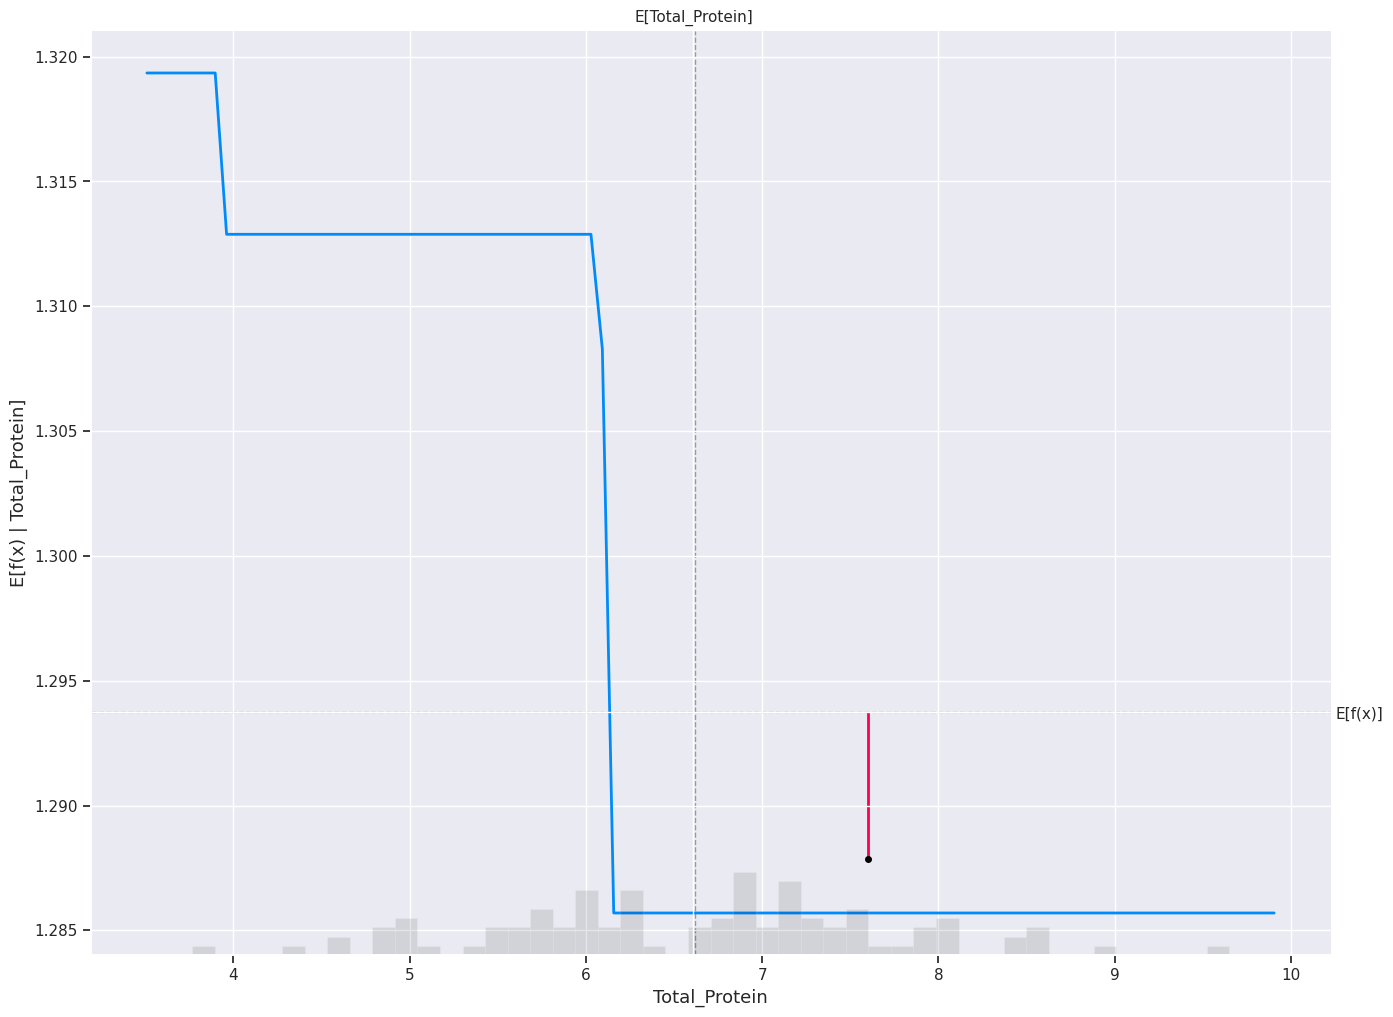

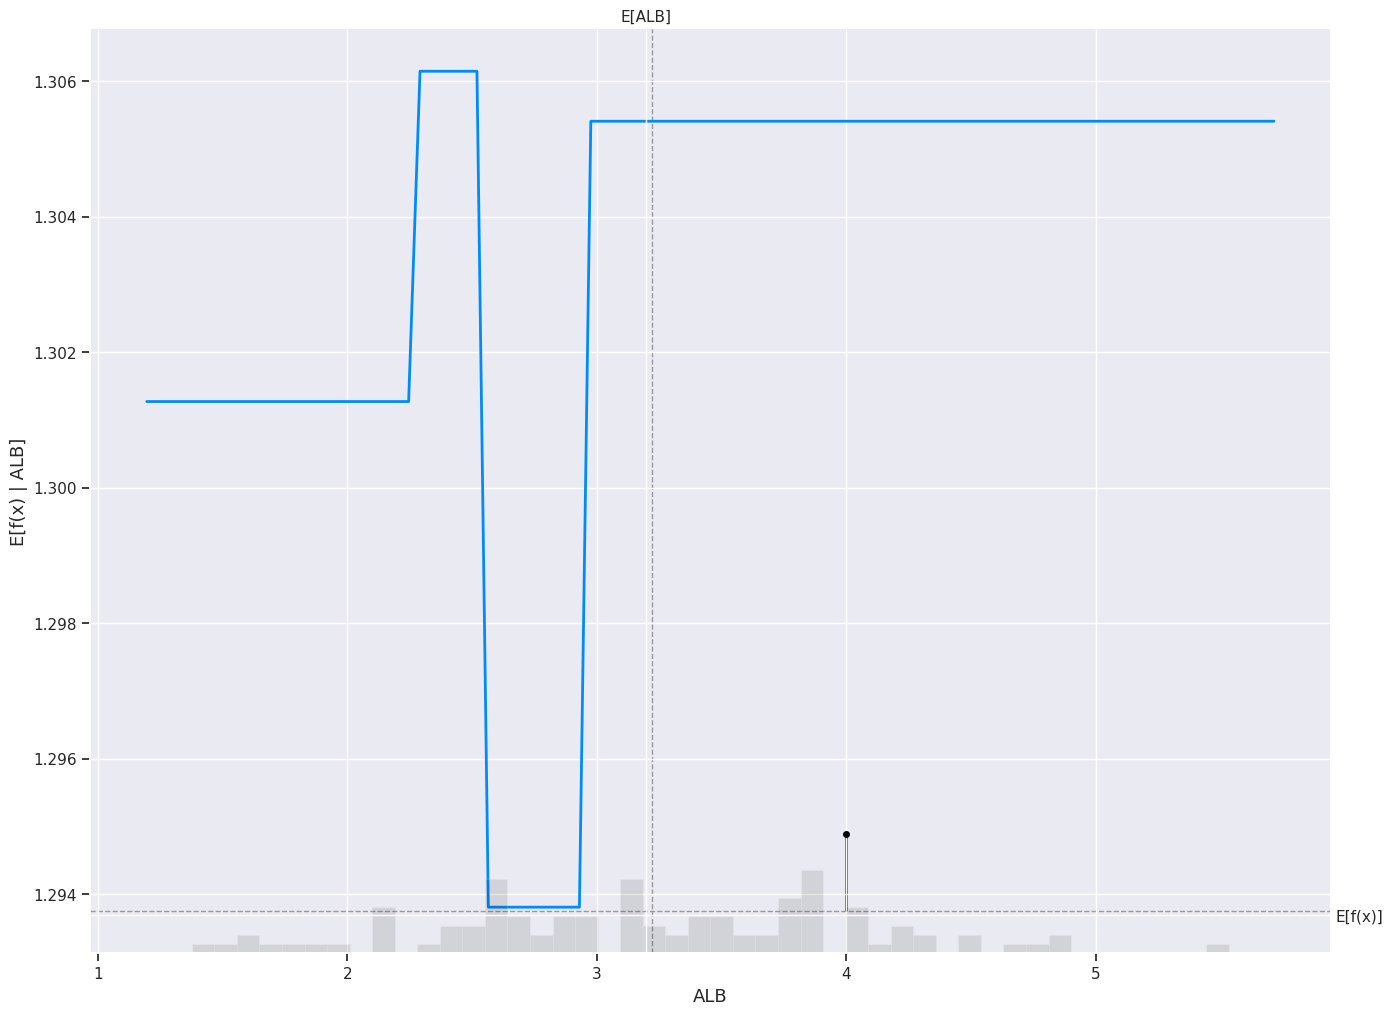

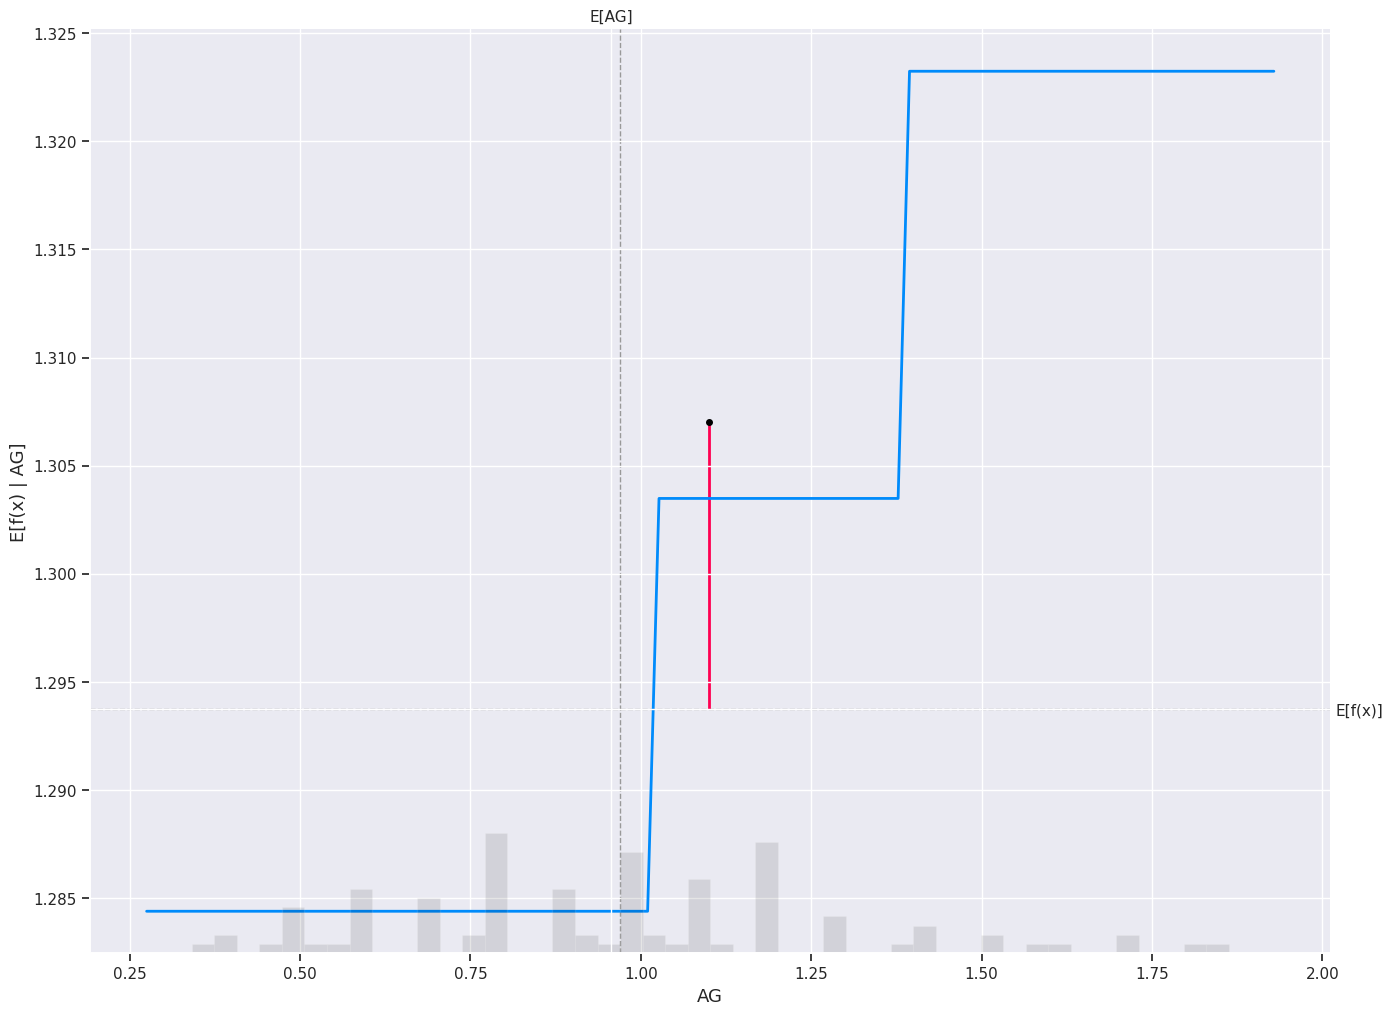

In [419]:
# SHAP explanation of a tree based model
tree_explainer = shap.Explainer(tree_model.predict, x_train_100)
tree_shap_values = tree_explainer(x_train)
for i in x_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        tree_model.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=tree_shap_values[sample_ind : sample_ind + 1, :],
    )

Interpreting SHAP Feature Importance Plot for Linear and Tree-based model

The idea behind SHAP feature importance is simple: Features with large absolute Shapley values are important. Since we want global importance, we average the absolute Shapley values per feature across the data. Next, we sort the features by decreasing importance and plot them.

The following plots are

SHAP feature importance for a linear model SHAP feature importance for tree-based model As we can see below in the plots, there is a difference in feature importance for both the models

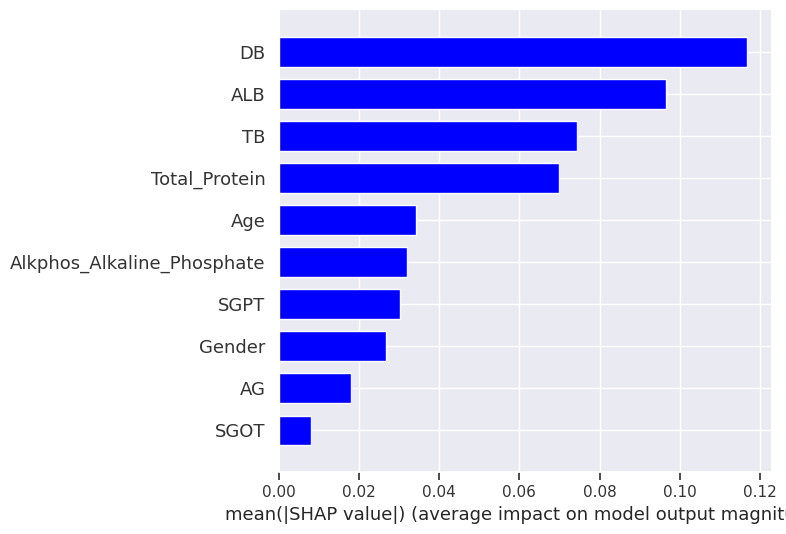

In [420]:
# SHAP variable importance for a Linear Model
shap.summary_plot(linear_shap_values, x_train, plot_type="bar", color="blue")

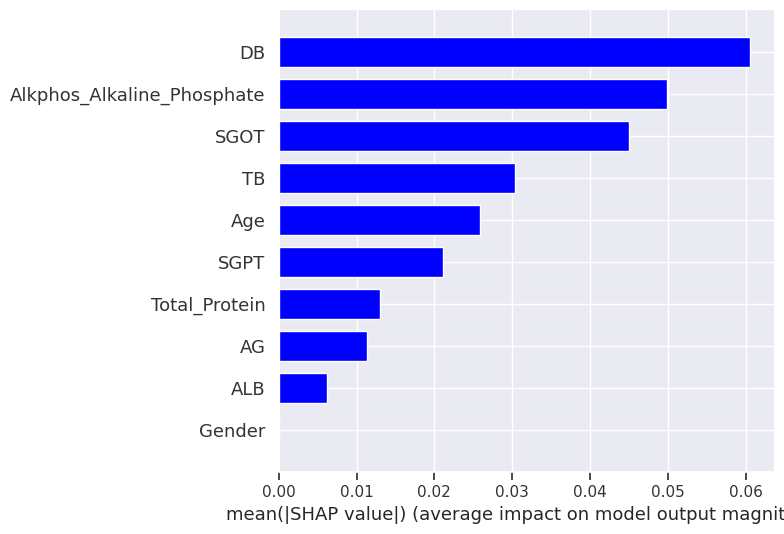

In [421]:
# SHAP variable importance for Tree based model
shap.summary_plot(tree_shap_values, x_train, plot_type="bar", color="blue")

**Interpreting Waterfall SHAP visualization**

Let's consider the same sample (sample_ind = 18) Notice the value of volatile_acidity in the waterfall model is the same as what we have in SHAP partial dependence plot. It says that f(x) = 1.48 is what we got as a model output and the expected output for this sample was 1.292. We came pretty close to determining it as the difference is only 0.188. The waterfall model explains how we got the expected output, and which features contributed to what.

Similarly we can interpret the tree-based model for the same sample. Where the output we got was 1.34 and the expected output was 1.294. in the tree-based model, we just see that the magnitude of the impact made by individual features varies from what we had in a linear model.

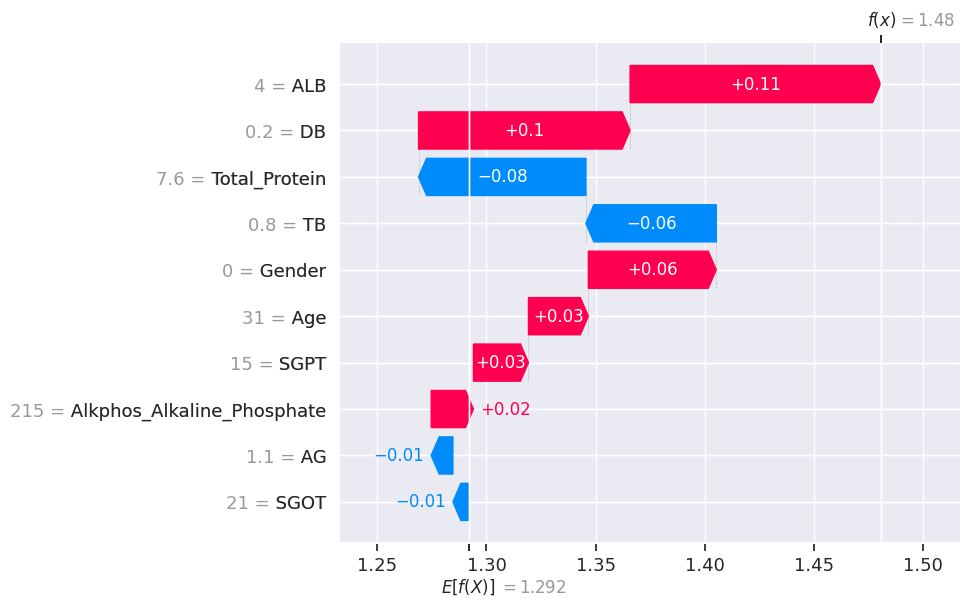

In [422]:
shap.plots.waterfall(linear_shap_values[sample_ind], max_display=14)

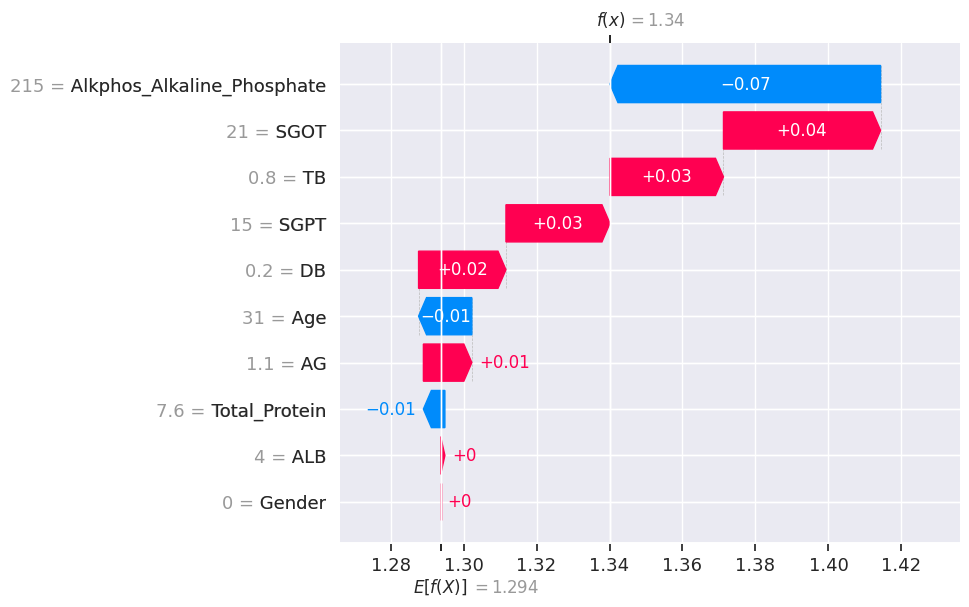

In [423]:
# Waterfall plot for Tree Based Model
shap.plots.waterfall(tree_shap_values[sample_ind], max_display=14)

Interpret the summary plot for the Linear and Tree-based model

Here the features are listed in descending order of their importance. This is one of the easiest ways to analyze an ML model and how the features are affecting the target and to what extent.

Each dot(both red and blue) represents a feature.
Red color represents high values whereas blue color represents low value
If a dot is on the right side of the y-axis then it had a positive impact and if it is on the left side of the axis it had a negative impact
The position of a dot on the x-axis represents the intensity of impact it had, the more it is away from the axis greater the intensity.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


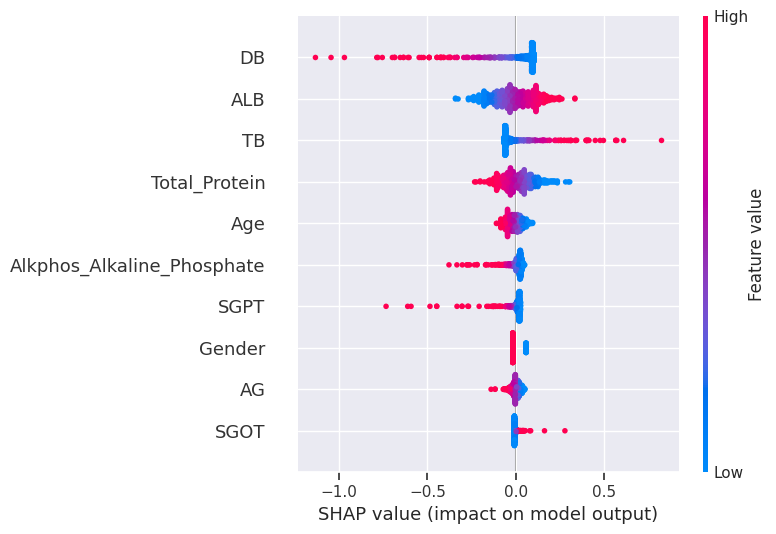

In [424]:
# SHAP summary for Linear Model
shap.summary_plot(linear_shap_values, x_train)

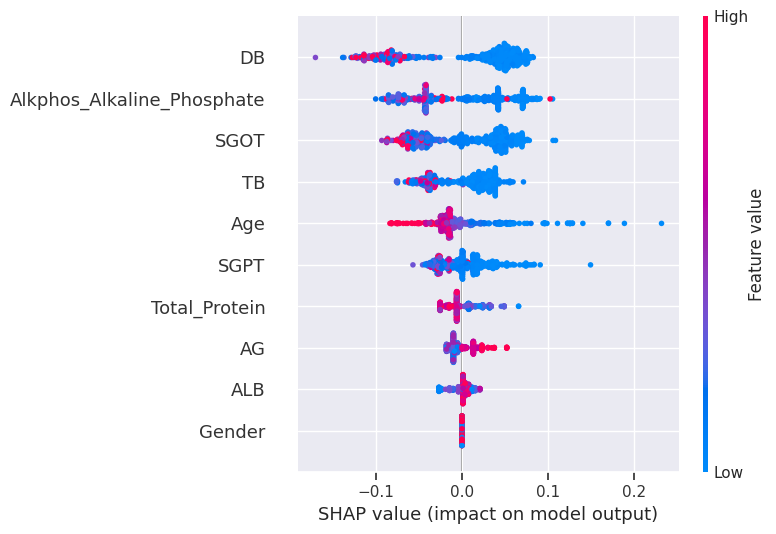

In [425]:
shap.summary_plot(tree_shap_values, x_train)

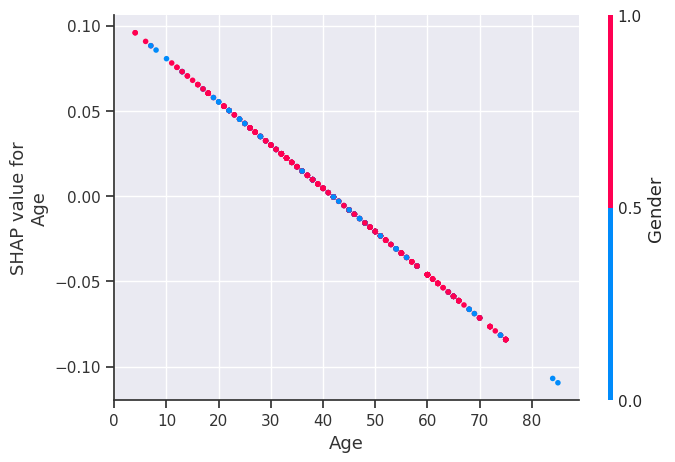

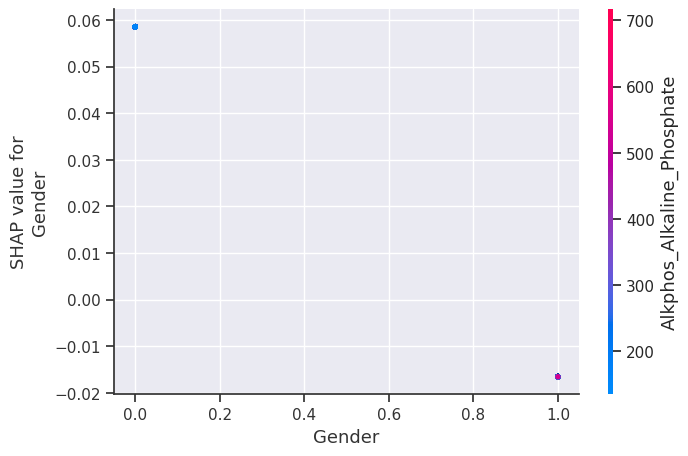

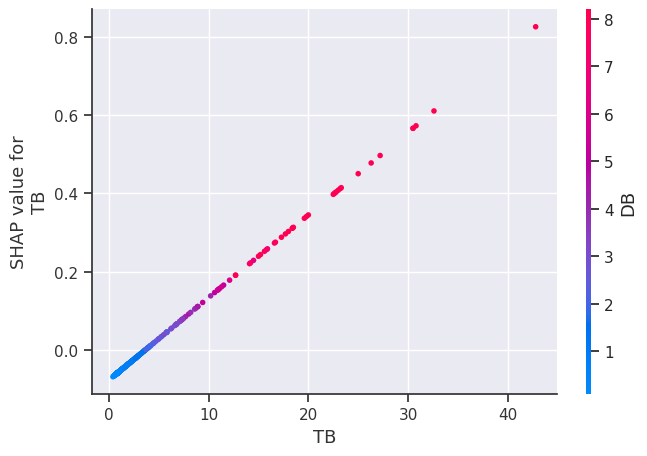

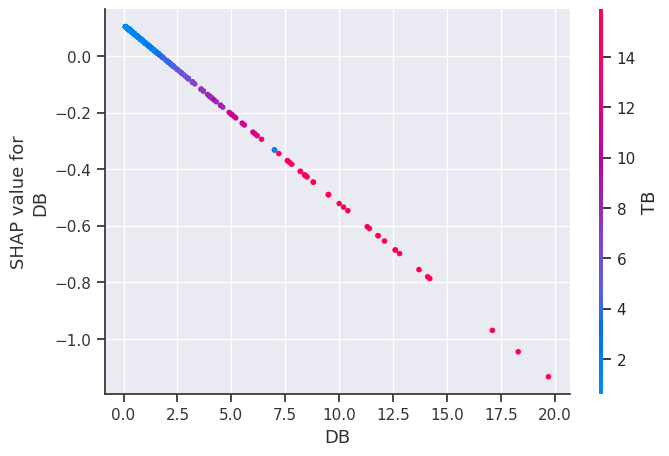

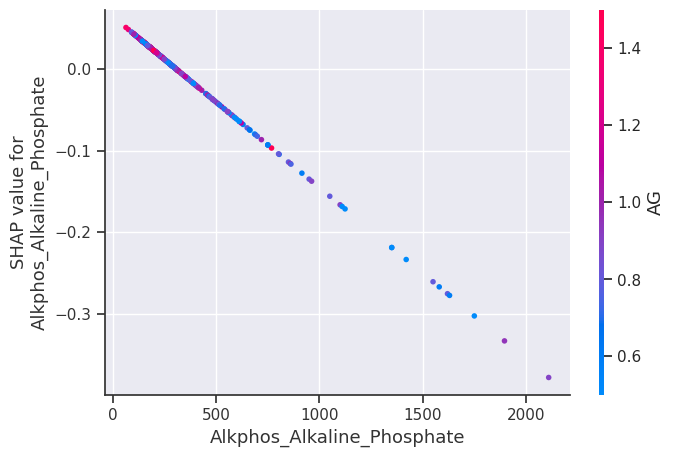

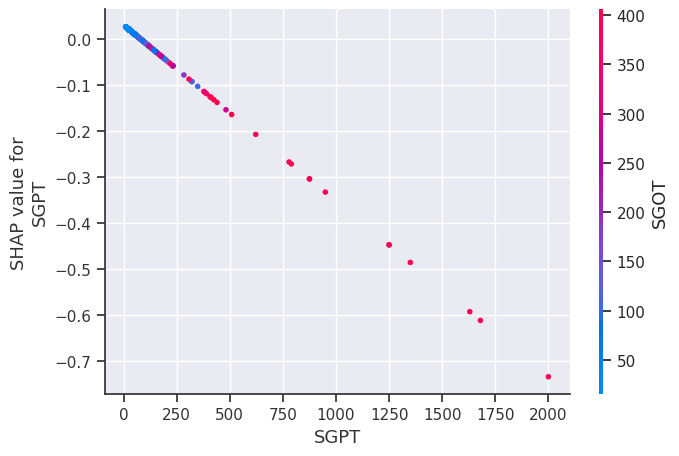

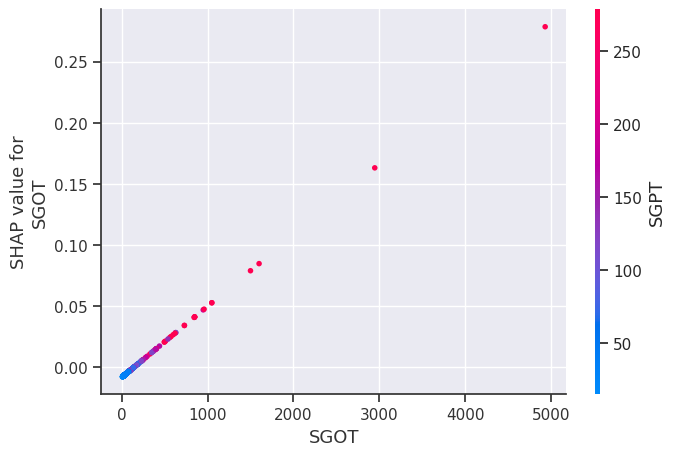

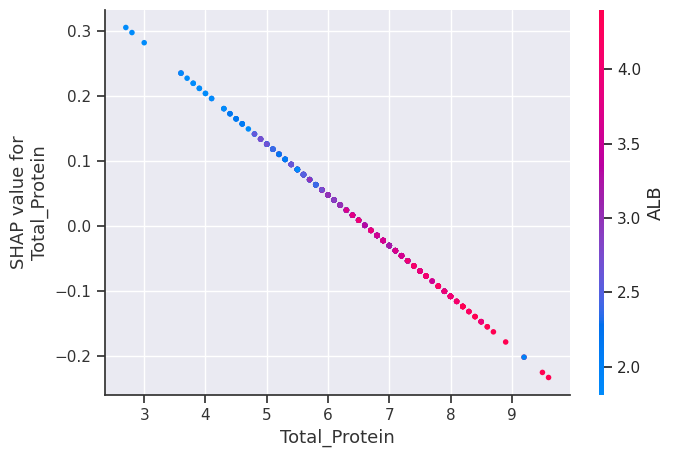

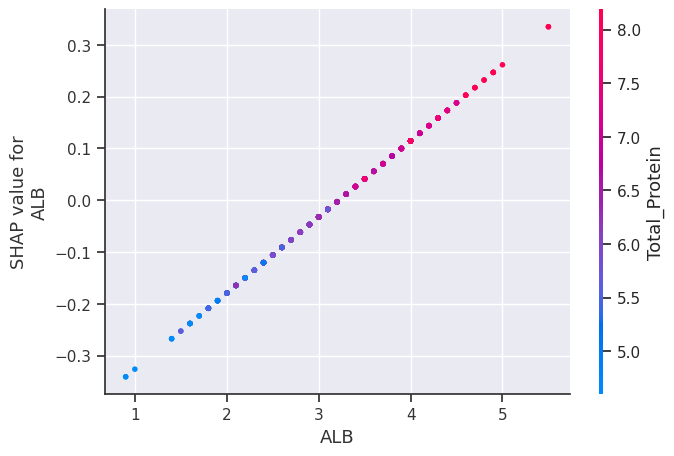

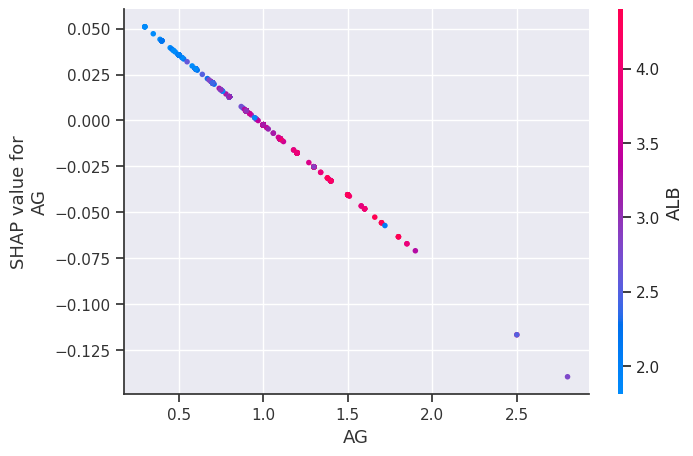

In [426]:
# SHAP partial dependence plot for linear model
for i in x_train.columns:
    shap.dependence_plot(i, linear_shap_values.values, x_train)
     

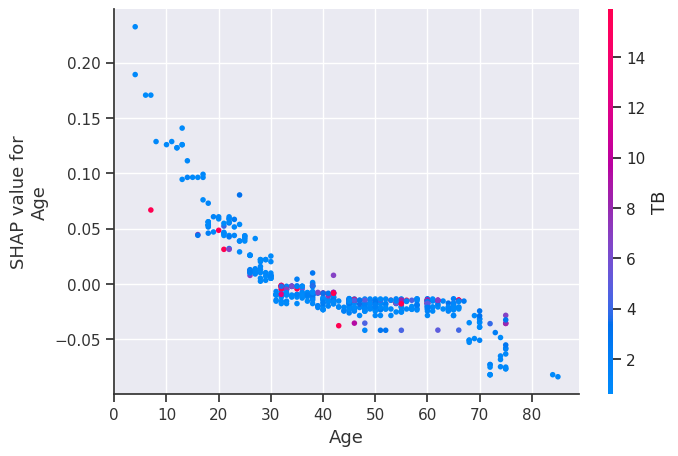

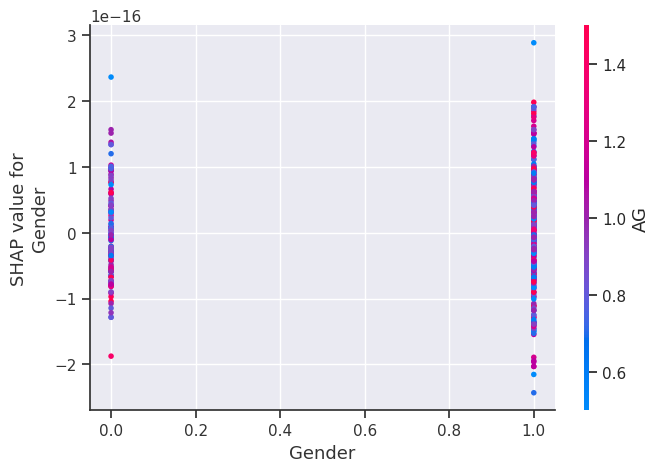

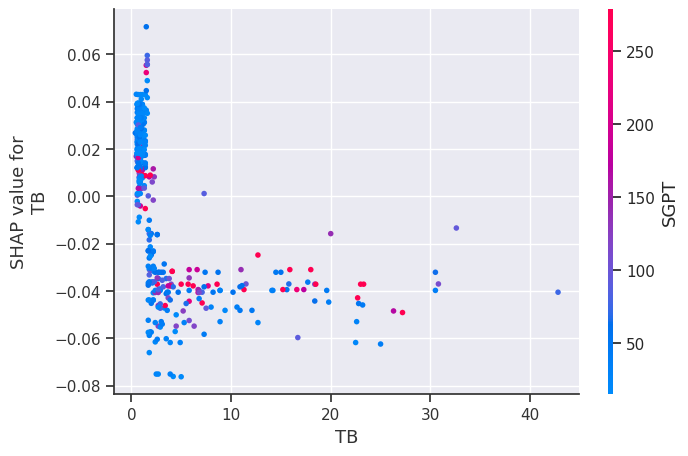

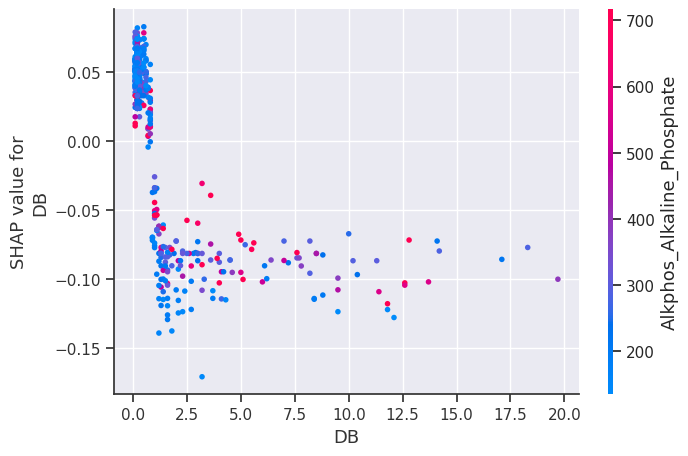

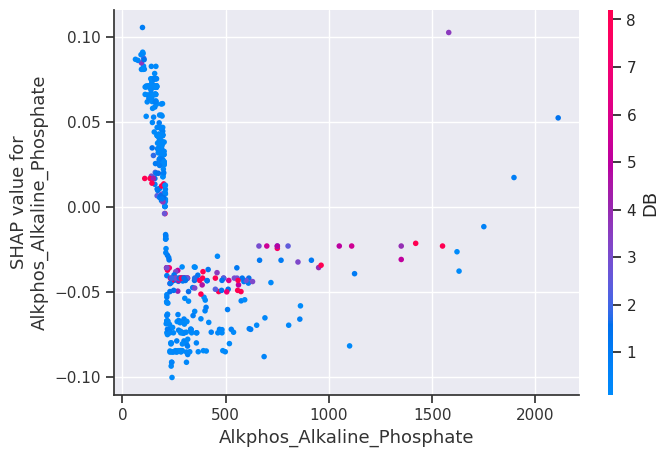

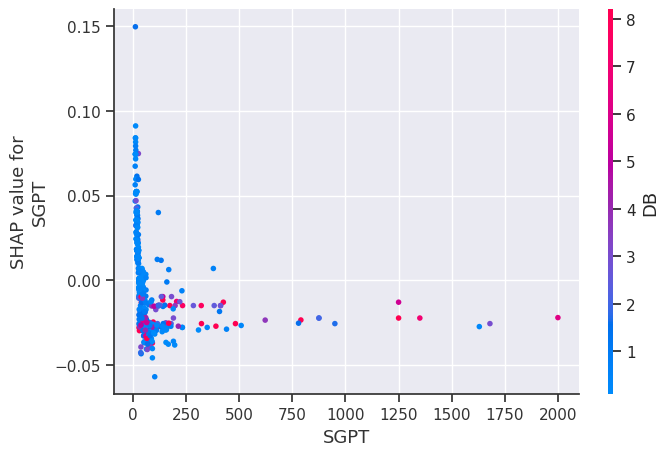

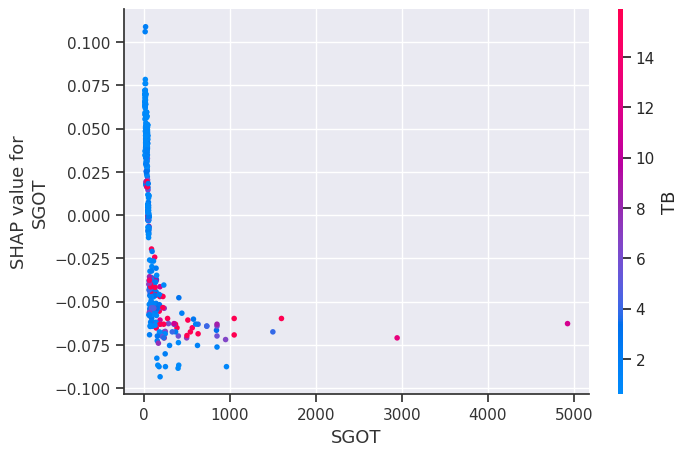

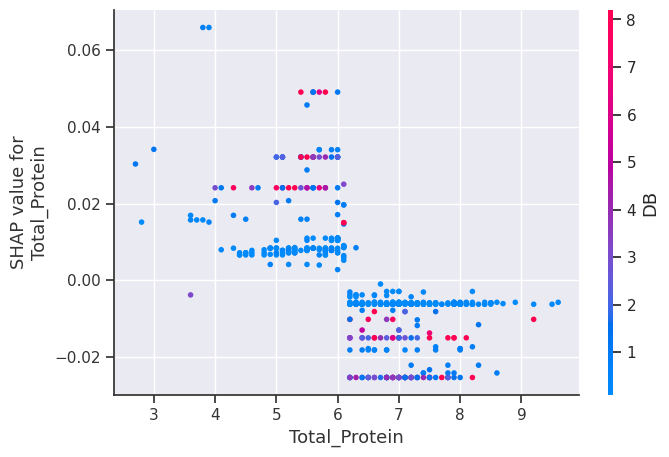

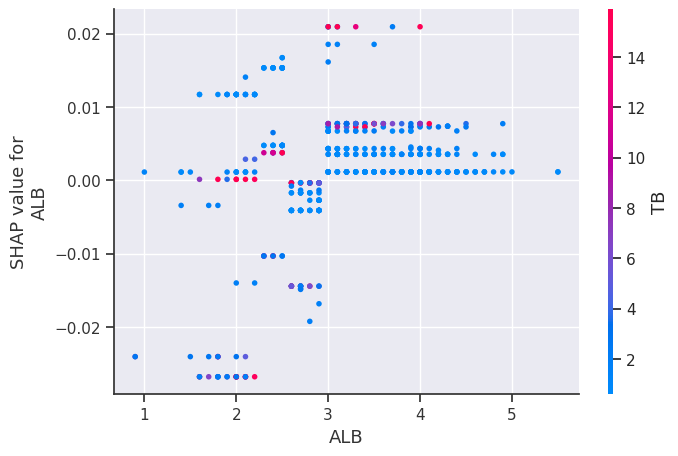

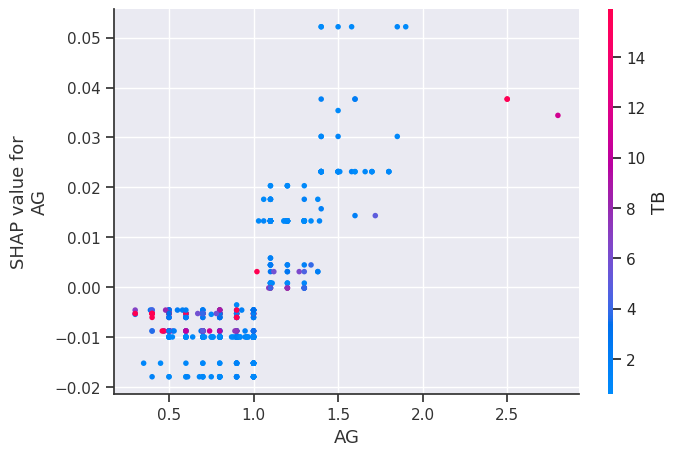

In [427]:
# SHAP partial dependence plot for a tree based model
for i in x_train.columns:
    shap.dependence_plot(i, tree_shap_values.values, x_train)

In [428]:
X_output_linear = x_test.copy()
X_output_linear.loc[:, "predict"] = np.round(
    linear_model.predict(X_output_linear), 2
)  # Attaching the output of linear model to test dataframe

X_output_tree = x_test.copy()
X_output_tree.loc[:, "predict"] = np.round(
    tree_model.predict(X_output_tree), 2
)  # Attaching the output of tree based model to test dataframe
     

In [429]:
# Force Plot of Tree Based Model
explainerModel = shap.TreeExplainer(tree_model)
shap_values_Model = explainerModel.shap_values(X_output_tree)


def shap_plot_tree(j):
    p = shap.force_plot(
        explainerModel.expected_value, shap_values_Model[j], X_output_tree.iloc[[j]]
    )
    return p

**Force Plot SHAP analysis**

This plot is the same as the waterfall model which we saw above the only difference is the visualization is condensed. It is really up to an individual which visualization is preferred some find this easier to read others find the waterfall model easier to read

**Heatmap Visualization for Linear and Tree-based model**

This visualization is a summarization of the entire dataset on how each data point in every feature is affecting the target

Here the Y-axis is Features and X-axis is Instance of that feature The color of the instance defines if it had a positive effect or negative effect by its color. If the instance is red then it had a positive effect and if the instance is blue then it had a negative effect The intensity of the color is directly proportional to the intensity of the effect. Deeper the color, the more impactful the feature is

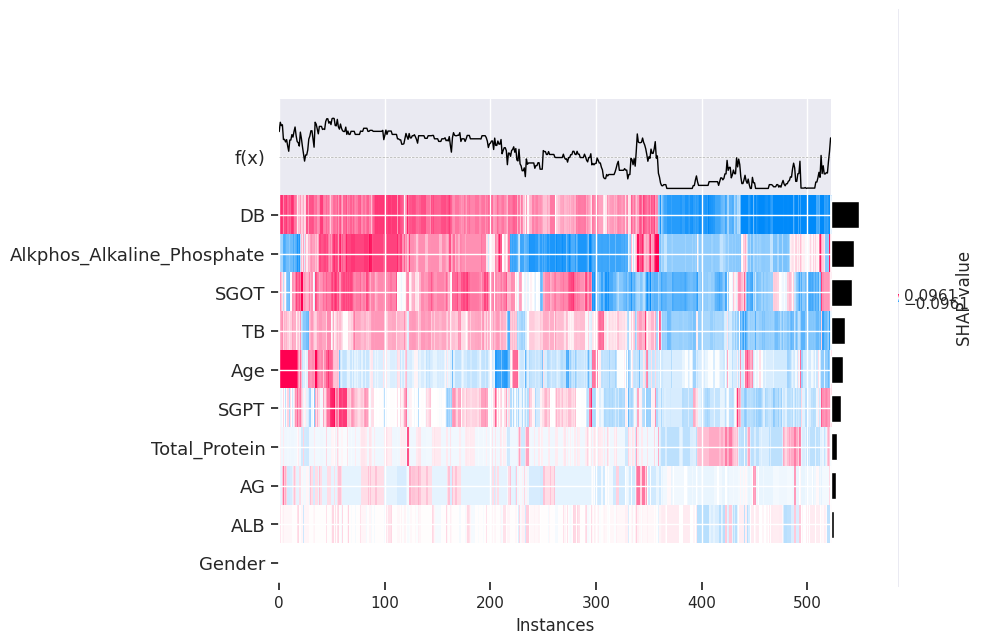

In [430]:
shap.plots.heatmap(tree_shap_values)  # SHAP HeatMap of a Tree Based Model

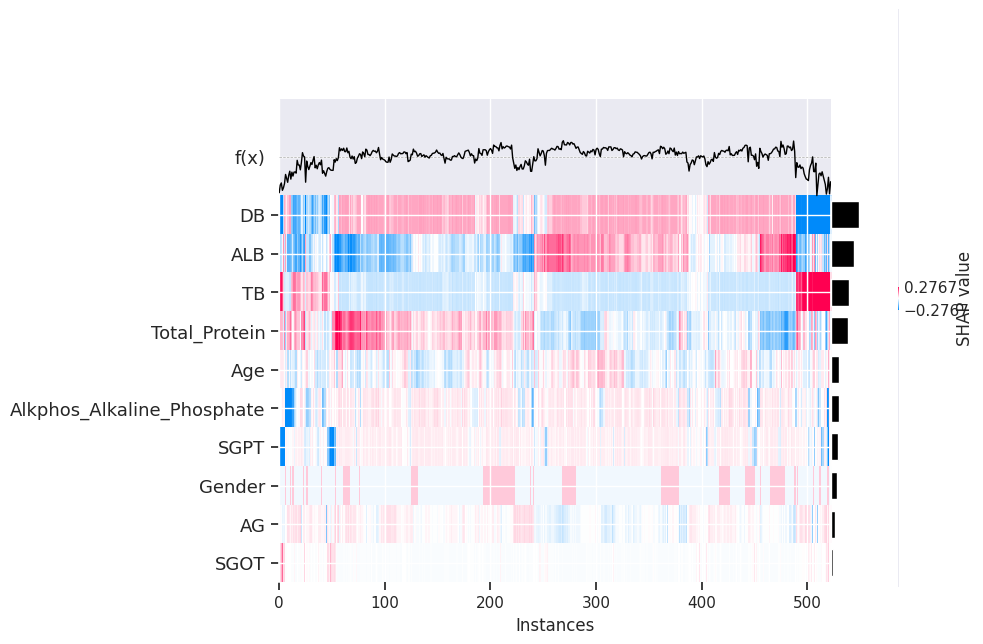

In [431]:
shap.plots.heatmap(linear_shap_values)  # SHAP heatmap for a Linear Model
     

**LIME (Local Interpretation Model-Agnostic Explanation) Analysis**

LIME builds a surrogate model, i.e. converts a more complicated model (say a deep tree-based model into a simple linear model) around the data points in which we are interested and then it will try to make an approximation out of this simple model on the whole model. LIME builds a local model in such a way that it can interpret the whole Black-Box

LIME works well on tabular, text, image datasets - hence it works on different datasets

Let us Interpret our Linear model and Tree-based model on sample data (sample_index = 18) using LIME and try to understand what is happening under the hood.



In [432]:
# Initializing LIME explainer for Linear Model
lime_linear_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train), feature_names=x_train.columns, mode="regression"
)
     


In [433]:

# Getting LIME interpretation for a sample data
idx = 18
np_x_test = np.array(x_test)
np_y_test = np.array(y_test)
print("Prediction : ", linear_model.predict(np_x_test[0].reshape(1, -1)))
print("Actual :     ", np_y_test[idx])

lime_linear_explanation = lime_linear_explainer.explain_instance(
    np_x_test[idx], linear_model.predict, num_features=np_x_test.shape[1]
)
lime_linear_explanation

Prediction :  [1.10644845]
Actual :      1


X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names


In [434]:
lime_linear_explanation.show_in_notebook()  # Display Results in Notebook

In [435]:
# Initializing LIME explainer for Tree Based Model
lime_tree_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train), feature_names=x_train.columns, mode="regression"
)
     

In [436]:
# Getting LIME interpretation for a sample data
idx = 18
np_x_test = np.array(x_test)
np_y_test = np.array(y_test)
print("Prediction : ", tree_model.predict(np_x_test[0].reshape(1, -1)))
print("Actual :     ", np_y_test[idx])

lime_tree_explanation = lime_linear_explainer.explain_instance(
    np_x_test[idx], tree_model.predict, num_features=np_x_test.shape[1]
)
lime_tree_explanation
     

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Prediction :  [1.31745458]
Actual :      1


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Comparision between SHAP, LIME, and Partial Dependence Plot Analysis Unlike LIME, SHAP does not necessarily build a local interpretable model but rather uses the black-box model to calculate the marginal contribution to the prediction for each feature and then relies on the theoretically sound game theory concept of Shapley values to calculate the feature importance. In this way, SHAP improves upon LIME due to its greater stability and lack of local linear model assumptions.

### **Question 2**
 What did you do?

Sure! Here's a more detailed explanation of the steps I took:

1. Understanding the features of the dataset: I started by exploring the features (columns) of the dataset to get an idea of what information it contained. This involved looking at the column names, data types, and any other relevant information.

2. Understanding the distribution of the features in the dataset: Once I had a good understanding of the features in the dataset, I examined the distribution of the data in each column. This involved looking at summary statistics like mean, median, and standard deviation, as well as visualizing the data using plots like histograms and boxplots.

3. Imputing missing values: After analyzing the distribution of the data, I checked for missing values and imputed them using appropriate techniques. I used mean or median imputation for numerical data and mode imputation for categorical data.

4. Building a Machine Learning Model: Once the dataset was preprocessed, I built a machine learning model. I started with a simple linear regression model and then tried more complex models like decision trees.

5. Using AutoML to build a machine learning model in a different way: I also used an AutoML tool to build a machine learning model. AutoML uses algorithms to automatically search for the best model and hyperparameters for the given dataset.

6. Using SHAP to see which feature positively and negatively affects the target variable (price): Finally, I used SHAP (SHapley Additive exPlanations) to analyze the impact of each feature on the target variable (price). This helped me understand which features were positively and negatively affecting the price and by how much.

## **Question 3**

# How well did it work?
Even after removing the insignificant features, there was little or no improvement in the model's prediction, as shown in the OLS regression summary. The low r2 scores and high RMSE and MSE scores suggest that the model is not effectively predicting the values. The OLS regression results show that intercept has a positive coefficient, while Age, Alkphos_Alkaline_Phosphate, SGPT have negative coefficients. Gender, TB and ALB have coefficients that are not significant. The Jarque-Bera (JB) test suggests that the residuals of the model are not normally distributed.

# **Question 4**
What did you learn?

The importance of understanding the dataset and its features before building a model.
The need to handle missing data in a way that preserves the quality of the dataset.
The use of evaluation metrics such as accuracy, precision, recall, and F1-score to evaluate the performance of a classification model.
The use of various classification algorithms such as logistic regression, decision tree, random forest, and XGBoost to build a classification model.
The use of AutoML platforms to automate the process of building a machine learning model.
The need to interpret the model results and understand which features are most important in predicting the target variable.
The use of SHAP and LIME methods for model interpretation.
The significance of selecting the best model for deployment based on its performance on the evaluation metrics.

# **References**
Sure, here are some references for the Indian Liver Patient dataset project:

1. https://www.kaggle.com/uciml/indian-liver-patient-records

2.  https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)

3. https://pandas.pydata.org/docs/

4.  https://scikit-learn.org/stable/documentation.html

5. https://xgboost.readthedocs.io/en/latest/

6.  https://shap.readthedocs.io/en/latest/

7.  https://lime-ml.readthedocs.io/en/latest/

8.  https://automl.github.io/auto-sklearn/master/

9. https://matplotlib.org/stable/contents.html



# **MIT License**
Copyright (c) 2023 Mansi Sanjeev Upadhyay

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions: The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

